In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Importing the datasets

In [2]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/sample_submission.csv')
sample_submission.head()

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No


In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/test.csv', na_values=['?', ''], index_col='encounter_id')
test.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/train.csv', na_values=['?', ''], index_col='encounter_id')
train.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [5]:
train.columns

Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass'],
      dtype='object')

In [6]:
test.columns

Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication'],
      dtype='object')

In [7]:
# Checking if there are duplicates on train and test

In [8]:
train_duplicated = train.loc[train.duplicated(), :]
train_duplicated

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [9]:
test_duplicated = test.loc[test.duplicated(), :]
test_duplicated

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [10]:
train.drop(['country','weight'], axis=1, inplace=True)

In [11]:
test.drop(['country','weight'], axis=1, inplace=True)

In [12]:
train.isna().sum()

patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_diagnosis                      1008
number_diagnoses                             0
glucose_test_

In [13]:
test.isna().sum()

patient_id                                   0
race                                      2191
gender                                       0
age                                       1531
payer_code                               12055
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            1585
medical_specialty                        15027
average_pulse_bpm                            0
discharge_disposition                     1101
admission_source                          2063
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            5
secondary_diagnosis                         96
additional_diagnosis                       415
number_diagnoses                             0
glucose_test_

In [14]:
train['race'].fillna('Unknown', inplace=True)
train['medical_specialty'].fillna('Unknown', inplace=True)
train['admission_source'].fillna('Unknown', inplace=True)
train['payer_code'].fillna('None', inplace=True)
train['glucose_test_result'].fillna('Not_taken', inplace=True)
train['a1c_test_result'].fillna('Not_taken', inplace=True)
train['admission_type'].fillna('Unknown', inplace=True)
train['age'].fillna('Unknown', inplace=True)
train['discharge_disposition'].fillna('Unknown', inplace=True)
train['primary_diagnosis'].fillna('Unknown', inplace=True)
train['secondary_diagnosis'].fillna('Unknown', inplace=True)
train['additional_diagnosis'].fillna('Unknown', inplace=True)

In [15]:
test['race'].fillna('Unknown', inplace=True)
test['medical_specialty'].fillna('Unknown', inplace=True)
test['admission_source'].fillna('Unknown', inplace=True)
test['payer_code'].fillna('None', inplace=True)
test['glucose_test_result'].fillna('Not_taken', inplace=True)
test['a1c_test_result'].fillna('Not_taken', inplace=True)
test['admission_type'].fillna('Unknown', inplace=True)
test['age'].fillna('Unknown', inplace=True)
test['discharge_disposition'].fillna('Unknown', inplace=True)
test['primary_diagnosis'].fillna('Unknown', inplace=True)
test['secondary_diagnosis'].fillna('Unknown', inplace=True)
test['additional_diagnosis'].fillna('Unknown', inplace=True)


In [16]:
train.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [17]:
test.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [18]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                   }
train = train.rename(columns=new_column_names)

In [19]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                   }
test = test.rename(columns=new_column_names)

In [20]:
train['length_of_stay']

encounter_id
533253     2
426224    14
634063     6
890610     6
654194     6
          ..
660160     7
826429     9
332030     5
757560     2
459757     5
Name: length_of_stay, Length: 71236, dtype: int64

In [21]:
test['length_of_stay']

encounter_id
499502     3
447319    10
309126     2
181183     4
359339     1
          ..
451150     4
549298     2
327586     2
351214    14
914270     3
Name: length_of_stay, Length: 30530, dtype: int64

In [22]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]
    fig = plt.figure(figsize=(50, 10))
    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
 
    #Rotacionar os rótulos do eixo x
    plt.xticks(rotation=45, ha="right")
 
    plt.show()

### Race

In [23]:
train['race'].value_counts()

race
Caucasian          50693
AfricanAmerican    12693
Unknown             5070
Hispanic            1364
Other                995
Asian                421
Name: count, dtype: int64

In [24]:
test['race'].value_counts()

race
Caucasian          21617
AfricanAmerican     5535
Unknown             2191
Hispanic             563
Other                437
Asian                187
Name: count, dtype: int64

In [25]:
len(train[train['race']== '94306932'])

0

In [26]:
len(test[test['race']== '94306932'])

0

In [27]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()
train[train['patient_id'].isin(unknown)]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
727104,94306932,Caucasian,Male,[70-80),SP,0,0,0,Urgent,Hematology,...,157,197,9,Not_taken,Not_taken,No,No,[],No,>30 days
992230,57344247,Unknown,Male,[80-90),MC,0,0,0,Elective,Orthopedics,...,715,250,8,Not_taken,Not_taken,Ch,Yes,['insulin'],No,No
353655,28219392,Unknown,Female,[60-70),MC,1,0,0,Urgent,InternalMedicine,...,E935,197,9,Not_taken,Not_taken,No,Yes,['glyburide'],No,No
911403,88363836,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,414,401,9,Not_taken,>8,No,No,[],No,No
811707,23388138,Caucasian,Female,[70-80),None,1,1,0,Not Available,Family/GeneralPractice,...,473,250.4,5,Norm,Not_taken,Ch,Yes,['insulin'],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631812,23213772,Unknown,Female,[70-80),MC,0,0,1,Elective,InternalMedicine,...,357,787,7,Not_taken,Not_taken,Ch,Yes,"['metformin', 'glimepiride']",No,No
714110,38516562,Unknown,Male,[80-90),MC,0,0,0,Emergency,Unknown,...,496,250,5,Not_taken,Not_taken,No,No,[],No,>30 days
398947,59167503,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,403,250,9,Not_taken,Not_taken,Ch,Yes,['insulin'],No,No


In [28]:
unknown = test[test['race']== 'Unknown']['patient_id'].unique()
test[test['patient_id'].isin(unknown)]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
610450,29095002,Unknown,Female,[80-90),MC,0,1,0,Not Available,Unknown,...,11,38,599,428,5,Norm,Not_taken,Ch,Yes,"['pioglitazone', 'insulin']"
884114,15580827,Unknown,Female,[50-60),MD,0,0,1,Urgent,Family/GeneralPractice,...,20,487,491,250.02,5,Not_taken,Not_taken,Ch,Yes,"['metformin', 'rosiglitazone', 'insulin']"
895020,24697071,Unknown,Female,[60-70),MC,4,1,1,Elective,Nephrology,...,21,996,403,250.4,4,Not_taken,Not_taken,Ch,Yes,['insulin']
949855,66708630,Unknown,Female,[60-70),SP,0,0,0,Emergency,Unknown,...,16,482,584,403,9,Not_taken,>8,No,Yes,['glipizide']
470398,70734564,Unknown,Female,[70-80),MC,0,0,0,Emergency,Unknown,...,19,414,411,496,9,Not_taken,Not_taken,Ch,Yes,"['metformin', 'insulin']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241330,41950188,Unknown,Male,Unknown,MC,0,0,0,Emergency,Unknown,...,15,491,486,427,8,Not_taken,Not_taken,No,Yes,['metformin']
448446,90245358,Unknown,Male,[80-90),MC,1,1,2,Emergency,Unknown,...,13,599,496,585,9,Not_taken,Not_taken,No,No,[]
382366,103896540,Caucasian,Male,[50-60),MC,0,0,1,Urgent,Family/GeneralPractice,...,7,420,996,403,5,Not_taken,Not_taken,No,No,[]


In [29]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Unknown,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,Not_taken,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,Not_taken,Ch,Yes,['insulin'],No,>30 days


In [30]:
test[test['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
272826,23904909,Caucasian,Female,[80-90),None,0,0,0,Not Available,InternalMedicine,...,7,728,294,414,7,Norm,Not_taken,No,Yes,['insulin']


In [31]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()

known_race = train[train['patient_id'].isin(unknown) & train['race']!= 'Unknown']

In [32]:
unknown = test[test['race']== 'Unknown']['patient_id'].unique()

known_race = test[test['patient_id'].isin(unknown) & test['race']!= 'Unknown']

In [33]:
train[train['race']=='Unknown'].shape

(5070, 28)

In [34]:
test[test['race']=='Unknown'].shape

(2191, 26)

In [35]:
def fill_race(df):
    for i, row in df.iterrows():
        if row['race'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['race'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'race'] = other_rows.iloc[0]['race']
    return df

fill_race(train)

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,Female,[70-80),None,0,0,2,Emergency,Family/GeneralPractice,...,276,466,8,Not_taken,Not_taken,No,No,[],No,>30 days
426224,29775006,AfricanAmerican,Male,[50-60),None,0,0,0,Emergency,Unknown,...,785,162,9,Not_taken,Not_taken,No,Yes,['insulin'],No,No
634063,80729253,Caucasian,Female,[60-70),None,0,0,1,Unknown,Family/GeneralPractice,...,135,250,6,Not_taken,Not_taken,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,2919042,AfricanAmerican,Male,[60-70),MC,0,0,1,Emergency,InternalMedicine,...,562,455,5,Not_taken,Not_taken,No,No,[],No,No
654194,84871971,Caucasian,Female,[70-80),HM,1,0,0,Elective,Unknown,...,599,428,9,Not_taken,Not_taken,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,AfricanAmerican,Female,[80-90),MC,0,1,0,Elective,InternalMedicine,...,786,250,9,Not_taken,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
826429,4663818,AfricanAmerican,Female,[70-80),None,0,0,0,Urgent,Unknown,...,197,V66,6,Not_taken,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
332030,23397147,Caucasian,Female,[60-70),None,0,2,2,Unknown,Unknown,...,491,276,9,>300,Not_taken,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days


In [36]:
fill_race(test)

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,103232799,Caucasian,Male,[80-90),HM,0,0,0,Emergency,Unknown,...,14,491,414,250,6,Not_taken,Not_taken,No,Yes,['metformin']
447319,93395304,Caucasian,Male,[20-30),HM,0,0,1,Emergency,Unknown,...,7,250.13,70,794,7,>300,Not_taken,No,No,[]
309126,6281586,AfricanAmerican,Male,[30-40),None,0,0,0,Emergency,Pulmonology,...,12,786,250.6,536,6,Not_taken,Not_taken,No,Yes,['insulin']
181183,67381308,Caucasian,Male,[50-60),BC,0,0,0,Not Available,Unknown,...,16,820,873,E884,9,Not_taken,Not_taken,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,71670204,Caucasian,Male,[60-70),None,0,0,0,Emergency,InternalMedicine,...,10,599,427,414,9,Not_taken,Not_taken,No,Yes,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,85707450,Caucasian,Male,[70-80),HM,0,0,0,Emergency,Unknown,...,11,584,276,276,9,Not_taken,Not_taken,No,No,[]
549298,328887,Caucasian,Male,[60-70),None,0,0,4,Emergency,Family/GeneralPractice,...,19,428,250.83,276,9,Not_taken,Not_taken,No,Yes,['insulin']
327586,21915459,Caucasian,Female,[80-90),None,0,0,0,Emergency,Nephrology,...,22,996,403,250,6,Not_taken,Not_taken,No,Yes,['insulin']


In [37]:
train[train['race']=='Unknown'].shape

(3648, 28)

In [38]:
test[test['race']=='Unknown'].shape

(1828, 26)

In [39]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Caucasian,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,Not_taken,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,Not_taken,Ch,Yes,['insulin'],No,>30 days


In [40]:
test[test['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
272826,23904909,Caucasian,Female,[80-90),None,0,0,0,Not Available,InternalMedicine,...,7,728,294,414,7,Norm,Not_taken,No,Yes,['insulin']


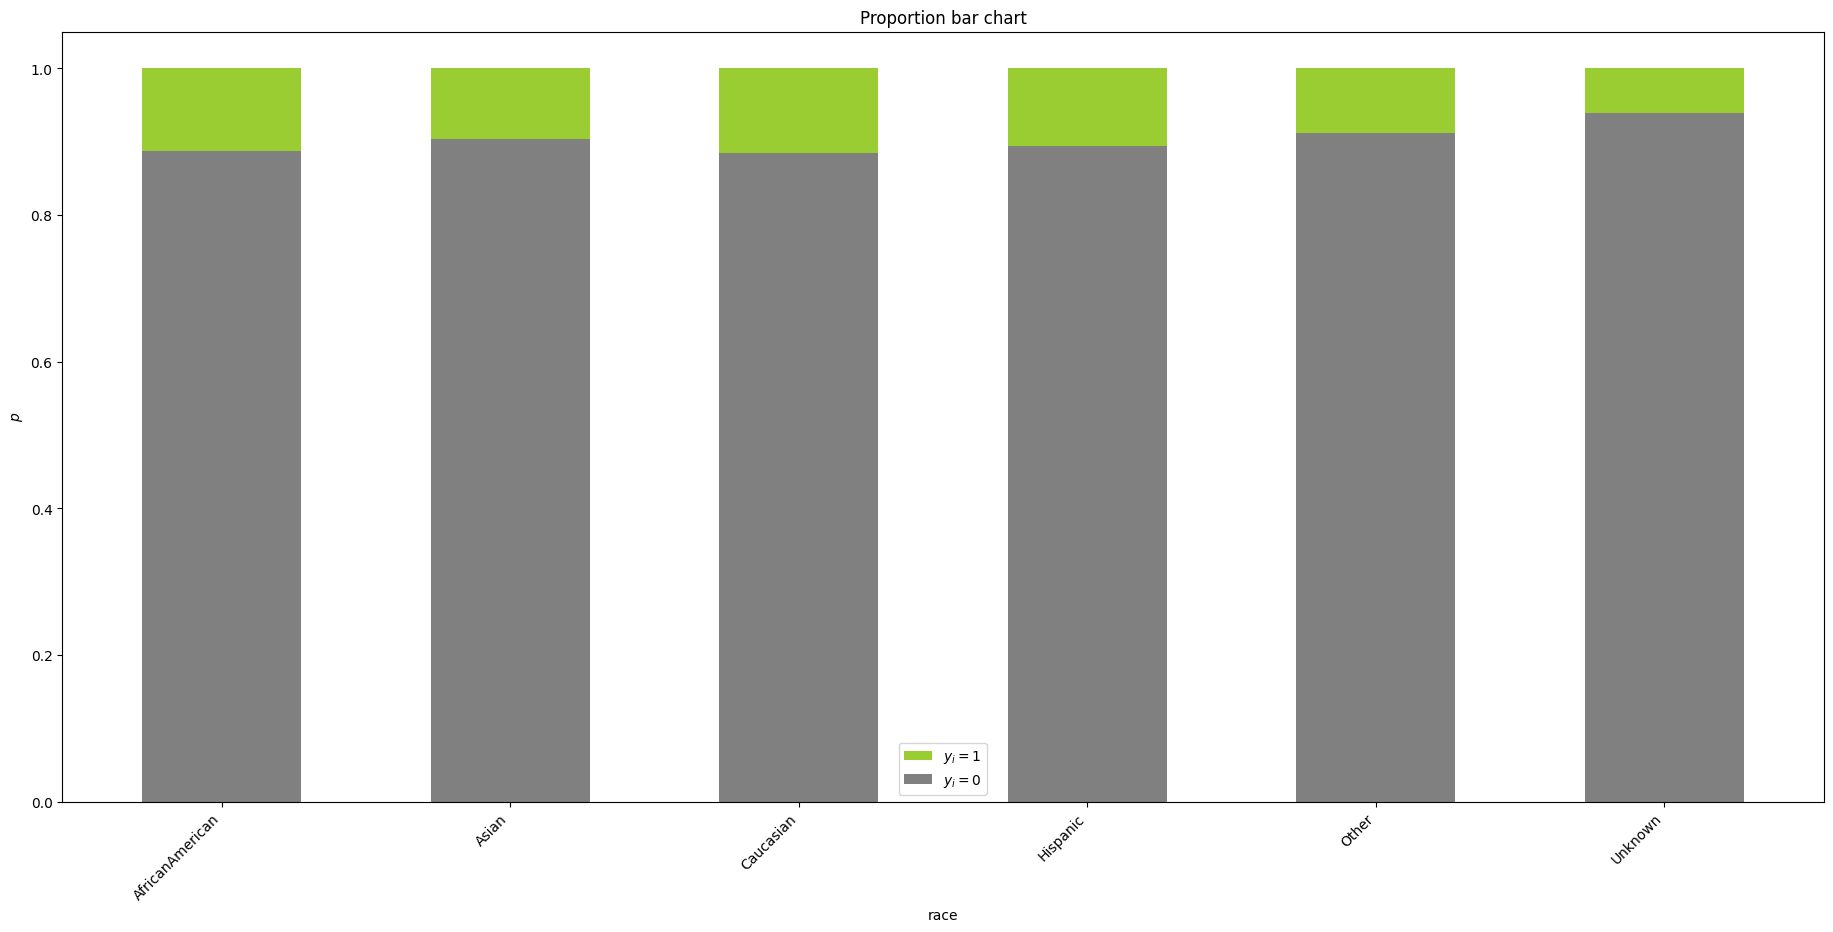

In [41]:
bar_charts_categorical(train, "race", "readmitted_binary")

In [42]:
train['race'].value_counts()

race
Caucasian          51779
AfricanAmerican    12977
Unknown             3648
Hispanic            1394
Other               1013
Asian                425
Name: count, dtype: int64

In [43]:
test['race'].value_counts()

race
Caucasian          21880
AfricanAmerican     5618
Unknown             1828
Hispanic             570
Other                443
Asian                191
Name: count, dtype: int64

In [44]:
train['race_caucasian'] = train['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [45]:
test['race_caucasian'] = test['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [46]:
train.drop(['race'], axis=1, inplace=True)

In [47]:
test.drop(['race'], axis=1, inplace=True)

In [48]:
train['race_caucasian'].value_counts()

race_caucasian
1    51779
0    19457
Name: count, dtype: int64

In [49]:
test['race_caucasian'].value_counts()

race_caucasian
1    21880
0     8650
Name: count, dtype: int64

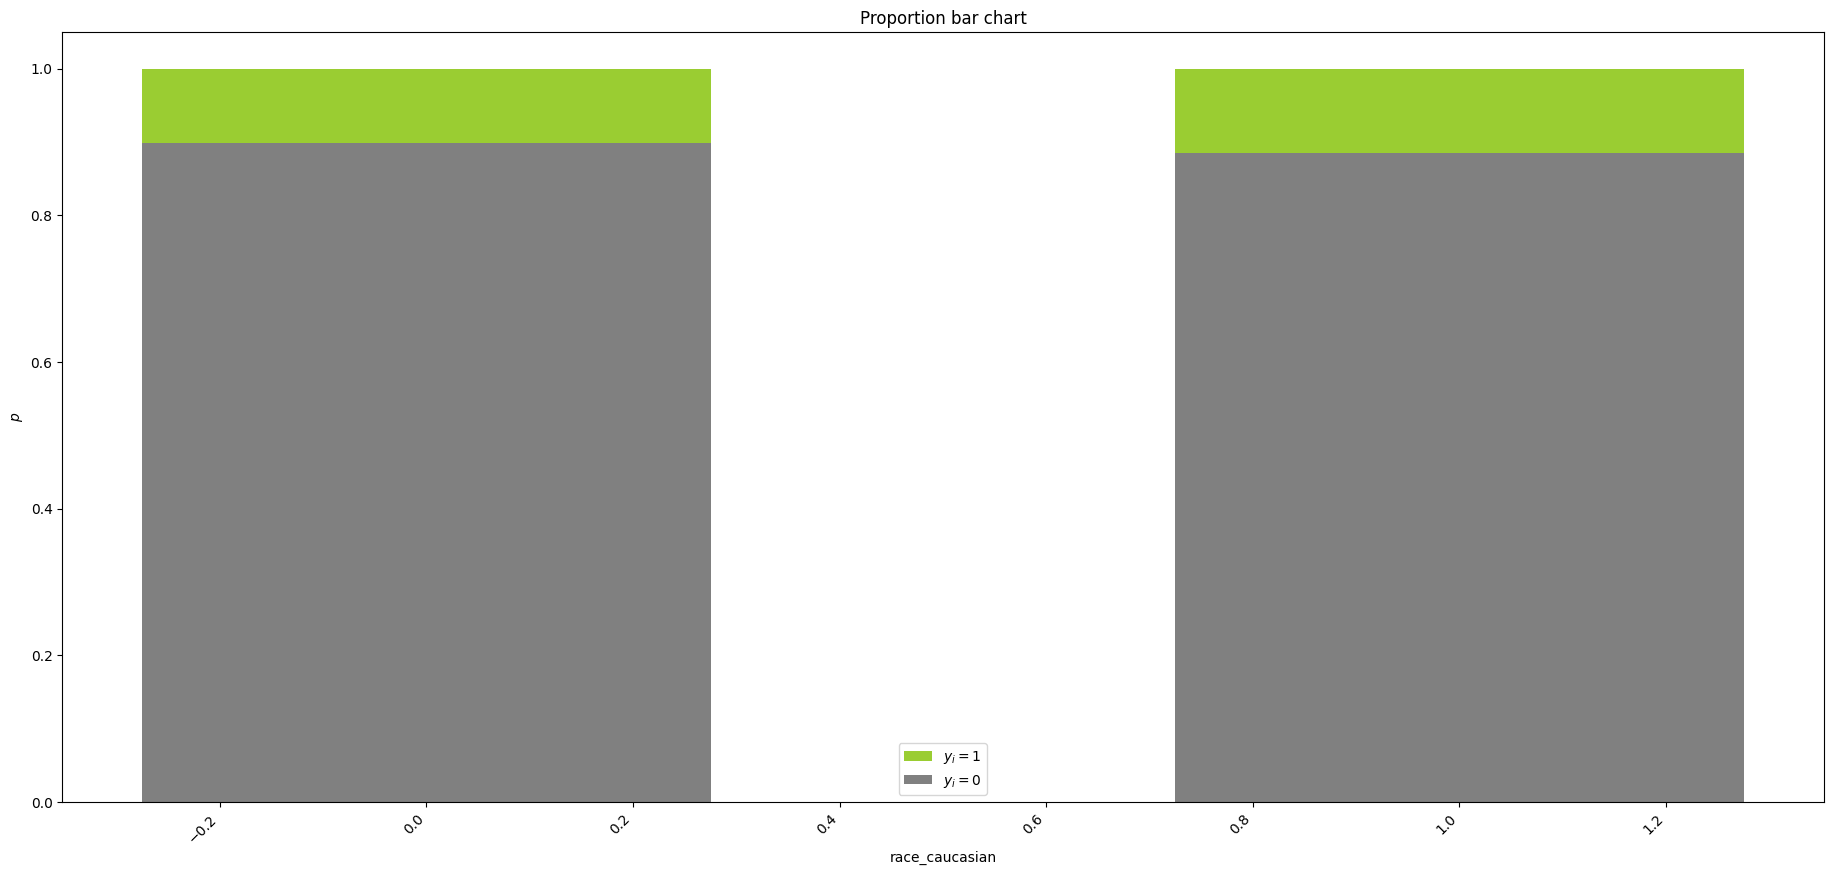

In [50]:
bar_charts_categorical(train, "race_caucasian", "readmitted_binary")

### Medication 

In [51]:
train['medication'].value_counts(normalize=True)

medication
['insulin']                                                       0.304832
[]                                                                0.229463
['metformin']                                                     0.044247
['metformin', 'insulin']                                          0.042689
['glipizide']                                                     0.038281
                                                                    ...   
['pioglitazone', 'acarbose', 'insulin', 'glyburide-metformin']    0.000014
['glimepiride', 'rosiglitazone', 'acarbose']                      0.000014
['glipizide', 'pioglitazone', 'acarbose', 'insulin']              0.000014
['metformin', 'glyburide', 'acarbose', 'insulin']                 0.000014
['glimepiride', 'rosiglitazone', 'miglitol', 'insulin']           0.000014
Name: proportion, Length: 303, dtype: float64

In [52]:
test['medication'].value_counts(normalize=True)

medication
['insulin']                                                             0.302981
[]                                                                      0.231150
['metformin']                                                           0.043629
['metformin', 'insulin']                                                0.042614
['glipizide']                                                           0.037373
                                                                          ...   
['pioglitazone', 'tolazamide', 'insulin']                               0.000033
['metformin', 'glipizide', 'glyburide', 'pioglitazone', 'insulin']      0.000033
['nateglinide', 'rosiglitazone', 'acarbose']                            0.000033
['metformin', 'nateglinide', 'glipizide', 'pioglitazone', 'insulin']    0.000033
['rosiglitazone', 'acarbose', 'insulin']                                0.000033
Name: proportion, Length: 232, dtype: float64

In [53]:
train['medication'] = train['medication'].str.replace('[]', 'no_medication')

In [54]:
test['medication'] = test['medication'].str.replace('[]', 'no_medication')

In [55]:
train['number_generic_medications'] = train['medication'].apply(lambda x: 0 if x=='no_medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [56]:
test['number_generic_medications'] = test['medication'].apply(lambda x: 0 if x=='no_medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [57]:
train['number_generic_medications'].value_counts()

number_generic_medications
1    33182
0    16346
2    15289
3     5446
4      929
5       41
6        3
Name: count, dtype: int64

In [58]:
# Assuming df is your DataFrame and 'medication' is your column
train['medication'] = train['medication'].apply(lambda x: [i.strip().strip('\'"') for i in x.strip('[]').split(',')])

# Get the list of unique medications
medications = set(x for l in train['medication'] for x in l)

# Create new columns for each medication
for med in medications:
    train[med] = train['medication'].apply(lambda x: 1 if med in x else 0)

In [59]:
# Assuming df is your DataFrame and 'medication' is your column
test['medication'] = test['medication'].apply(lambda x: [i.strip().strip('\'"') for i in x.strip('[]').split(',')])

# Get the list of unique medications
medications = set(x for l in test['medication'] for x in l)

# Create new columns for each medication
for med in medications:
    test[med] = test['medication'].apply(lambda x: 1 if med in x else 0)


In [60]:
train['Sulfonylureas'] = train['glipizide']+train['glyburide']+train['tolbutamide']+train['acetohexamide']+train['chlorpropamide']
+train['glimepiride']+train['tolazamide']
train['Meglitinides'] = train['repaglinide'] + train['nateglinide']
train['Thiazolidinediones'] = train['pioglitazone'] + train['rosiglitazone'] + train['troglitazone']
train['Alpha_Glucosidase_Inhibitors'] = train['acarbose'] + train['miglitol']
train['Combination_Medications'] = train['glimepiride-pioglitazone']+train['glyburide-metformin']+train['metformin-pioglitazone']
+train['glipizide-metformin']+train['metformin-rosiglitazone']

encounter_id
533253    0
426224    0
634063    0
890610    0
654194    0
         ..
660160    0
826429    0
332030    0
757560    0
459757    0
Length: 71236, dtype: int64

In [61]:
# Tirei alguns medications pq não havia no test
test['Sulfonylureas'] = test['glipizide'] + test['glyburide'] + test['tolbutamide'] + test['chlorpropamide'] + test['glimepiride'] + test['tolazamide']
test['Meglitinides'] = test['repaglinide'] + test['nateglinide']
test['Thiazolidinediones'] = test['pioglitazone'] + test['rosiglitazone'] + test['troglitazone']
test['Alpha_Glucosidase_Inhibitors'] = test['acarbose'] + test['miglitol']
test['Combination_Medications'] = test['glipizide-metformin'] + test['metformin-rosiglitazone']

In [62]:
train.drop(['tolazamide', 'miglitol', 'repaglinide',
'nateglinide', 'glimepiride-pioglitazone', 'glipizide', 'pioglitazone',
'glyburide', 'acetohexamide', 'tolbutamide',
'acarbose', 'glyburide-metformin',
'metformin-pioglitazone', 'glipizide-metformin',
'metformin-rosiglitazone', 'chlorpropamide', 'rosiglitazone',
'troglitazone', 'glimepiride'], axis=1, inplace=True)

In [63]:
# Tirei alguns medications pq não havia no test
test.drop(['tolazamide', 'miglitol', 'repaglinide',
'nateglinide', 'glipizide', 'pioglitazone',
'glyburide', 'tolbutamide',
'acarbose', 'glyburide-metformin',
'glipizide-metformin',
'metformin-rosiglitazone', 'chlorpropamide', 'rosiglitazone',
'troglitazone', 'glimepiride'], axis=1, inplace=True)

In [64]:
medication_columns = ['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
                     'Combination_Medications','insulin','no_medication','metformin']
for col in medication_columns:
    print(train[col].value_counts())
    print('')

Sulfonylureas
0    54890
1    16194
2      152
Name: count, dtype: int64

Meglitinides
0    69686
1     1544
2        6
Name: count, dtype: int64

Thiazolidinediones
0    61699
1     9507
2       30
Name: count, dtype: int64

Alpha_Glucosidase_Inhibitors
0    71003
1      233
Name: count, dtype: int64

Combination_Medications
0    70737
1      499
Name: count, dtype: int64

insulin
1    38105
0    33131
Name: count, dtype: int64

no_medication
0    54890
1    16346
Name: count, dtype: int64

metformin
0    57271
1    13965
Name: count, dtype: int64



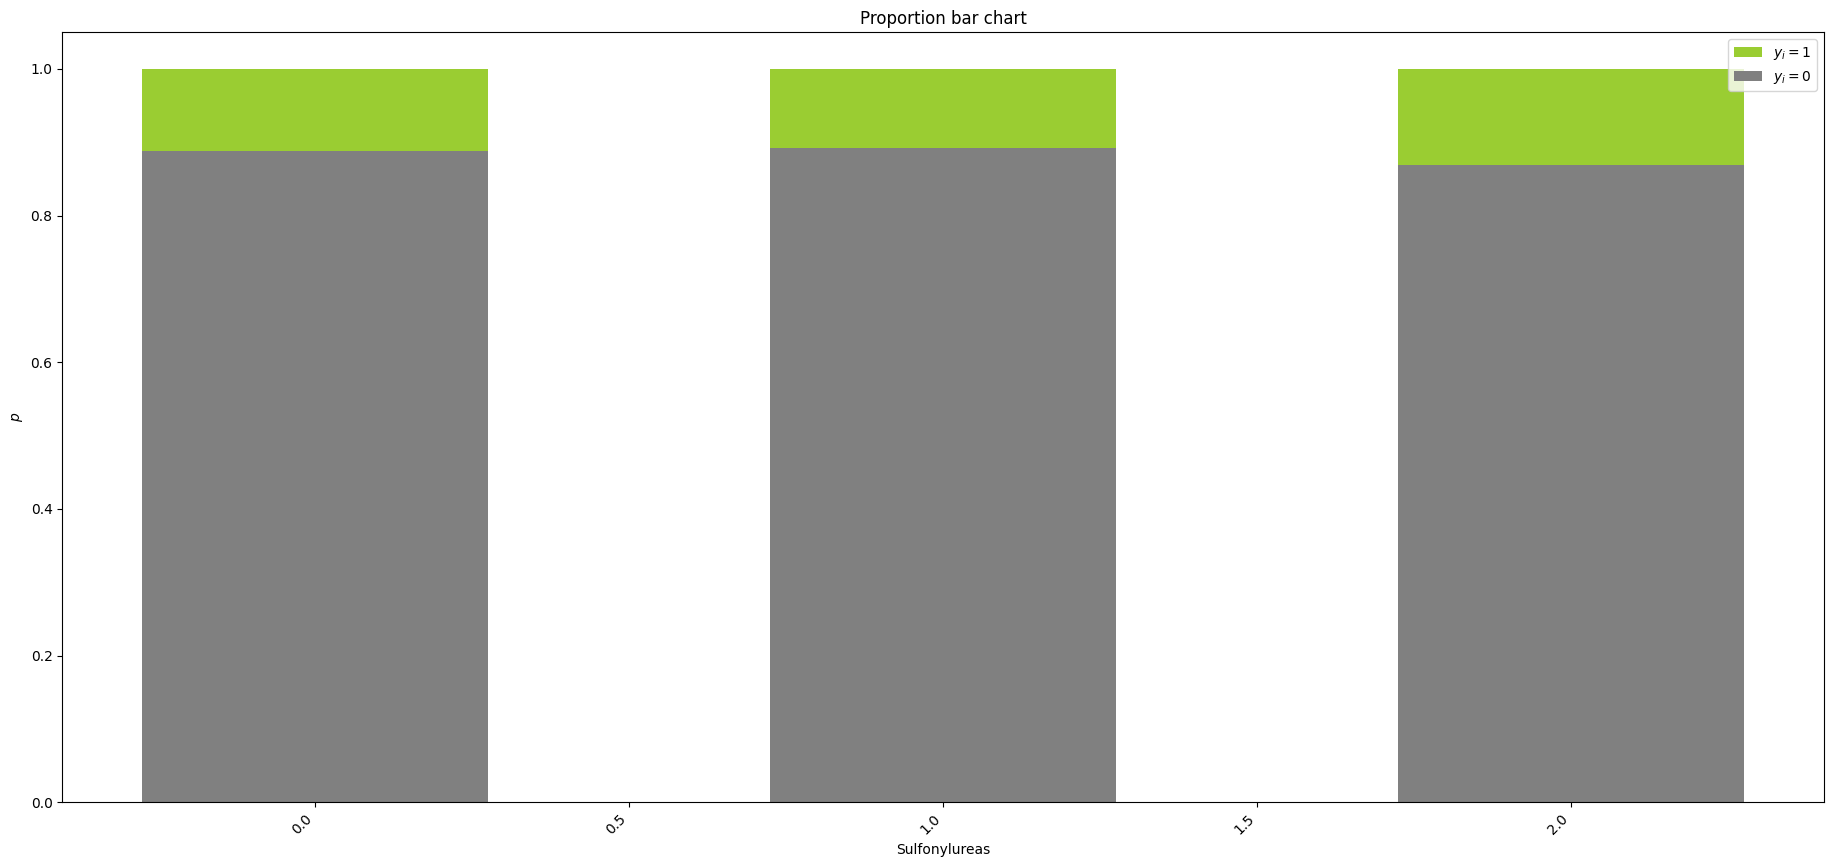

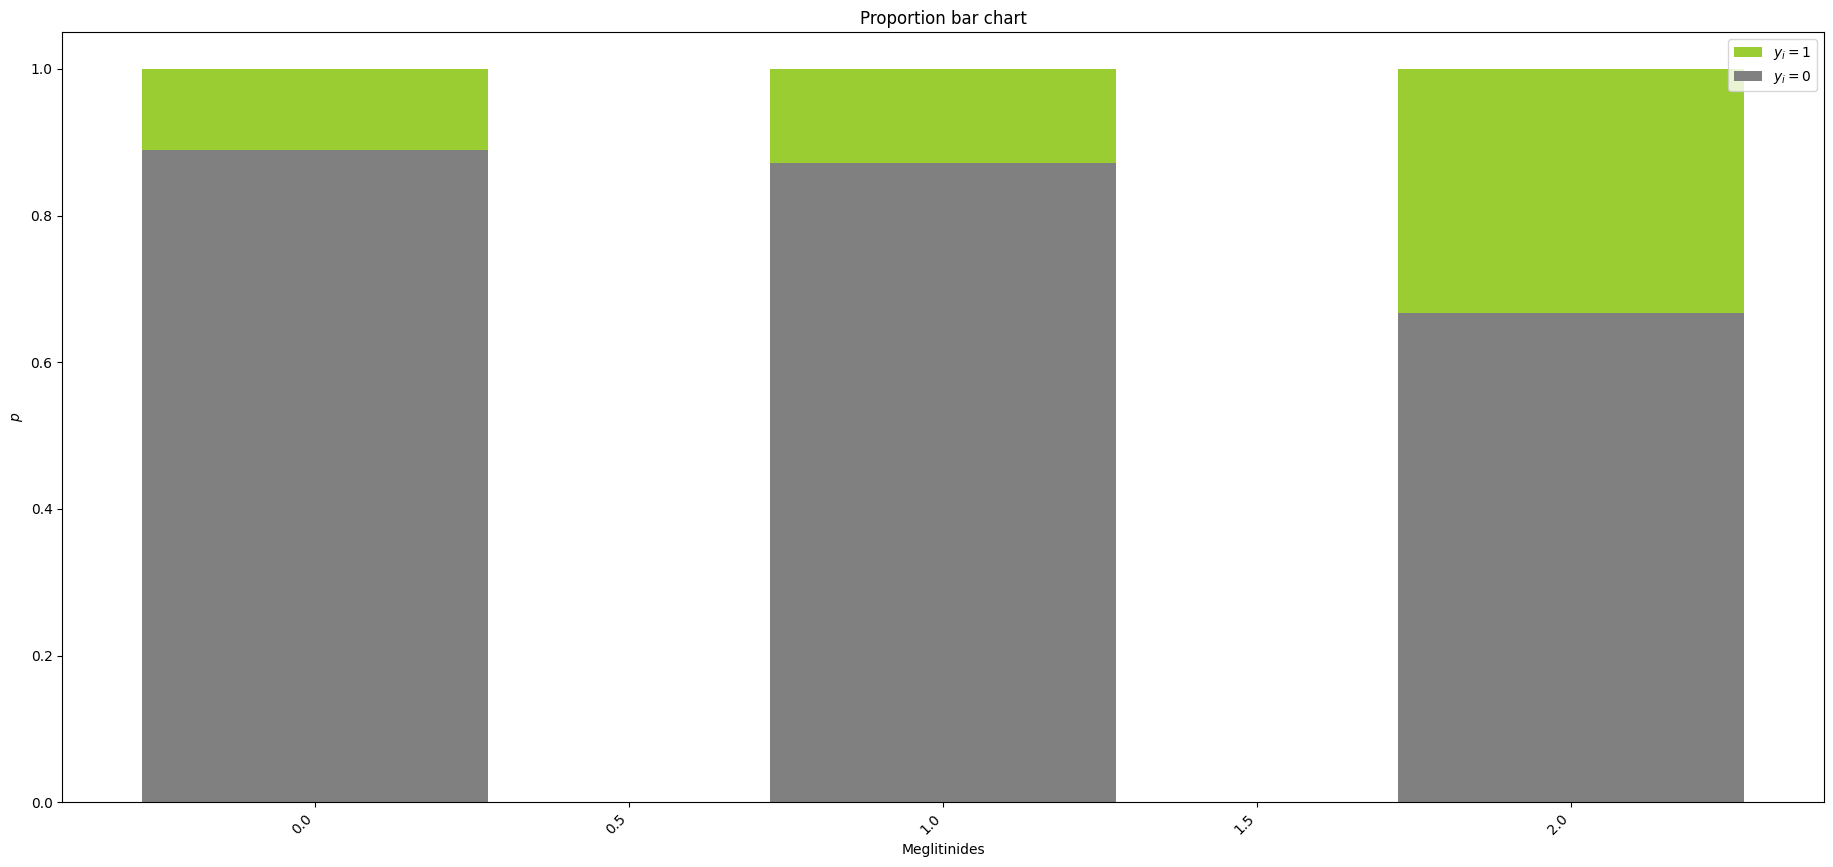

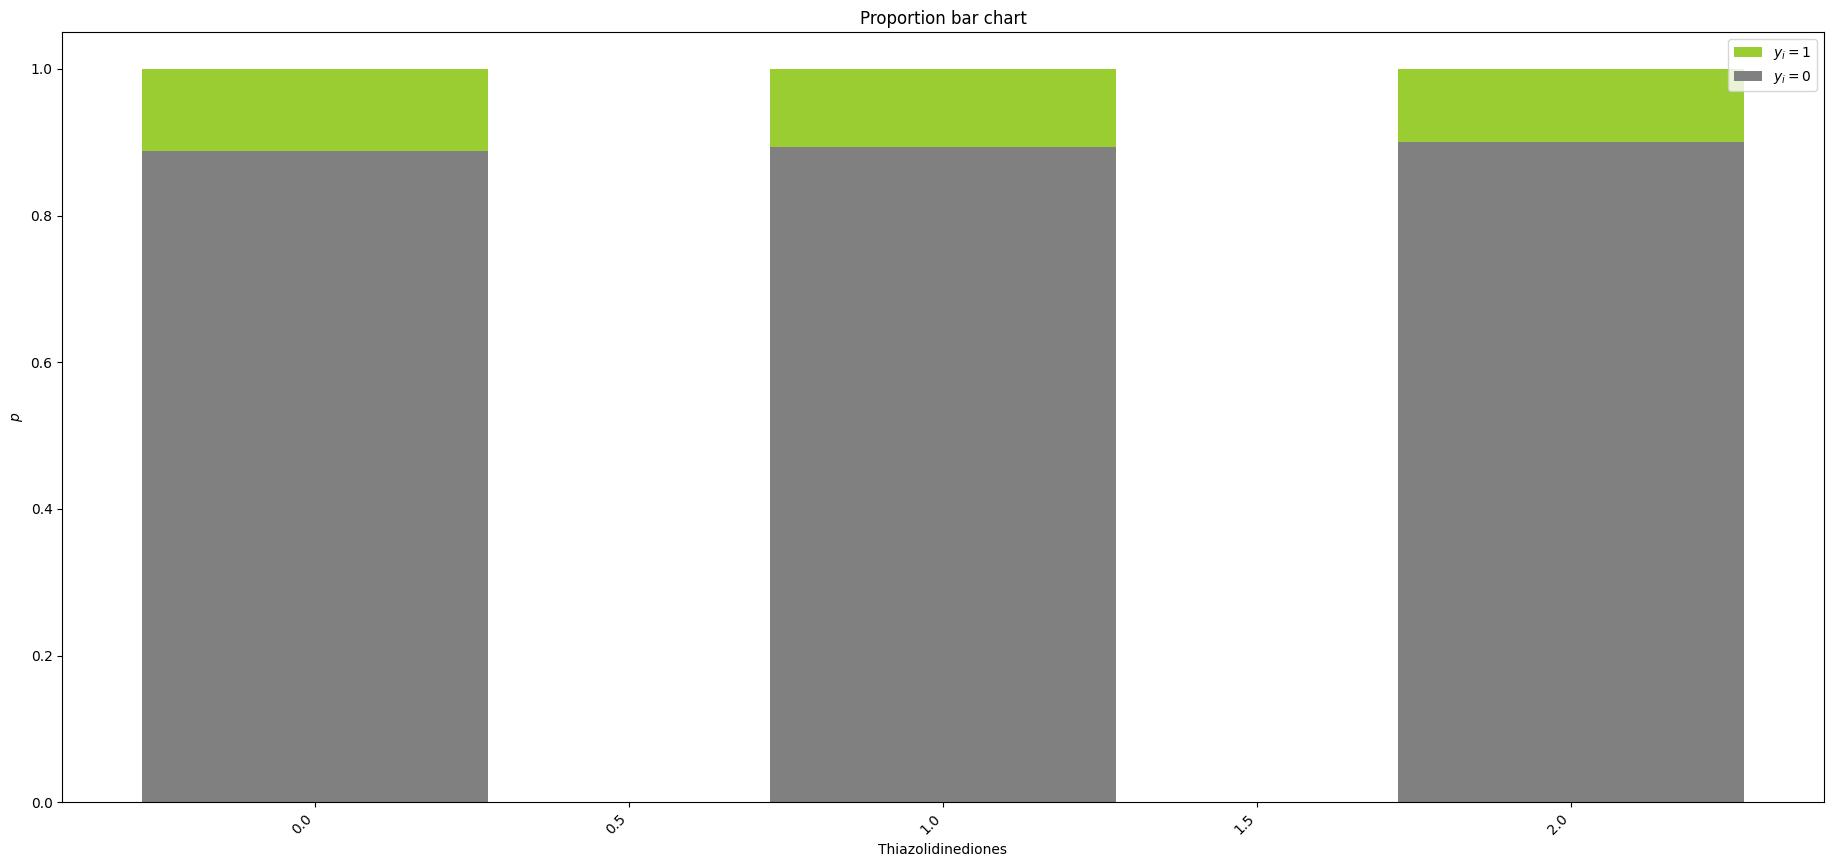

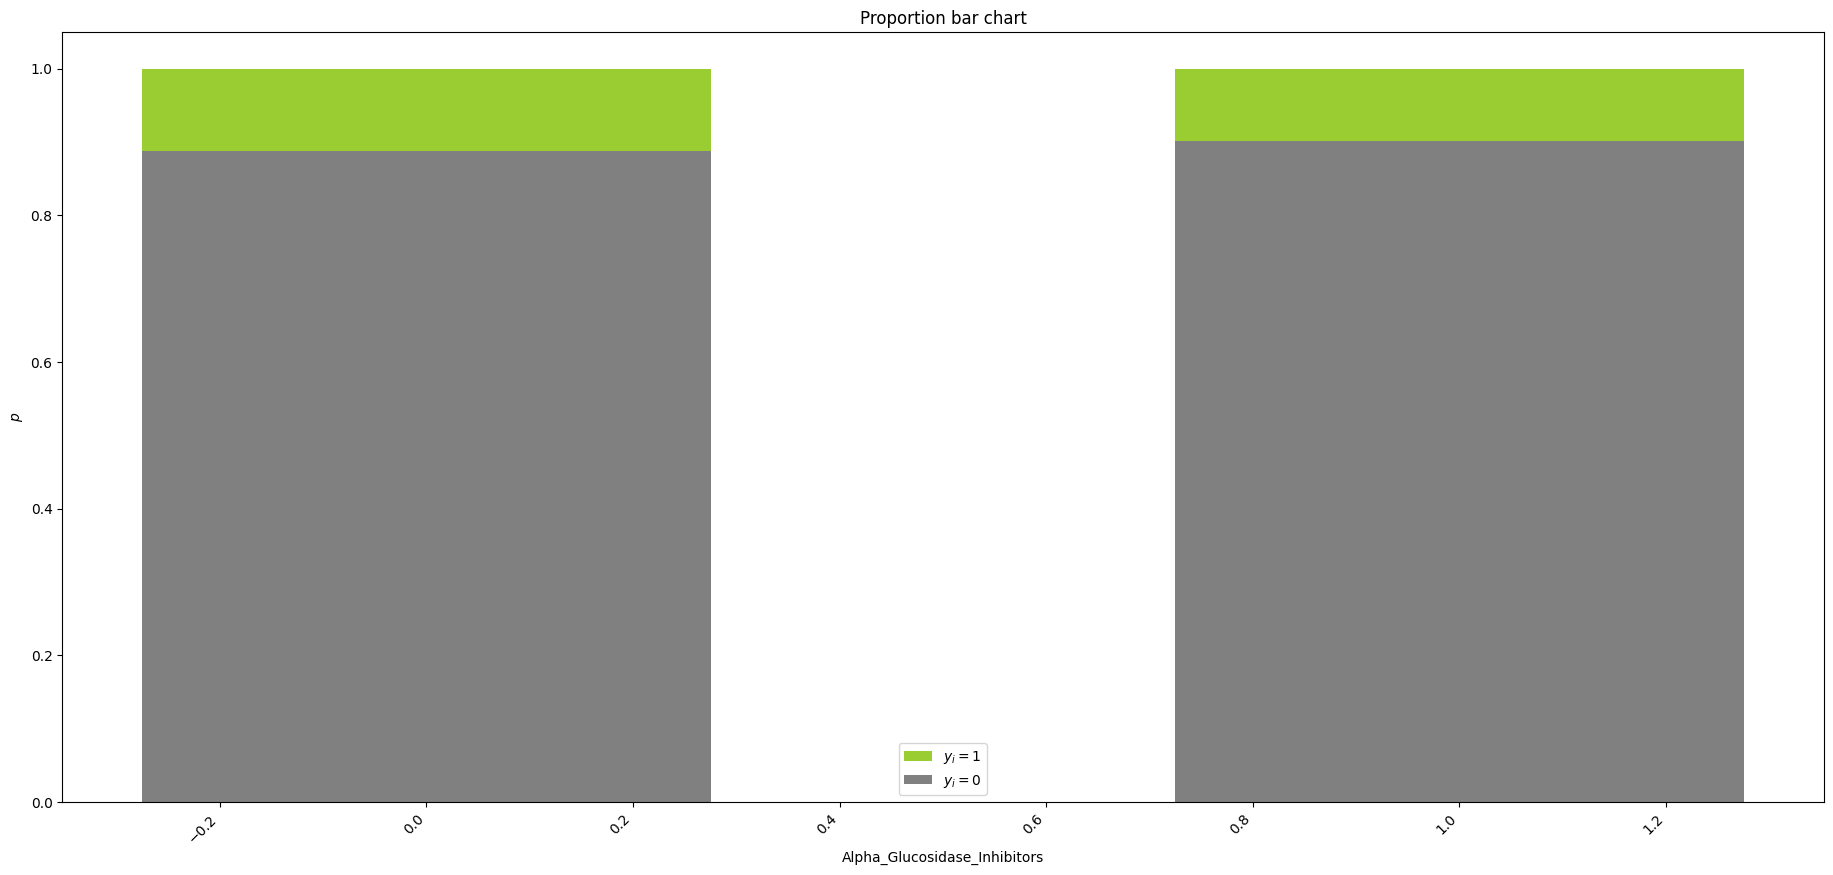

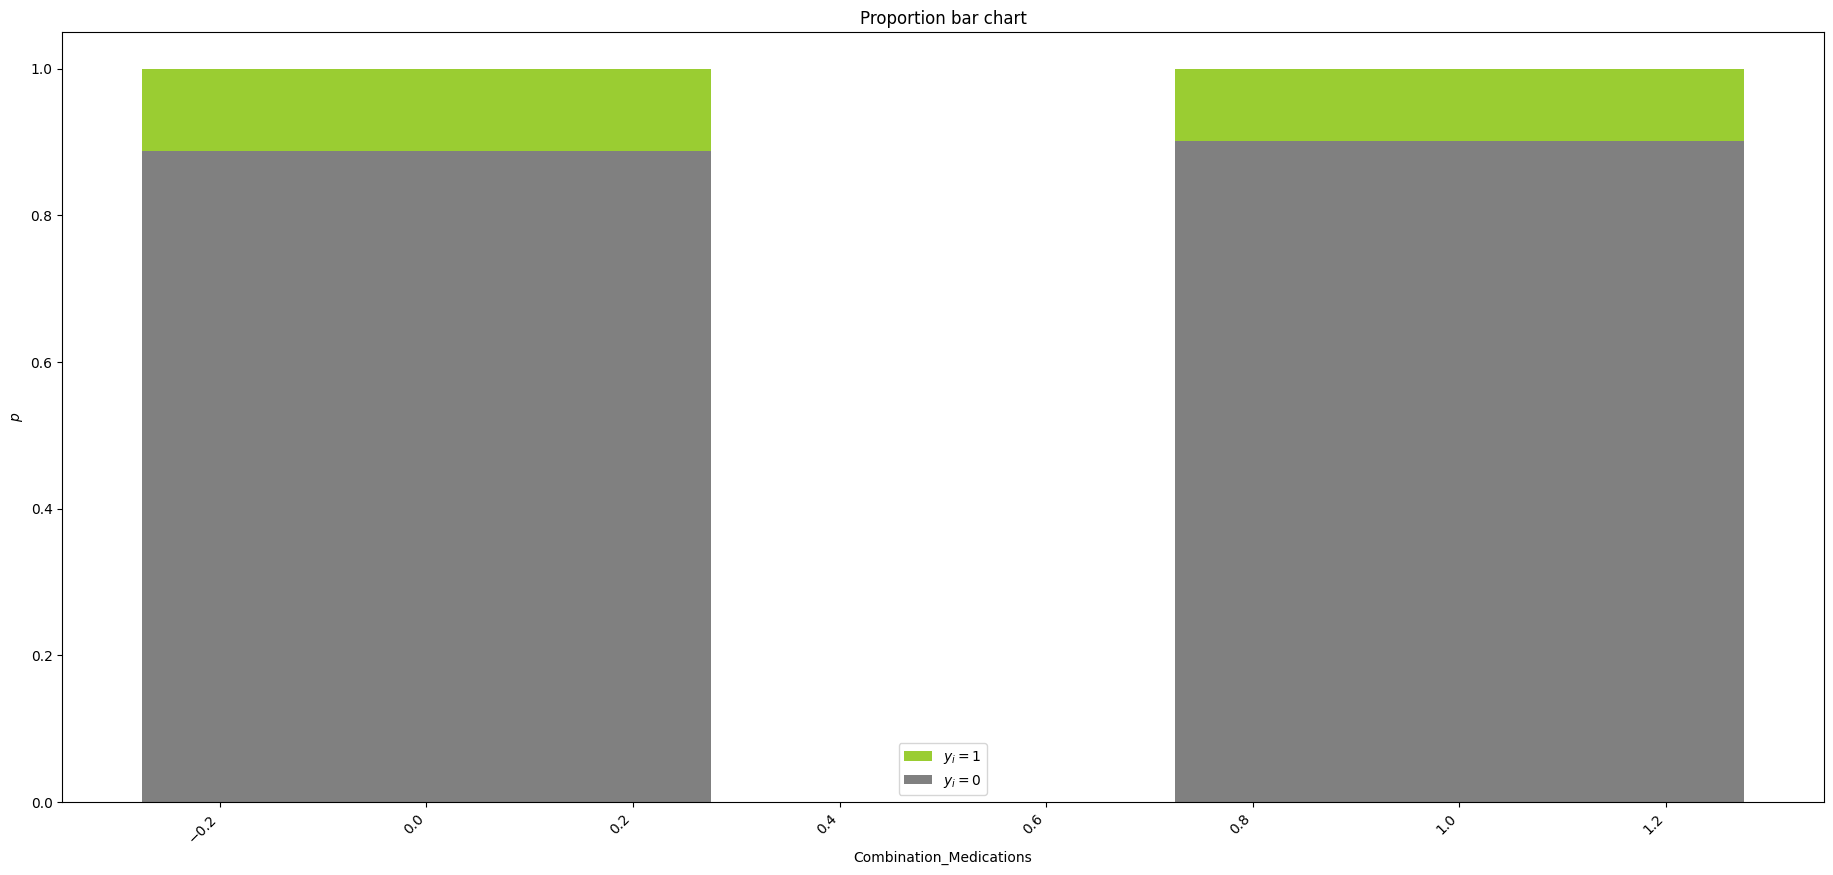

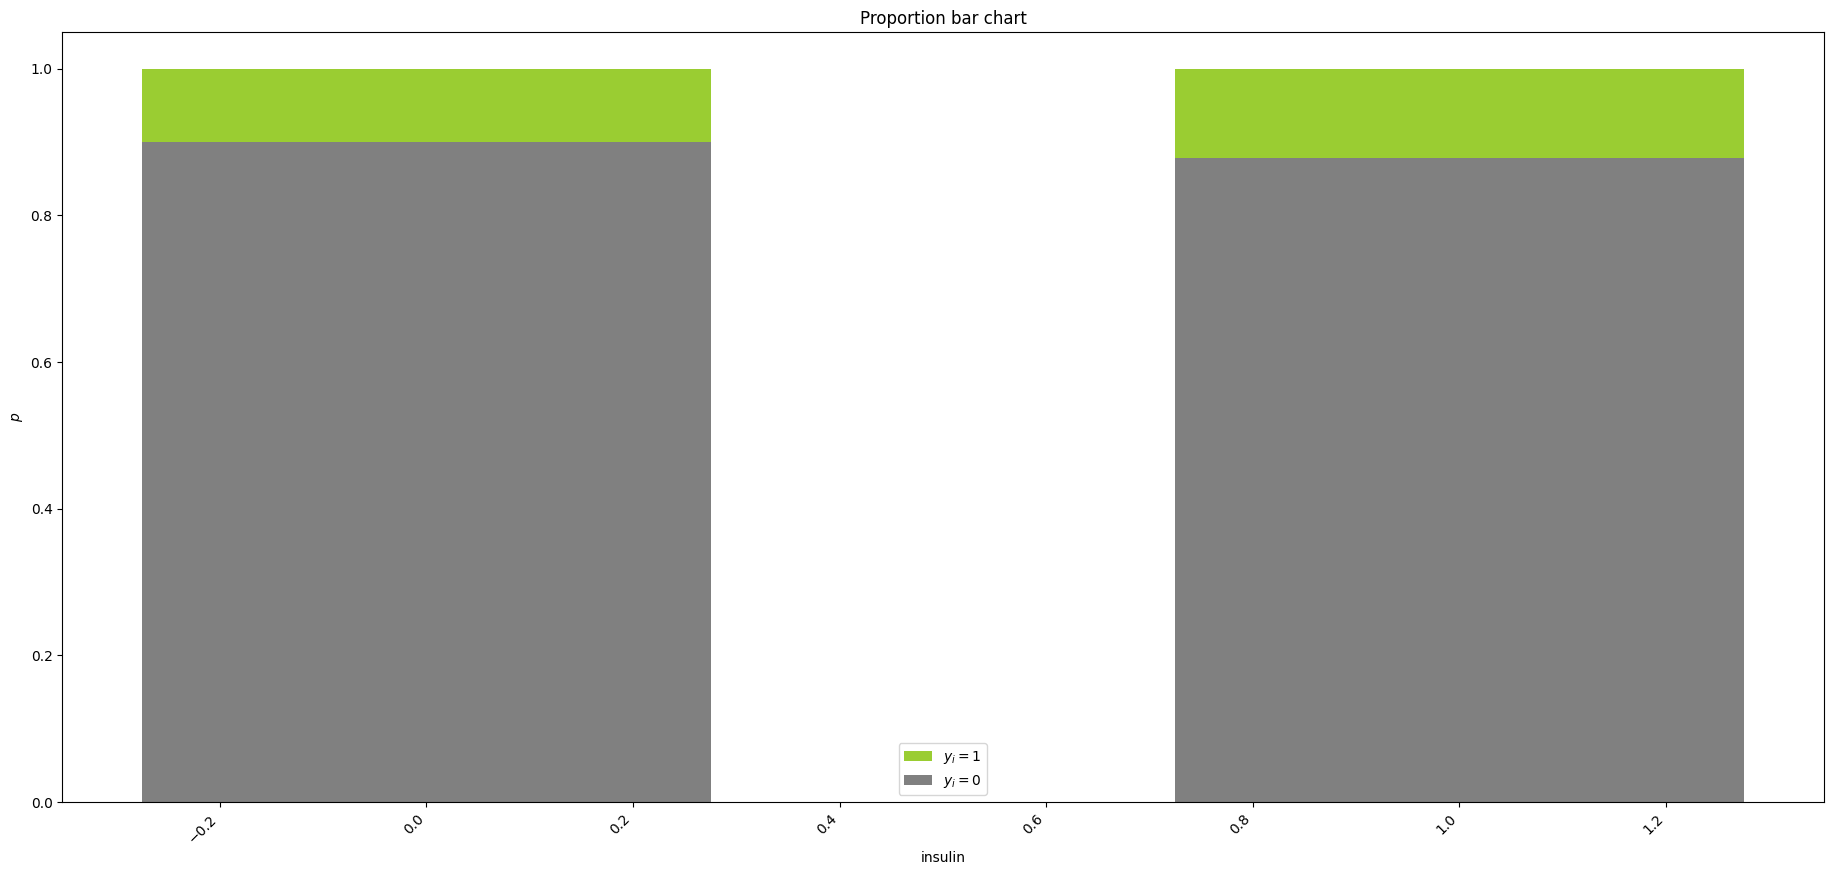

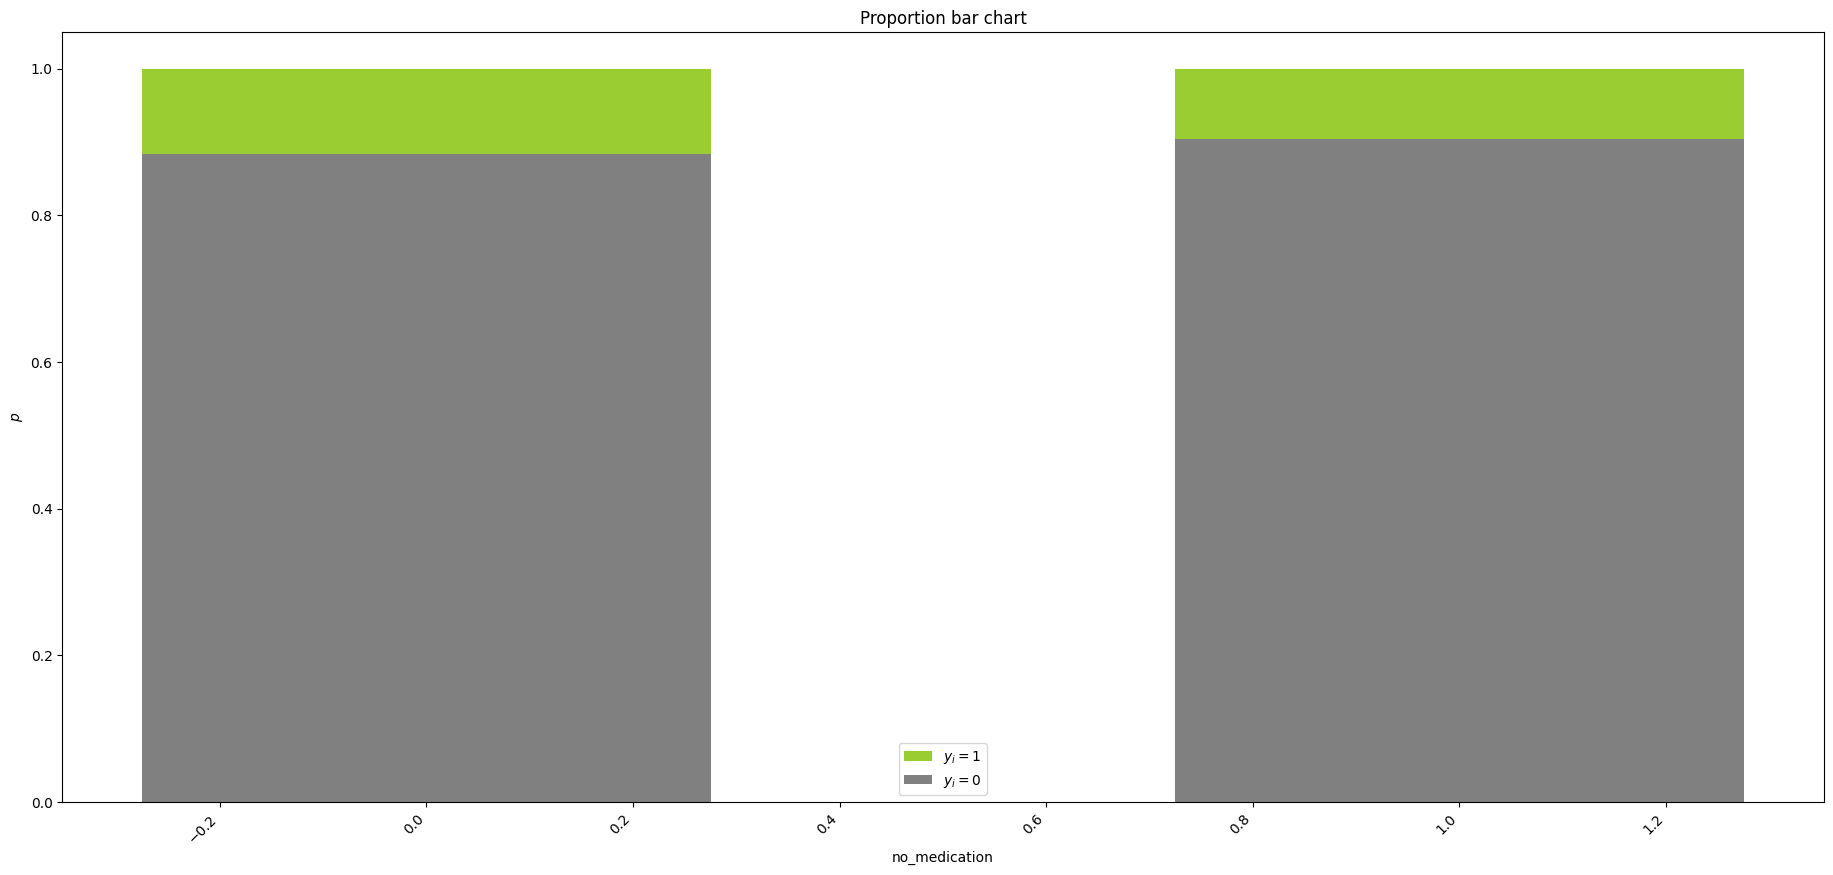

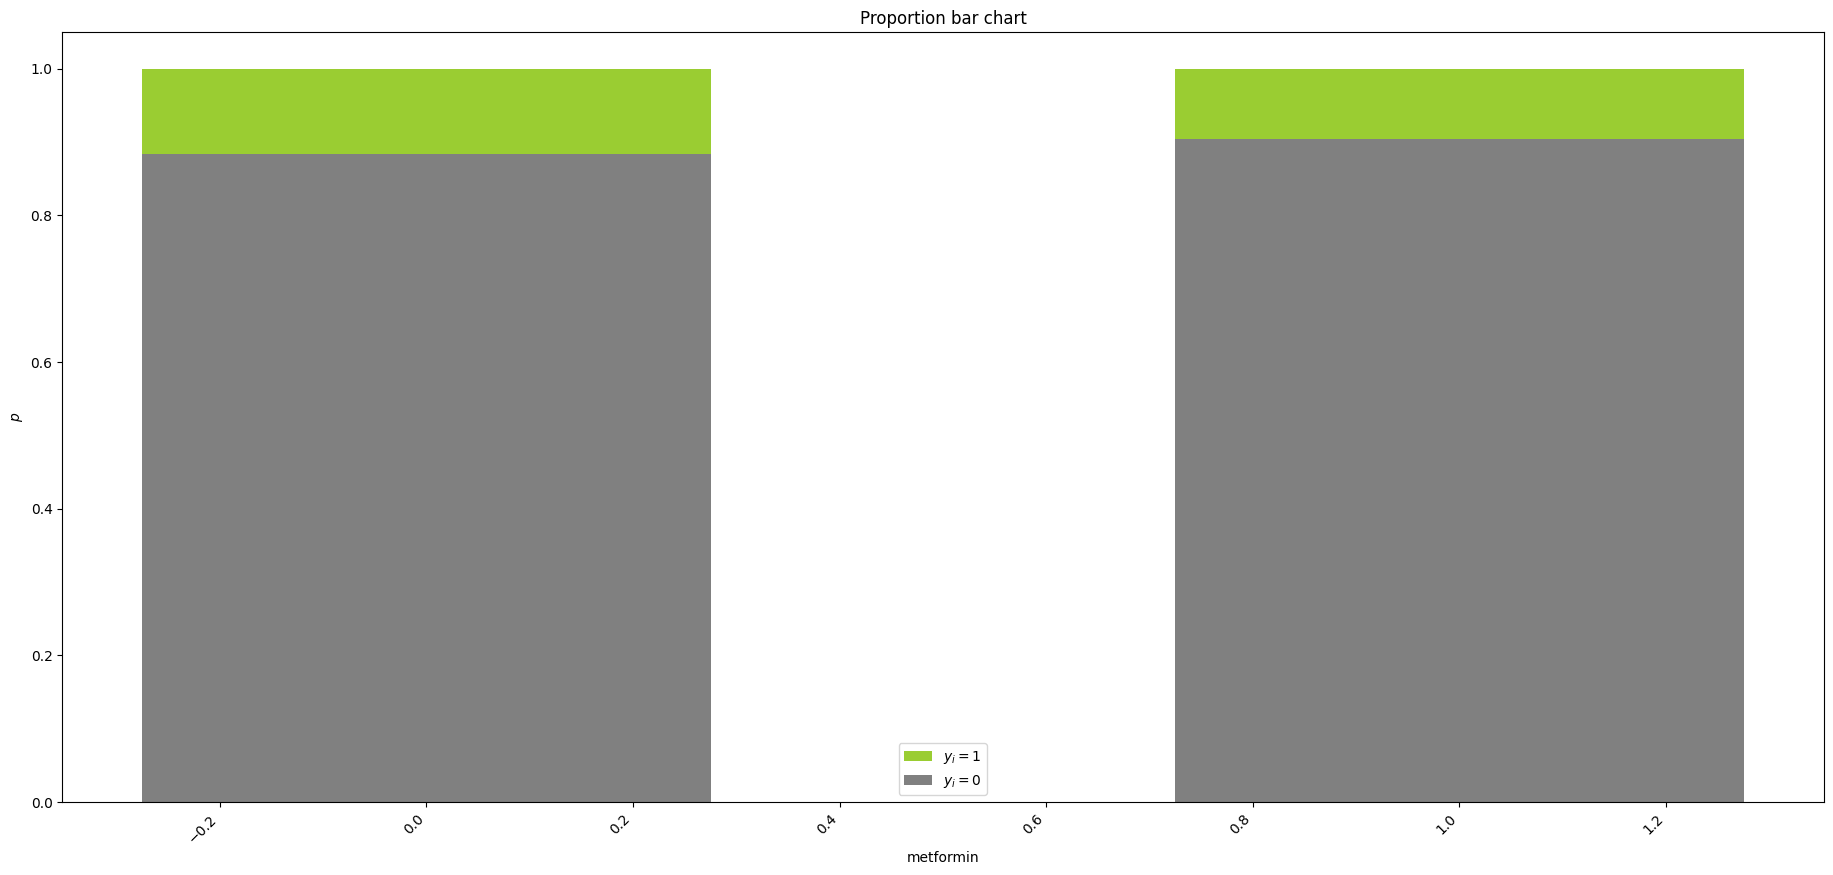

In [65]:
for col in medication_columns:
    bar_charts_categorical(train, col, "readmitted_binary")

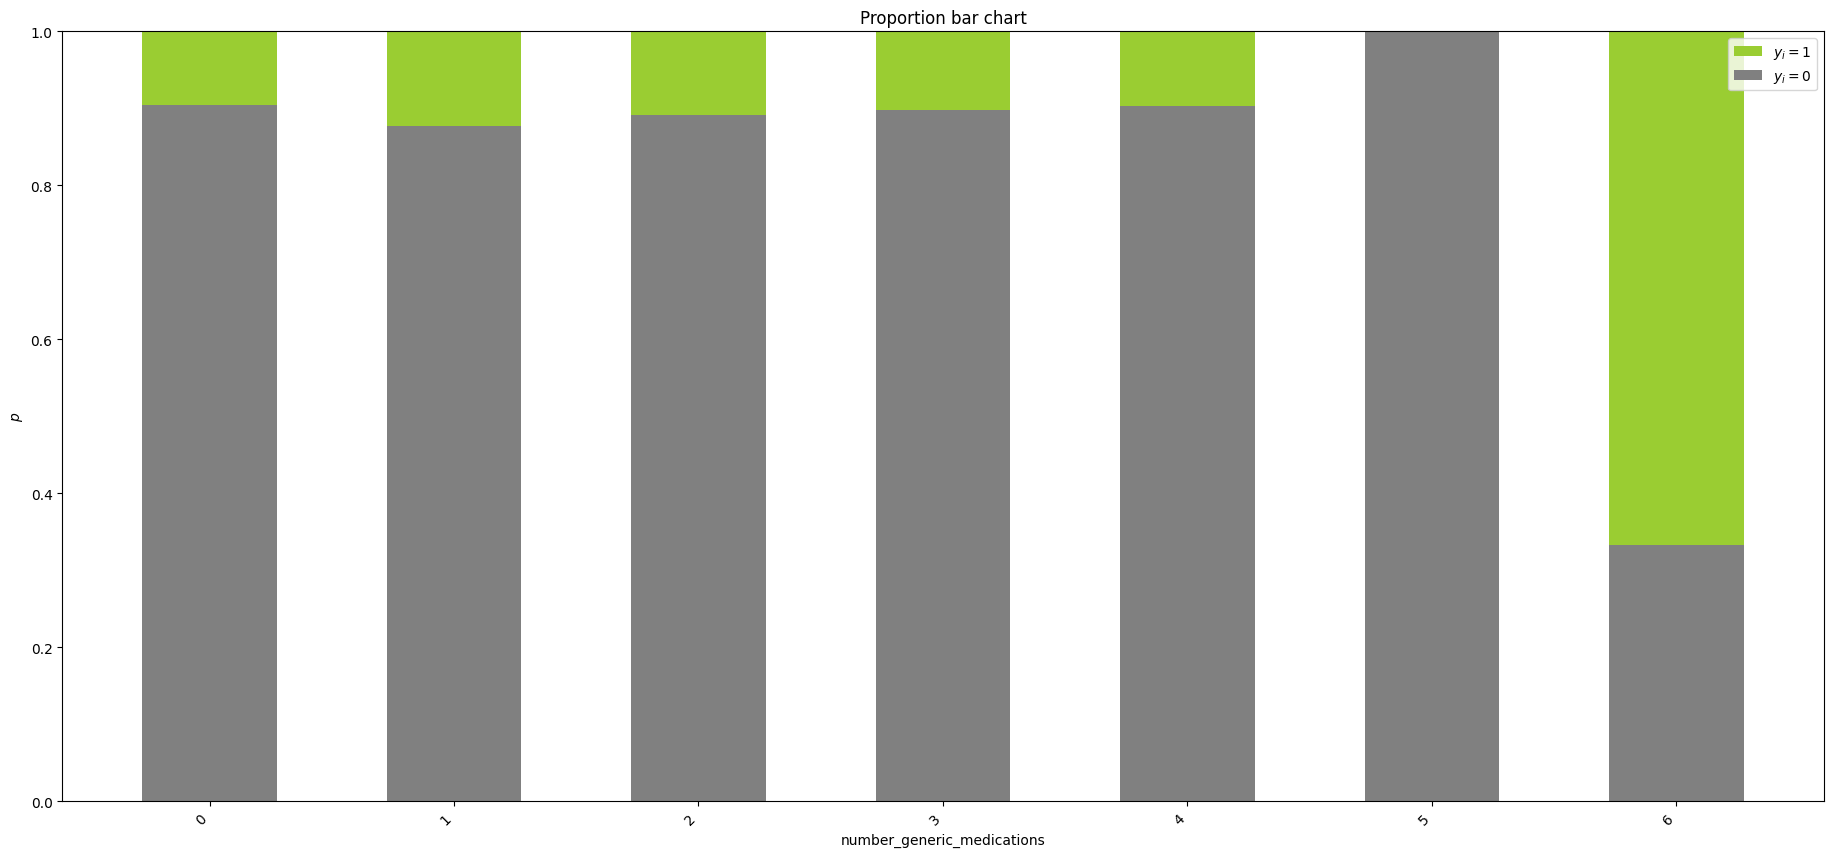

In [66]:
bar_charts_categorical(train, "number_generic_medications", "readmitted_binary")

In [67]:
# pd.set_option('display.max_colwidth', None)
train[train['number_generic_medications']==5]['medication']

encounter_id
552573    [metformin, glipizide, glyburide, pioglitazone...
123846    [metformin, repaglinide, glipizide, acarbose, ...
582550    [metformin, glimepiride, glyburide, rosiglitaz...
779718    [metformin, glimepiride, glipizide, pioglitazo...
933380    [metformin, repaglinide, glipizide, pioglitazo...
447982    [metformin, glyburide, pioglitazone, insulin, ...
692561    [metformin, glimepiride, glipizide, pioglitazo...
589216    [metformin, repaglinide, glimepiride, rosiglit...
999052    [metformin, glimepiride, glyburide, pioglitazo...
451372    [metformin, repaglinide, glimepiride, pioglita...
997560    [metformin, glimepiride, glyburide, pioglitazo...
994513    [metformin, glipizide, glyburide, pioglitazone...
162953    [metformin, glimepiride, glipizide, glyburide,...
531851    [metformin, glipizide, pioglitazone, rosiglita...
448305    [metformin, glipizide, glyburide, rosiglitazon...
456910    [metformin, glimepiride, glyburide, rosiglitaz...
607305    [metformin, glipi

In [68]:
# pd.set_option('display.max_colwidth', None)
test[test['number_generic_medications']==5]['medication']

encounter_id
990126    [metformin, glipizide, pioglitazone, rosiglita...
252924    [metformin, nateglinide, glimepiride, glipizid...
707897    [metformin, repaglinide, glyburide, pioglitazo...
915560    [metformin, glipizide, glyburide, rosiglitazon...
353917    [metformin, glimepiride, pioglitazone, acarbos...
965253    [metformin, nateglinide, glipizide, pioglitazo...
763262    [metformin, glipizide, glyburide, pioglitazone...
658521    [metformin, repaglinide, glipizide, pioglitazo...
821858    [metformin, glyburide, pioglitazone, rosiglita...
410586    [metformin, repaglinide, glipizide, rosiglitaz...
954243    [metformin, glimepiride, glipizide, rosiglitaz...
319387    [metformin, glipizide, glyburide, rosiglitazon...
991505    [metformin, repaglinide, rosiglitazone, acarbo...
760667    [metformin, glimepiride, rosiglitazone, miglit...
440154    [metformin, glipizide, glyburide, rosiglitazon...
413789    [metformin, glyburide, pioglitazone, acarbose,...
182499    [metformin, glime

In [69]:
# pd.set_option('display.max_colwidth', None)
train[train['number_generic_medications']==6][['medication','readmitted_binary']]

,medication,readmitted_binary
encounter_id,,
308794,"[metformin, nateglinide, glipizide, rosiglitaz...",Yes
837132,"[metformin, nateglinide, glipizide, glyburide,...",Yes
890037,"[metformin, glimepiride, glipizide, pioglitazo...",No


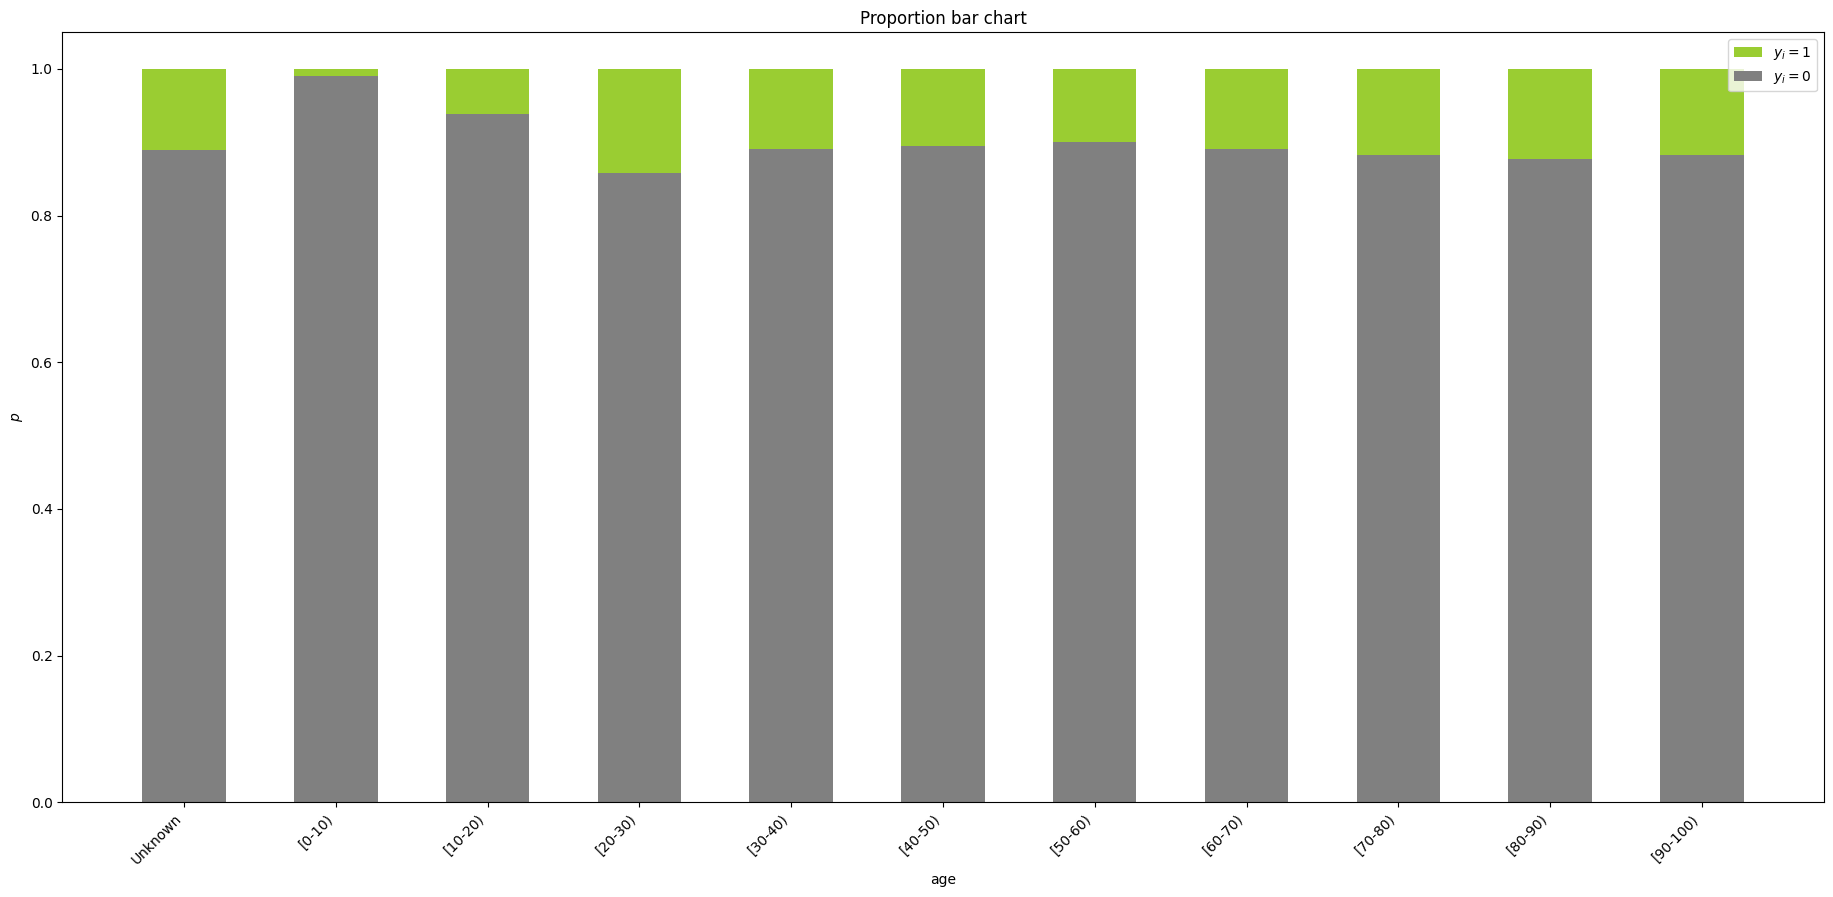

In [70]:
bar_charts_categorical(train, "age", "readmitted_binary")

In [71]:
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')


df['Midpoint_Age'] = average_age = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                       (df['Lower_Age'] + df['Upper_Age']) / 2,
                       np.nan)
train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)

In [72]:
data = test['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')

# Calculate the midpoint age
df['Midpoint_Age'] = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                              (df['Lower_Age'] + df['Upper_Age']) / 2,
                              np.nan)
test['Midpoint_Age'] = df['Midpoint_Age']
test.drop('age', axis=1, inplace=True)

In [73]:
train['Midpoint_Age'].fillna('Unknown', inplace=True)

In [74]:
test['Midpoint_Age'].fillna('Unknown', inplace=True)

In [75]:
train[train['Midpoint_Age']=='Unknown'].shape[0]

3557

In [76]:
test[test['Midpoint_Age']=='Unknown'].shape[0]

1531

In [77]:
def fill_age(df):
    for i, row in df.iterrows():
        if row['Midpoint_Age'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['Midpoint_Age'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'Midpoint_Age'] = other_rows.iloc[0]['Midpoint_Age']
    return df

fill_age(train)

,patient_id,gender,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,number_generic_medications,metformin,insulin,no_medication,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,Midpoint_Age
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Female,None,0,0,2,Emergency,Family/GeneralPractice,127,Discharged to home,...,0,0,0,1,0,0,0,0,0,75.0
426224,29775006,Male,None,0,0,0,Emergency,Unknown,128,Discharged/transferred to a federal health car...,...,1,0,1,0,0,0,0,0,0,55.0
634063,80729253,Female,None,0,0,1,Unknown,Family/GeneralPractice,94,Discharged to home,...,2,0,1,0,0,0,0,0,0,65.0
890610,2919042,Male,MC,0,0,1,Emergency,InternalMedicine,81,Discharged to home,...,0,0,0,1,0,0,0,0,0,65.0
654194,84871971,Female,HM,1,0,0,Elective,Unknown,126,Discharged/transferred to home with home healt...,...,0,0,0,1,0,0,0,0,0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,Female,MC,0,1,0,Elective,InternalMedicine,90,Discharged to home,...,3,1,1,0,1,0,0,0,0,85.0
826429,4663818,Female,None,0,0,0,Urgent,Unknown,98,Unknown,...,2,1,0,0,1,0,0,0,0,75.0
332030,23397147,Female,None,0,2,2,Unknown,Unknown,137,Not Mapped,...,2,0,1,0,1,0,0,0,0,65.0


In [78]:
fill_age(test)

,patient_id,gender,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,number_generic_medications,metformin,insulin,no_medication,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,Midpoint_Age
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,103232799,Male,HM,0,0,0,Emergency,Unknown,139,Discharged to home,...,1,1,0,0,0,0,0,0,0,85.0
447319,93395304,Male,HM,0,0,1,Emergency,Unknown,103,Discharged to home,...,0,0,0,1,0,0,0,0,0,25.0
309126,6281586,Male,None,0,0,0,Emergency,Pulmonology,99,Discharged to home,...,1,0,1,0,0,0,0,0,0,35.0
181183,67381308,Male,BC,0,0,0,Not Available,Unknown,136,Discharged to home,...,3,1,1,0,1,0,0,0,0,55.0
359339,71670204,Male,None,0,0,0,Emergency,InternalMedicine,137,Discharged to home,...,1,1,0,0,0,0,0,0,0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,85707450,Male,HM,0,0,0,Emergency,Unknown,133,Discharged/transferred to SNF,...,0,0,0,1,0,0,0,0,0,75.0
549298,328887,Male,None,0,0,4,Emergency,Family/GeneralPractice,62,Discharged to home,...,1,0,1,0,0,0,0,0,0,65.0
327586,21915459,Female,None,0,0,0,Emergency,Nephrology,121,Discharged/transferred to SNF,...,1,0,1,0,0,0,0,0,0,85.0


In [79]:
train[train['Midpoint_Age']=='Unknown'].shape[0]

2217

In [80]:
test[test['Midpoint_Age']=='Unknown'].shape[0]

1194

In [81]:
train['gender'].value_counts()

gender
Female             38228
Male               33005
Unknown/Invalid        3
Name: count, dtype: int64

In [82]:
train[train['gender'] == 'Unknown/Invalid']

,patient_id,gender,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,number_generic_medications,metformin,insulin,no_medication,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,Midpoint_Age
encounter_id,,,,,,,,,,,,,,,,,,,,,
208080,78119847,Unknown/Invalid,CP,0,0,0,Emergency,Unknown,111,Discharged/transferred to another rehab fac in...,...,2,1,0,0,0,0,1,0,0,75.0
978787,60524946,Unknown/Invalid,CP,0,0,0,Emergency,Unknown,87,Discharged to home,...,0,0,0,1,0,0,0,0,0,65.0
876217,100695042,Unknown/Invalid,None,0,0,0,Elective,Cardiology,114,Discharged to home,...,2,0,0,0,1,0,1,0,0,75.0


In [83]:
#Female = 0 Male = 1 and the Unknown/Invalid becomes Female because it is the mode in the train
train['gender_binary'] = np.where(train['gender']== 'Male',1,0)
train.drop('gender', axis=1, inplace=True)

In [84]:
#Female = 0 Male = 1 and the Unknown/Invalid becomes Female because it is the mode in the train
test['gender_binary'] = np.where(test['gender']== 'Male',1,0)
test.drop('gender', axis=1, inplace=True)

In [85]:
train['gender_binary'].value_counts()

gender_binary
0    38231
1    33005
Name: count, dtype: int64

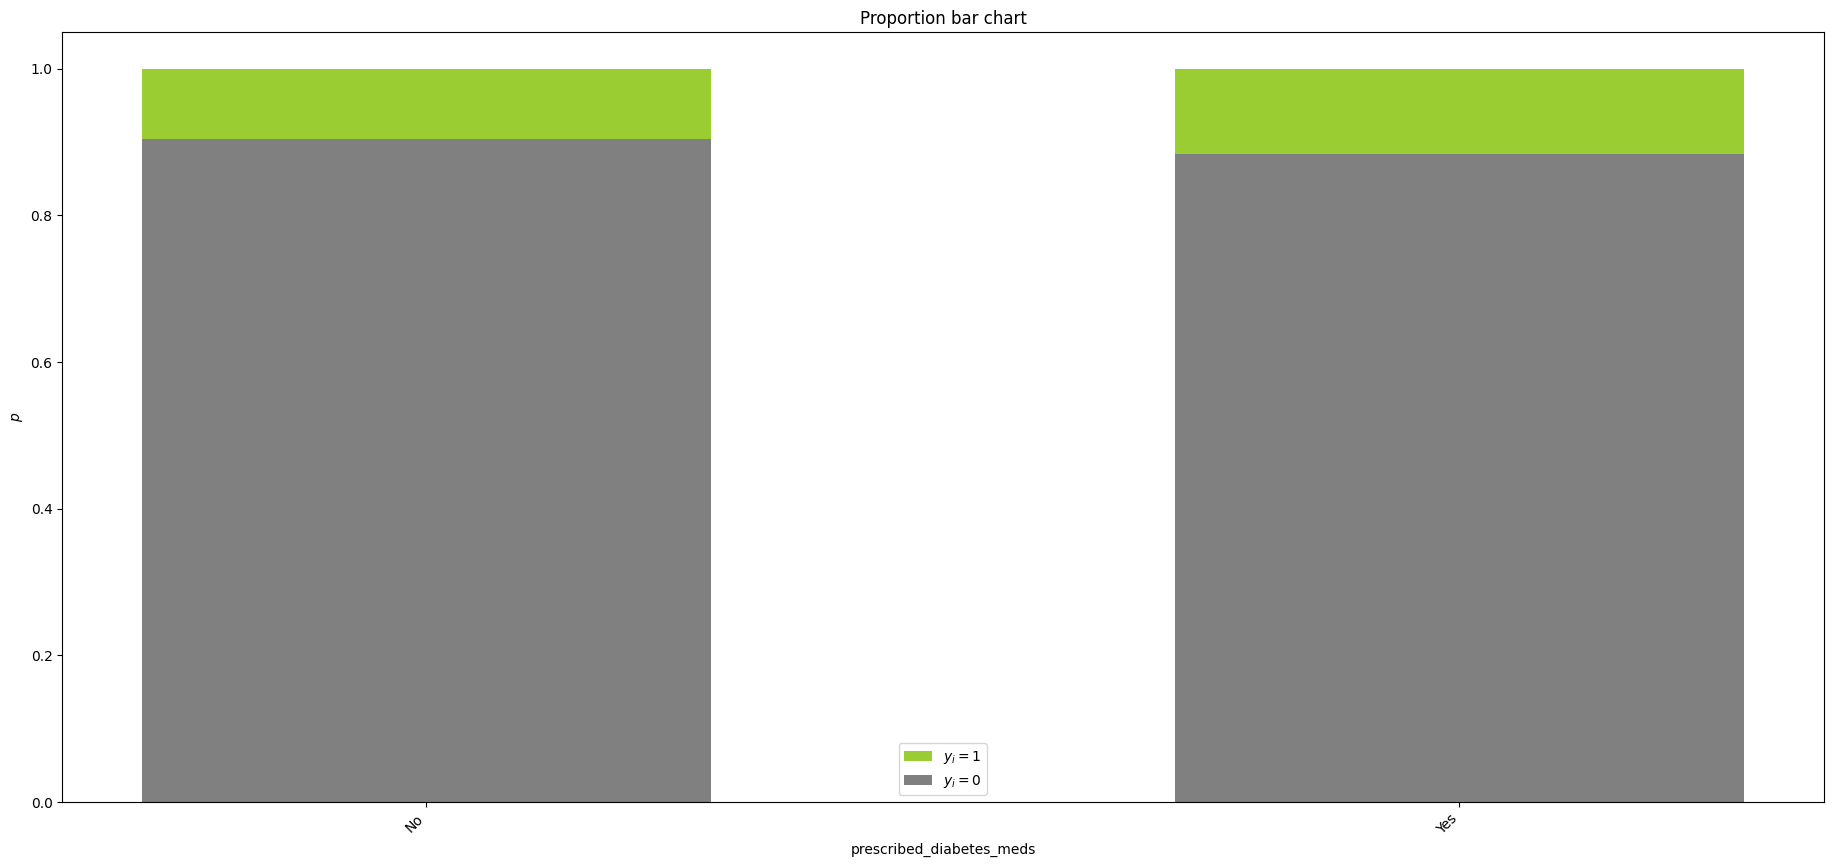

In [86]:
bar_charts_categorical(train, "prescribed_diabetes_meds", "readmitted_binary")

In [87]:
#No = 0 Yes = 1
train['presc_diabetes_meds_binary'] = np.where(train['prescribed_diabetes_meds']== 'Yes',1,0)
train.drop('prescribed_diabetes_meds', axis=1, inplace=True)

In [88]:
#No = 0 Yes = 1
test['presc_diabetes_meds_binary'] = np.where(test['prescribed_diabetes_meds']== 'Yes',1,0)
test.drop('prescribed_diabetes_meds', axis=1, inplace=True)

In [89]:
#no change = 0 change = 1
train['change_in_meds_binary'] = np.where(train['change_in_meds']== 'Ch',1,0)
train.drop('change_in_meds', axis=1, inplace=True)

In [90]:
#no change = 0 change = 1
test['change_in_meds_binary'] = np.where(test['change_in_meds']== 'Ch',1,0)
test.drop('change_in_meds', axis=1, inplace=True)

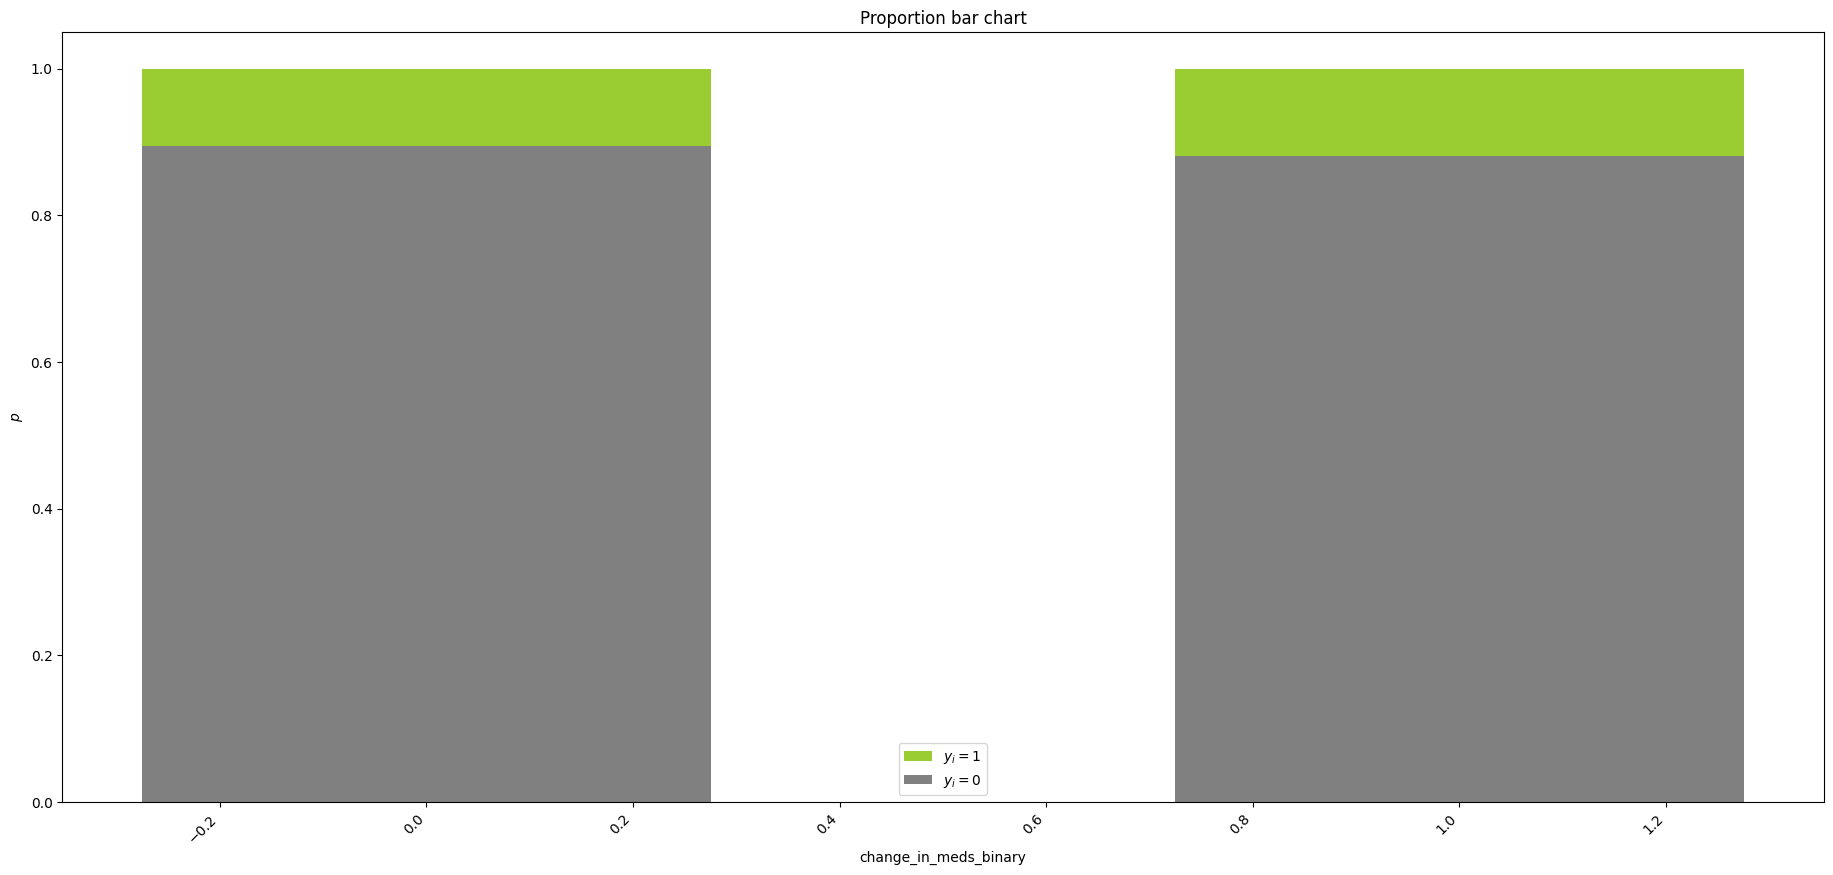

In [91]:
bar_charts_categorical(train, "change_in_meds_binary", "readmitted_binary")

In [92]:
n_categorical_columns= len(train.select_dtypes(exclude=np.number).columns)
categorical_columns = list(train.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 14 columns with categorical values:

['payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'medication', 'readmitted_binary', 'readmitted_multiclass', 'Midpoint_Age']


In [93]:
n_categorical_columns= len(test.select_dtypes(exclude=np.number).columns)
categorical_columns = list(test.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 12 columns with categorical values:

['payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'medication', 'Midpoint_Age']


In [94]:
train['payer_code'].value_counts()

payer_code
None    28201
MC      22683
HM       4319
SP       3541
BC       3292
MD       2484
CP       1762
UN       1733
CM       1347
OG        729
PO        405
DM        378
CH        102
WC         99
OT         61
MP         54
SI         45
FR          1
Name: count, dtype: int64

In [95]:
value_counts = train['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.01].index

# Replacing the categories that have less than 1% of the number of rows

train['payer_code'] = train['payer_code'].replace(replace_payer_code, 'Other_code')

In [96]:
value_counts = test['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.01].index

# Replacing the categories that have less than 1% of the number of rows

test['payer_code'] = test['payer_code'].replace(replace_payer_code, 'Other_code')

In [97]:
train['payer_code'].value_counts()

payer_code
None          28201
MC            22683
HM             4319
SP             3541
BC             3292
MD             2484
CP             1762
UN             1733
CM             1347
Other_code     1145
OG              729
Name: count, dtype: int64

In [98]:
test['payer_code'].value_counts()

payer_code
None          12055
MC             9756
HM             1955
SP             1466
BC             1363
MD             1048
Other_code      811
CP              771
UN              715
CM              590
Name: count, dtype: int64

In [99]:
train['Has_Insurance'] = train['payer_code'].apply(lambda x: 0 if x == 'None' else 1)

In [100]:
test['Has_Insurance'] = test['payer_code'].apply(lambda x: 0 if x == 'None' else 1)

In [103]:
test['Has_Insurance'].value_counts()

Has_Insurance
1    18475
0    12055
Name: count, dtype: int64

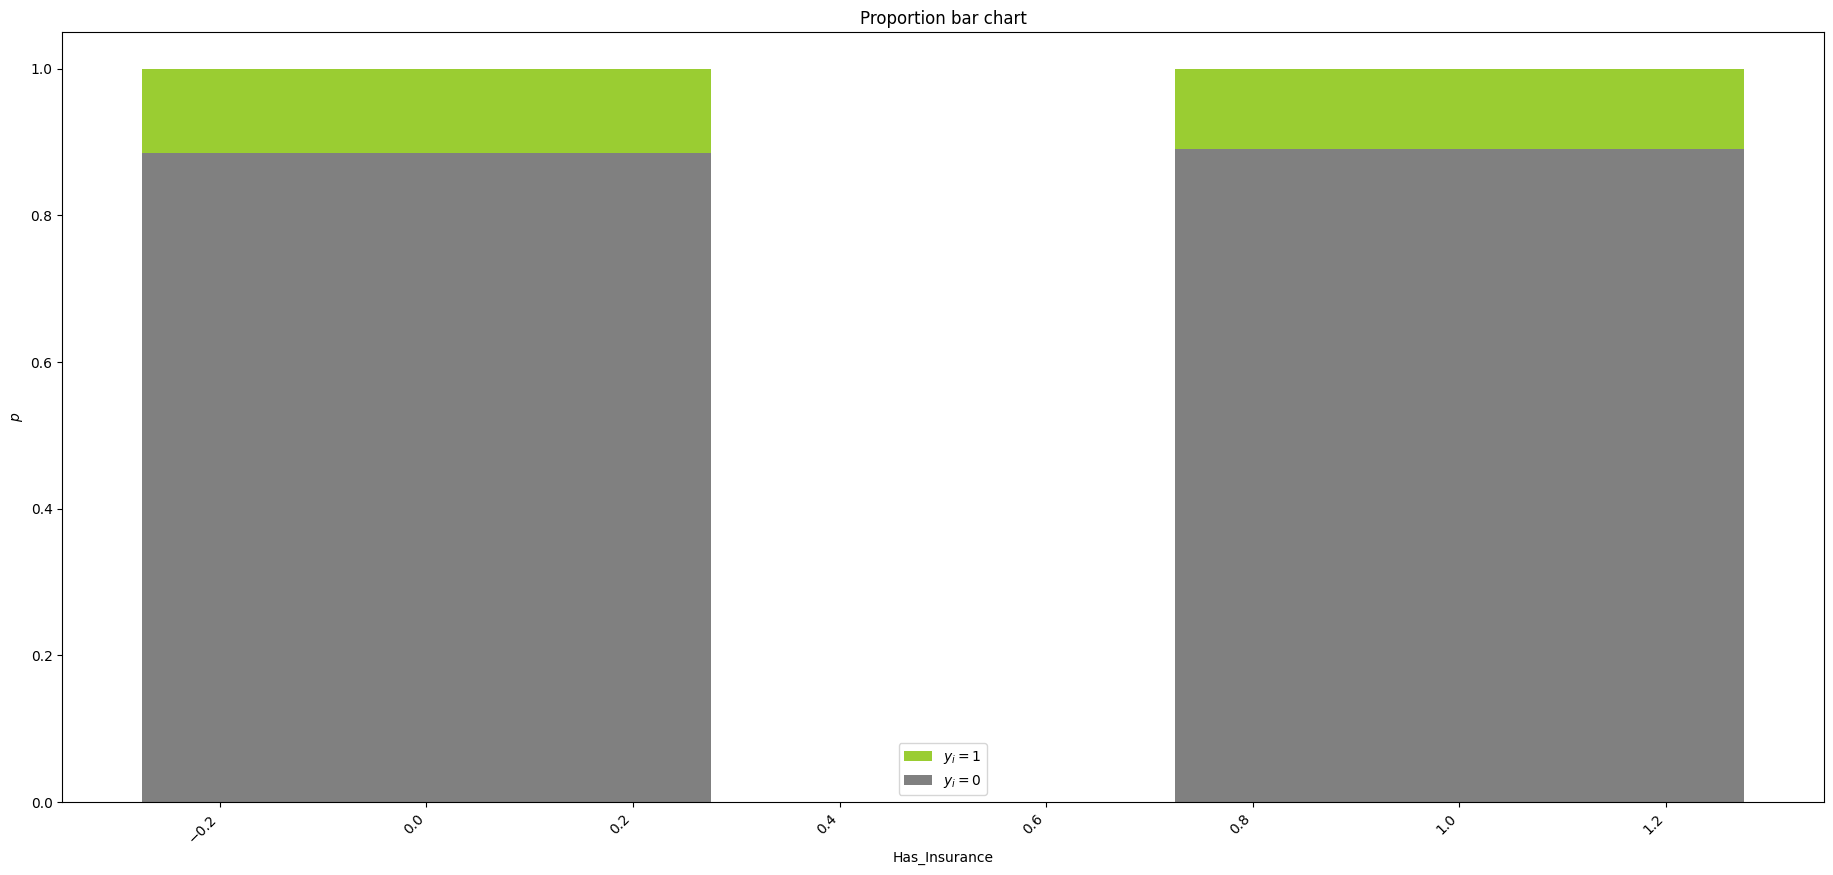

In [101]:
bar_charts_categorical(train, "Has_Insurance", "readmitted_binary")

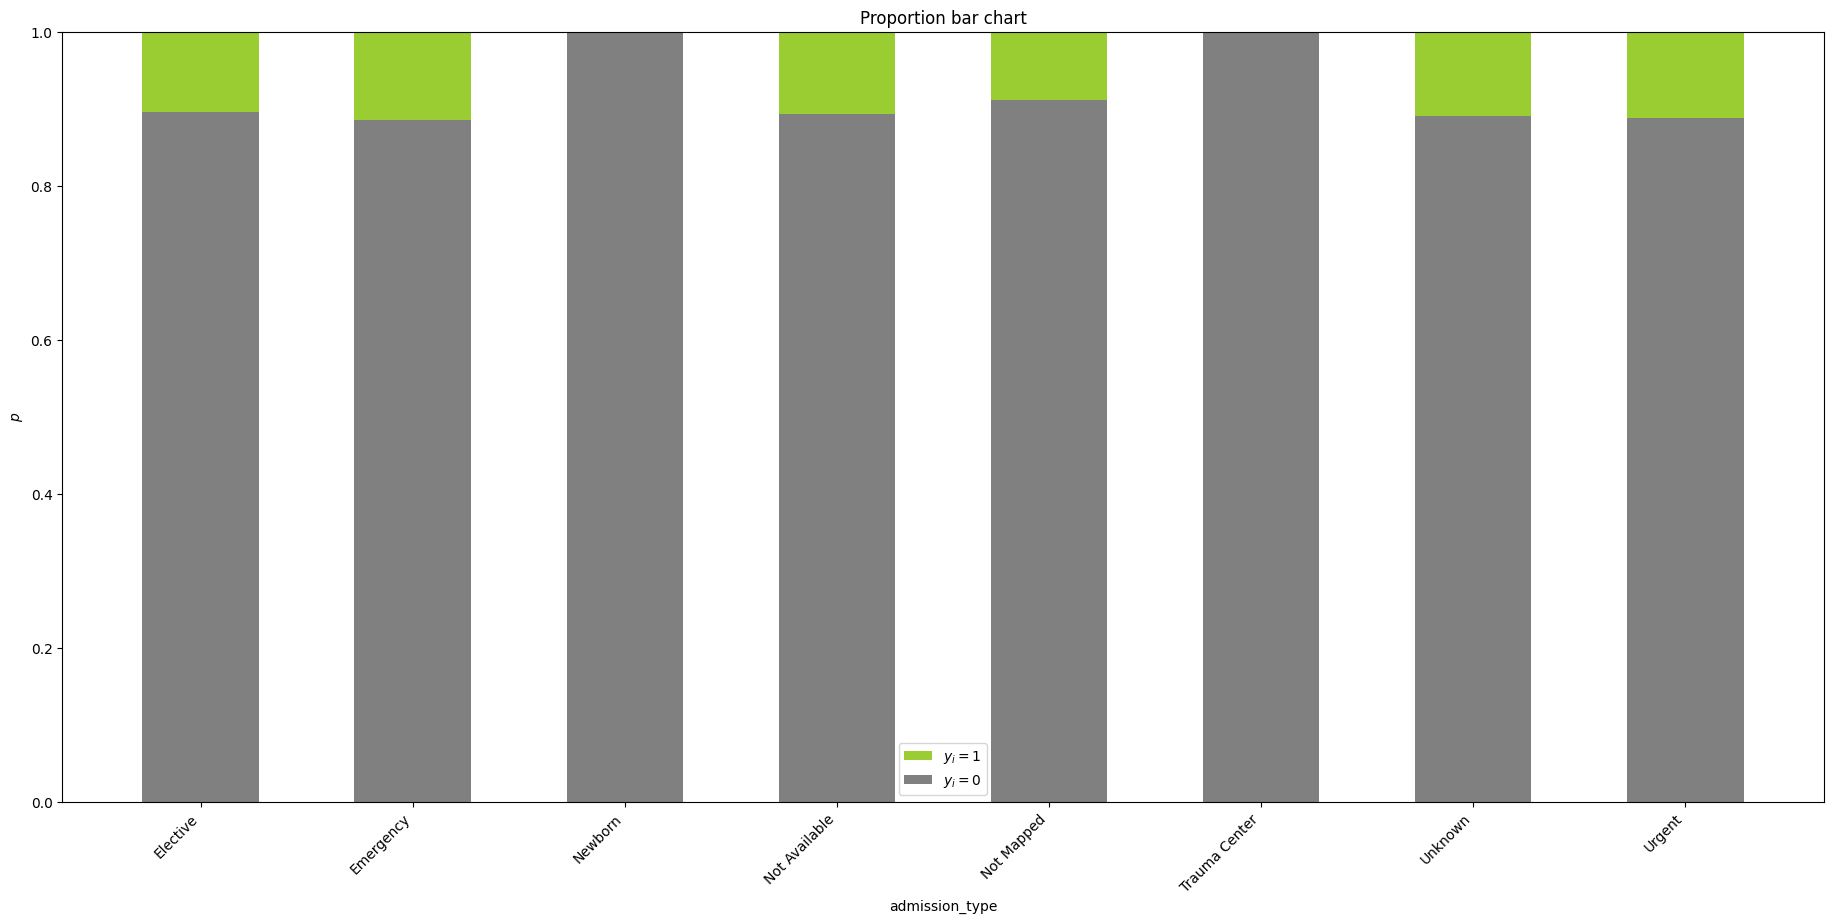

In [104]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

In [105]:
train["admission_type"].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Unknown           3706
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

In [107]:
train[train["admission_type"]=='Newborn'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
268572,85.0,Newborn
531496,75.0,Newborn
129737,45.0,Newborn
394366,75.0,Newborn
203219,5.0,Newborn
792408,55.0,Newborn


In [108]:
train[train["admission_type"]=='Trauma Center'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
693982,55.0,Trauma Center
150293,Unknown,Trauma Center
477599,55.0,Trauma Center
764141,85.0,Trauma Center
694176,55.0,Trauma Center
658996,75.0,Trauma Center
203632,45.0,Trauma Center
444992,55.0,Trauma Center
674039,55.0,Trauma Center


In [109]:
# We replace Unknown with Other_Type because the relation to the target is very similar, we can try to predict the unknown with
# Admission Source for example in the future (and some other columns)

train['admission_type'] = train['admission_type'].replace('Unknown', 'Other_type')
train['admission_type'] = train['admission_type'].replace('Trauma Center', 'Urgent')
train['admission_type'] = train['admission_type'].replace('Not Available', 'Other_type')
train['admission_type'] = train['admission_type'].replace('Not Mapped', 'Other_type')
train['admission_type'] = train['admission_type'].replace('Newborn', 'Other_type')
train['admission_type'] = train['admission_type'].replace({'Urgent': 'Urgent/Emergency', 'Emergency': 'Urgent/Emergency'})

train['admission_type'].value_counts(normalize=True)

admission_type
Urgent/Emergency    0.712828
Elective            0.185454
Other_type          0.101718
Name: proportion, dtype: float64

In [110]:
# We replace Unknown with Other_Type because the relation to the target is very similar, we can try to predict the unknown with
# Admission Source for example in the future (and some other columns)

test['admission_type'] = test['admission_type'].replace('Unknown', 'Other_type')
test['admission_type'] = test['admission_type'].replace('Trauma Center', 'Urgent')
test['admission_type'] = test['admission_type'].replace('Not Available', 'Other_type')
test['admission_type'] = test['admission_type'].replace('Not Mapped', 'Other_type')
test['admission_type'] = test['admission_type'].replace('Newborn', 'Other_type')
test['admission_type'] = test['admission_type'].replace({'Urgent': 'Urgent/Emergency', 'Emergency': 'Urgent/Emergency'})

test['admission_type'].value_counts(normalize=True)

admission_type
Urgent/Emergency    0.711169
Elective            0.185326
Other_type          0.103505
Name: proportion, dtype: float64

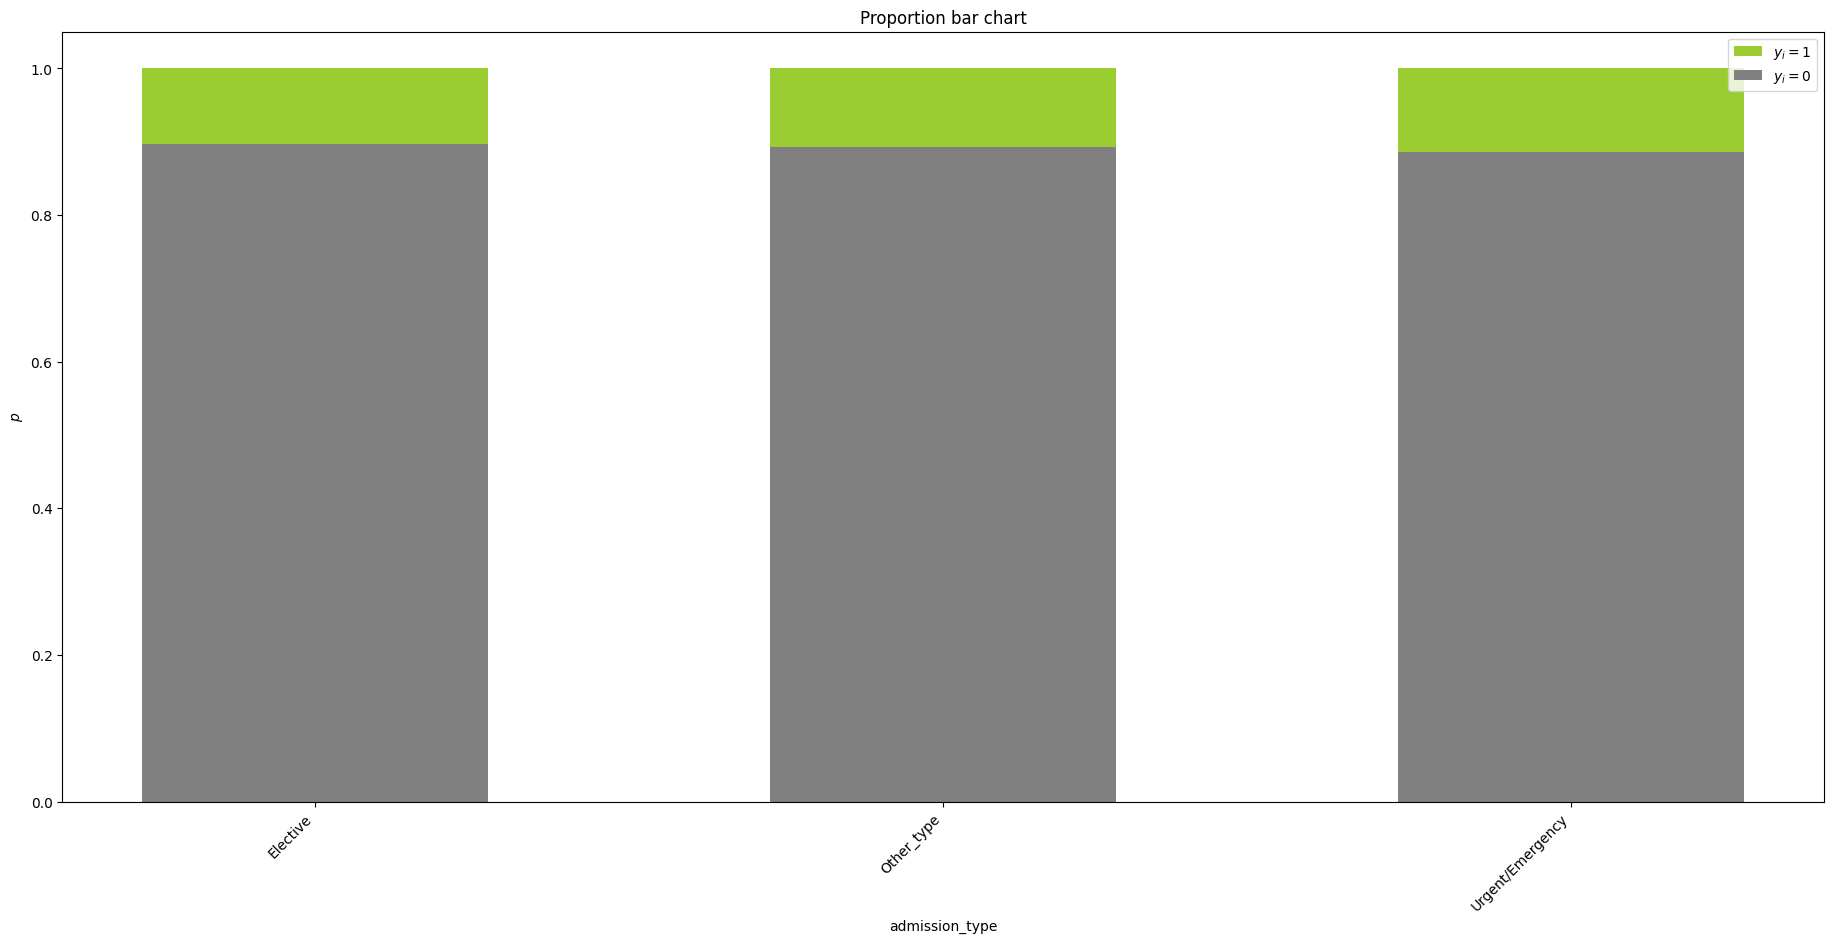

In [111]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

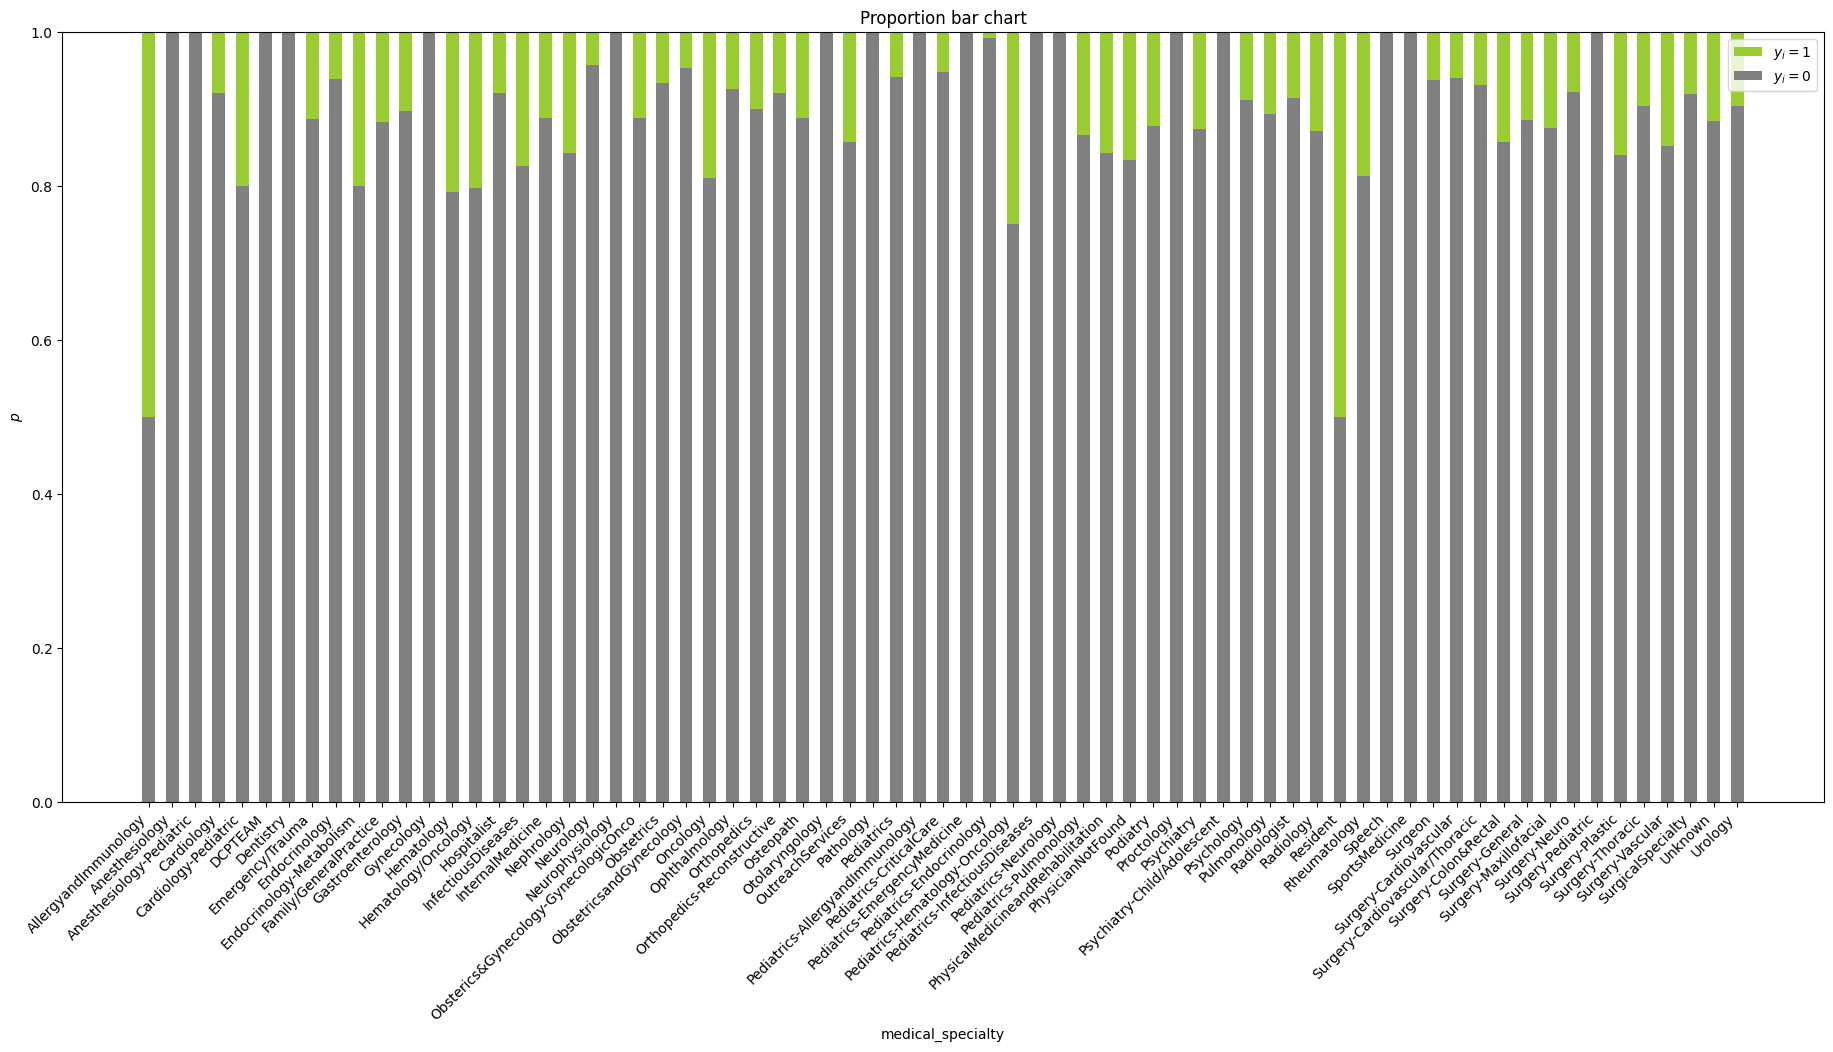

In [112]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

In [113]:
surgery = train[train['medical_specialty'].str.contains('Surgery|Surgeon|Reconstructive')]
train.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = train[train['medical_specialty'].str.contains('Pediatrics|Pediatric')]
train.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.490230
InternalMedicine                        0.144478
Emergency/Trauma                        0.074667
Family/GeneralPractice                  0.073235
Surgery                                 0.061556
Cardiology                              0.052165
Nephrology                              0.015947
Orthopedics                             0.013392
Radiologist                             0.011469
Pulmonology                             0.008577
Psychiatry                              0.008395
Urology                                 0.006710
ObstetricsandGynecology                 0.006570
Pediatric                               0.005784
Gastroenterology                        0.005573
PhysicalMedicineandRehabilitation       0.003931
Oncology                                0.003411
Hematology/Oncology                     0.002148
Neurology                               0.001937
Otolaryngology                          0.001207
En

In [114]:
surgery = test[test['medical_specialty'].str.contains('Surgery|Surgeon|Reconstructive')]
test.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = test[test['medical_specialty'].str.contains('Pediatrics|Pediatric')]
test.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

test['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.492204
InternalMedicine                        0.142254
Emergency/Trauma                        0.073567
Family/GeneralPractice                  0.072814
Surgery                                 0.063020
Cardiology                              0.053587
Nephrology                              0.015624
Orthopedics                             0.014609
Radiologist                             0.010580
Pulmonology                             0.008516
Psychiatry                              0.008385
Urology                                 0.006780
ObstetricsandGynecology                 0.006649
Gastroenterology                        0.005470
Pediatric                               0.005241
PhysicalMedicineandRehabilitation       0.003636
Oncology                                0.003439
Neurology                               0.002129
Hematology/Oncology                     0.001769
Endocrinology                           0.001277
Ot

In [115]:
value_counts = train['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index

# We dont think making predictions or assumptions on the Unknowns here makes sense (we can recap this)
train['medical_specialty'] = train['medical_specialty'].replace('Unknown', 'Other_specialty')
train['medical_specialty'] = train['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')
train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Other_specialty           0.593899
InternalMedicine          0.144478
Emergency/Trauma          0.074667
Family/GeneralPractice    0.073235
Surgery                   0.061556
Cardiology                0.052165
Name: proportion, dtype: float64

In [118]:
value_counts = test['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index

# We don't think making predictions or assumptions on the Unknowns here makes sense (we can recap this)
test['medical_specialty'] = test['medical_specialty'].replace('Unknown', 'Other_specialty')
test['medical_specialty'] = test['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')
test['medical_specialty'].value_counts(normalize=True)

medical_specialty
Other_specialty           0.594759
InternalMedicine          0.142254
Emergency/Trauma          0.073567
Family/GeneralPractice    0.072814
Surgery                   0.063020
Cardiology                0.053587
Name: proportion, dtype: float64

In [119]:
train['medical_specialty'] = train['medical_specialty'].str.strip().str.replace('/', '_')

In [120]:
test['medical_specialty'] = test['medical_specialty'].str.strip().str.replace('/', '_')

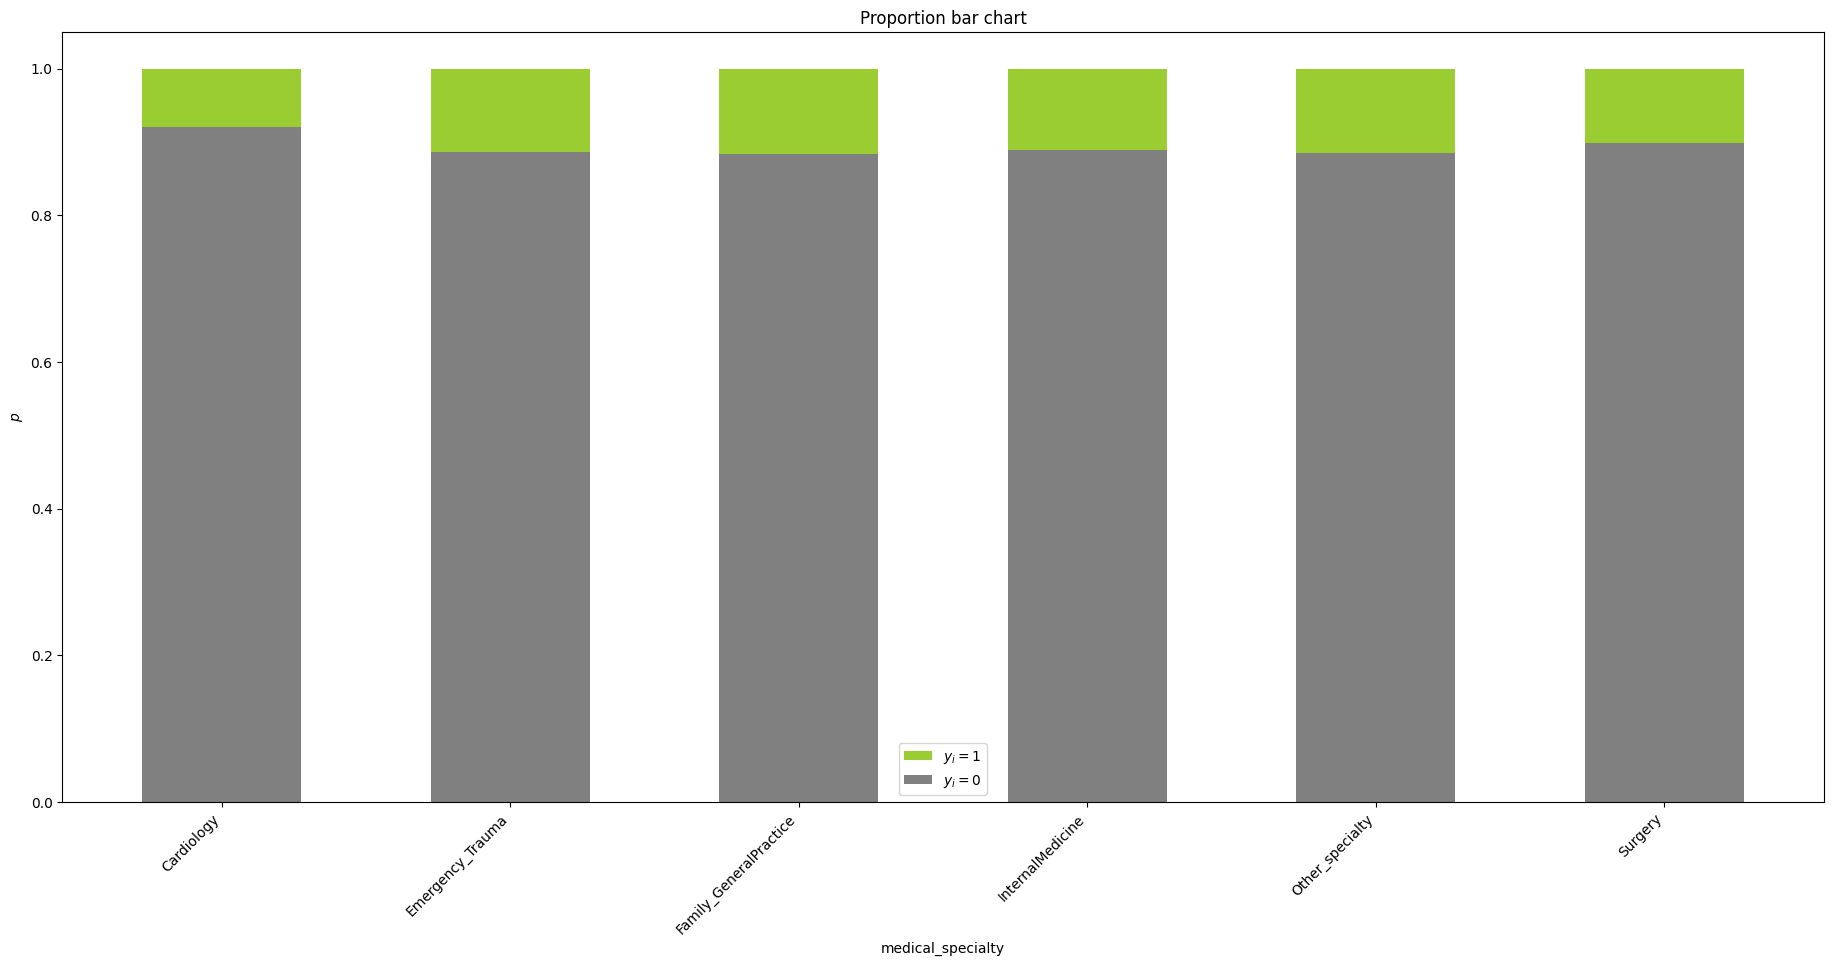

In [121]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

In [122]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                                                                           0.593183
Discharged/transferred to SNF                                                                                0.137290
Discharged/transferred to home with home health service                                                      0.126411
Unknown                                                                                                      0.036358
Discharged/transferred to another short term hospital                                                        0.020888
Discharged/transferred to another rehab fac including rehab units of a hospital .                            0.019555
Expired                                                                                                      0.015933
Discharged/transferred to another type of inpatient care institution                                         0.011539
Not Mapped                        

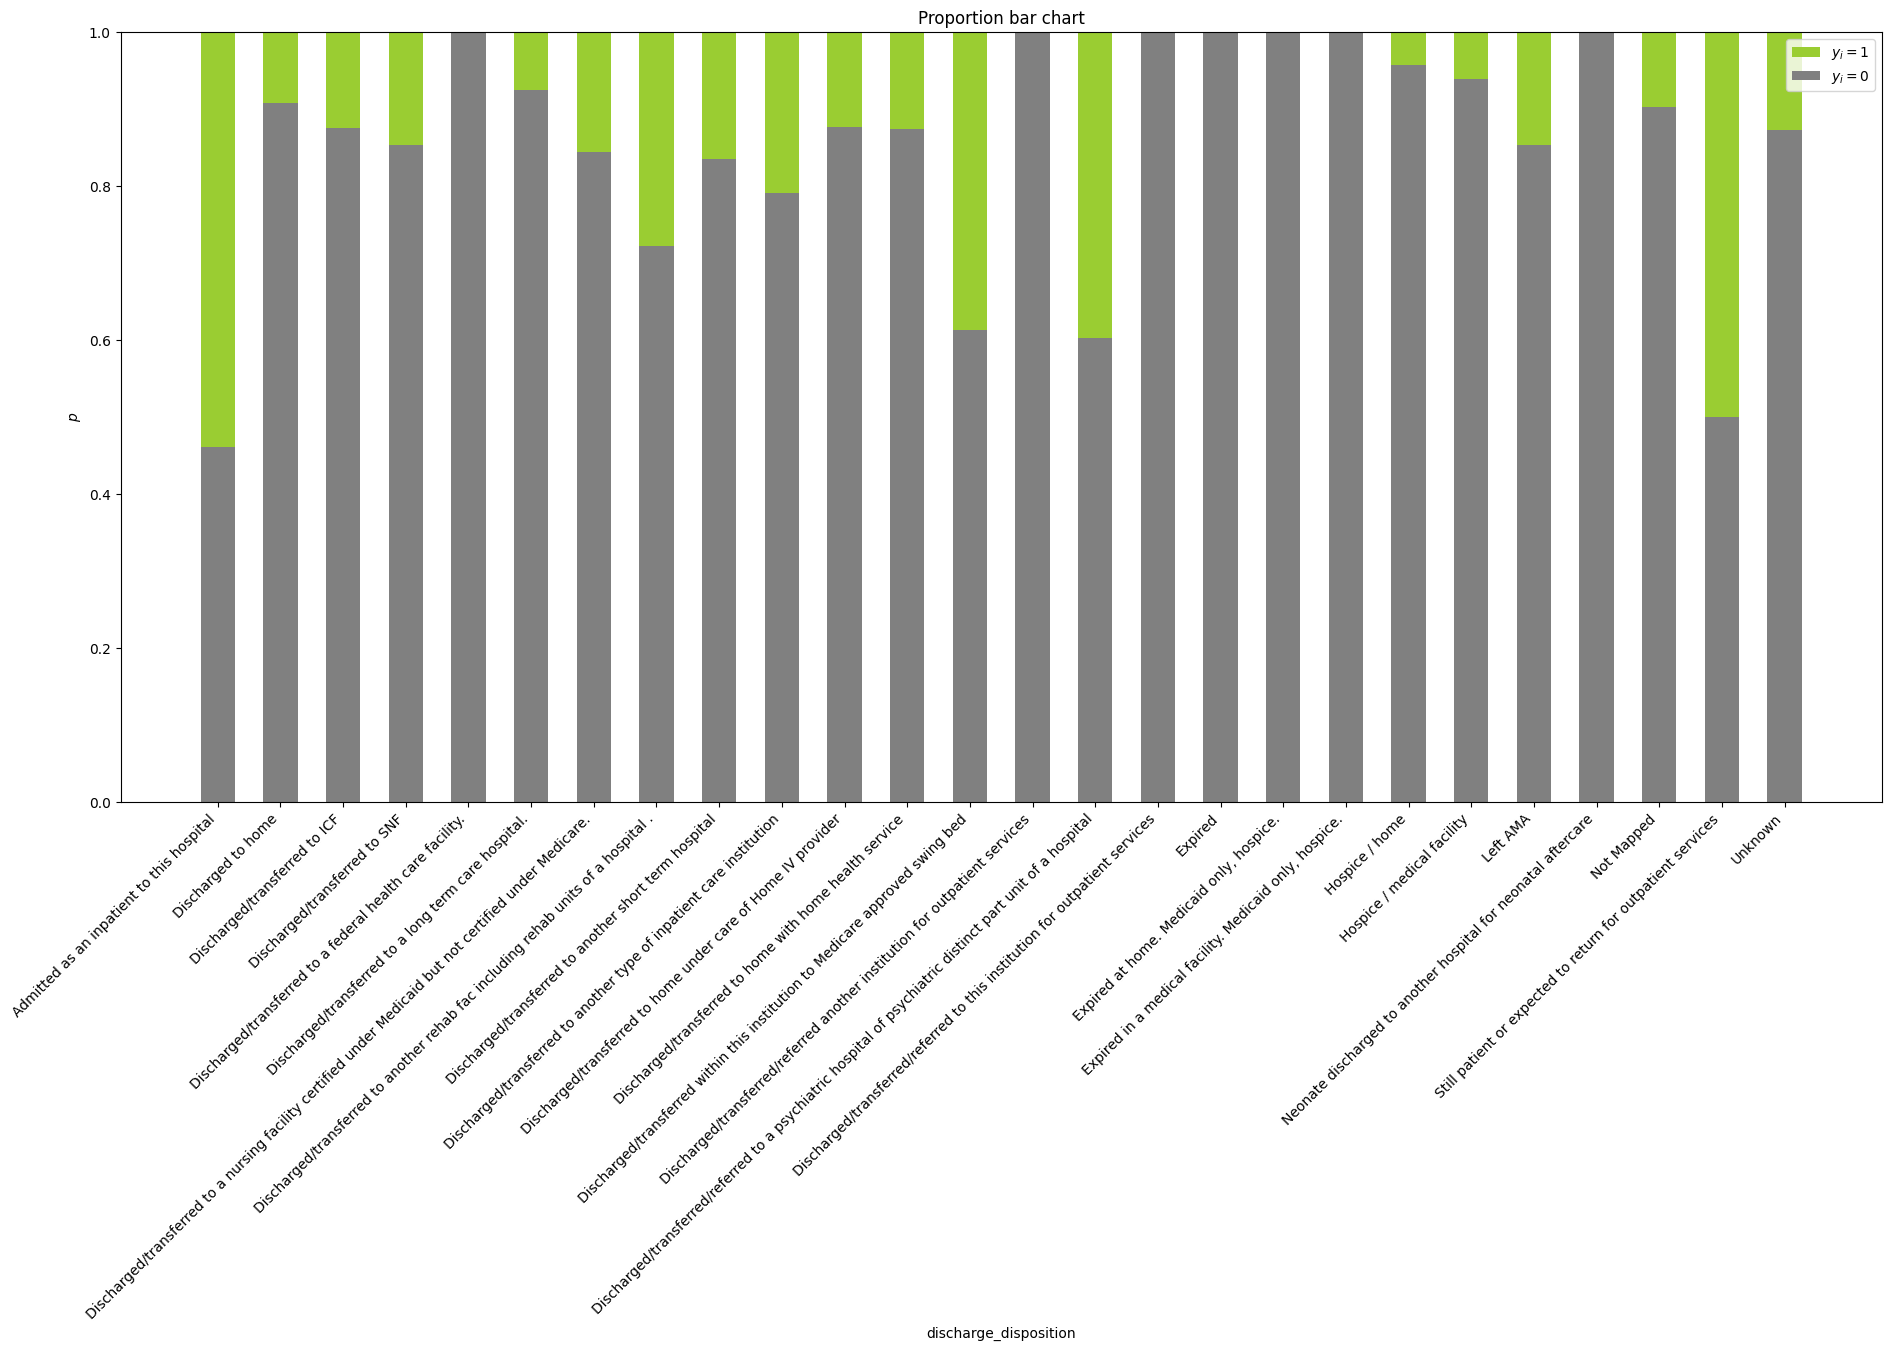

In [123]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [124]:
expired = train[train['discharge_disposition'].str.contains('Expired')]
train.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = train[train['discharge_disposition'].str.contains('Hospice')]
train.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to a long term care hospital', 'Discharged/transferred to a federal health care facility','Neonate discharged to another hospital for neonatal aftercare']
train['discharge_disposition'] = train['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

outpatient = ['Discharged/transferred/referred to this institution for outpatient services','Discharged/transferred/referred another institution for outpatient services']
train['discharge_disposition'] = train['discharge_disposition'].replace(outpatient, 'Discharged_transferred_referred_another_this_institution_for_outpatient_services')

home = train[train['discharge_disposition'].str.contains('home')]
train.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred to another rehab fac including rehab units of a hospital','Discharged/transferred to ICF','Hospice',
         'Left AMA','Discharged/transferred to a long term care hospital.','Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
         'Discharged/transferred within this institution to Medicare approved swing bed','Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
         'Discharged/transferred/referred another/this institution for outpatient services',
         'Discharged/transferred to a federal health care facility.','Discharged/transferred to another rehab fac including rehab units of a hospital .','Unknown',
         'Admitted as an inpatient to this hospital', 'Still patient or expected to return for outpatient services',
        'Discharged_transferred_referred_another_this_institution_for_outpatient_services']

train['discharge_disposition'] = train['discharge_disposition'].replace(other, 'Other')

train['discharge_disposition'] = train['discharge_disposition'].replace('Not Mapped', 'Unknown')

train['discharge_disposition'] = train['discharge_disposition'].replace('Unknown', 'Discharged_to_home')

train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged_to_home                         0.730263
Transferred_to_another_medical_facility    0.169746
Other                                      0.083960
Expired                                    0.016031
Name: proportion, dtype: float64

In [125]:
expired = test[test['discharge_disposition'].str.contains('Expired')]
test.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = test[test['discharge_disposition'].str.contains('Hospice')]
test.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to a long term care hospital', 'Discharged/transferred to a federal health care facility','Neonate discharged to another hospital for neonatal aftercare']
test['discharge_disposition'] = test['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

outpatient = ['Discharged/transferred/referred to this institution for outpatient services','Discharged/transferred/referred another institution for outpatient services']
test['discharge_disposition'] = test['discharge_disposition'].replace(outpatient, 'Discharged_transferred_referred_another_this_institution_for_outpatient_services')

home = test[test['discharge_disposition'].str.contains('home')]
test.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred to another rehab fac including rehab units of a hospital','Discharged/transferred to ICF','Hospice',
         'Left AMA','Discharged/transferred to a long term care hospital.','Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
         'Discharged/transferred within this institution to Medicare approved swing bed','Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
         'Discharged/transferred/referred another/this institution for outpatient services',
         'Discharged/transferred to a federal health care facility.','Discharged/transferred to another rehab fac including rehab units of a hospital .','Unknown',
         'Admitted as an inpatient to this hospital', 'Still patient or expected to return for outpatient services',
         'Discharged_transferred_referred_another_this_institution_for_outpatient_services']

test['discharge_disposition'] = test['discharge_disposition'].replace(other, 'Other')

test['discharge_disposition'] = test['discharge_disposition'].replace('Not Mapped', 'Unknown')

test['discharge_disposition'] = test['discharge_disposition'].replace('Unknown', 'Discharged_to_home')

test['discharge_disposition'].value_counts(normalize=True)


discharge_disposition
Discharged_to_home                         0.727547
Transferred_to_another_medical_facility    0.169669
Other                                      0.086079
Expired                                    0.016705
Name: proportion, dtype: float64

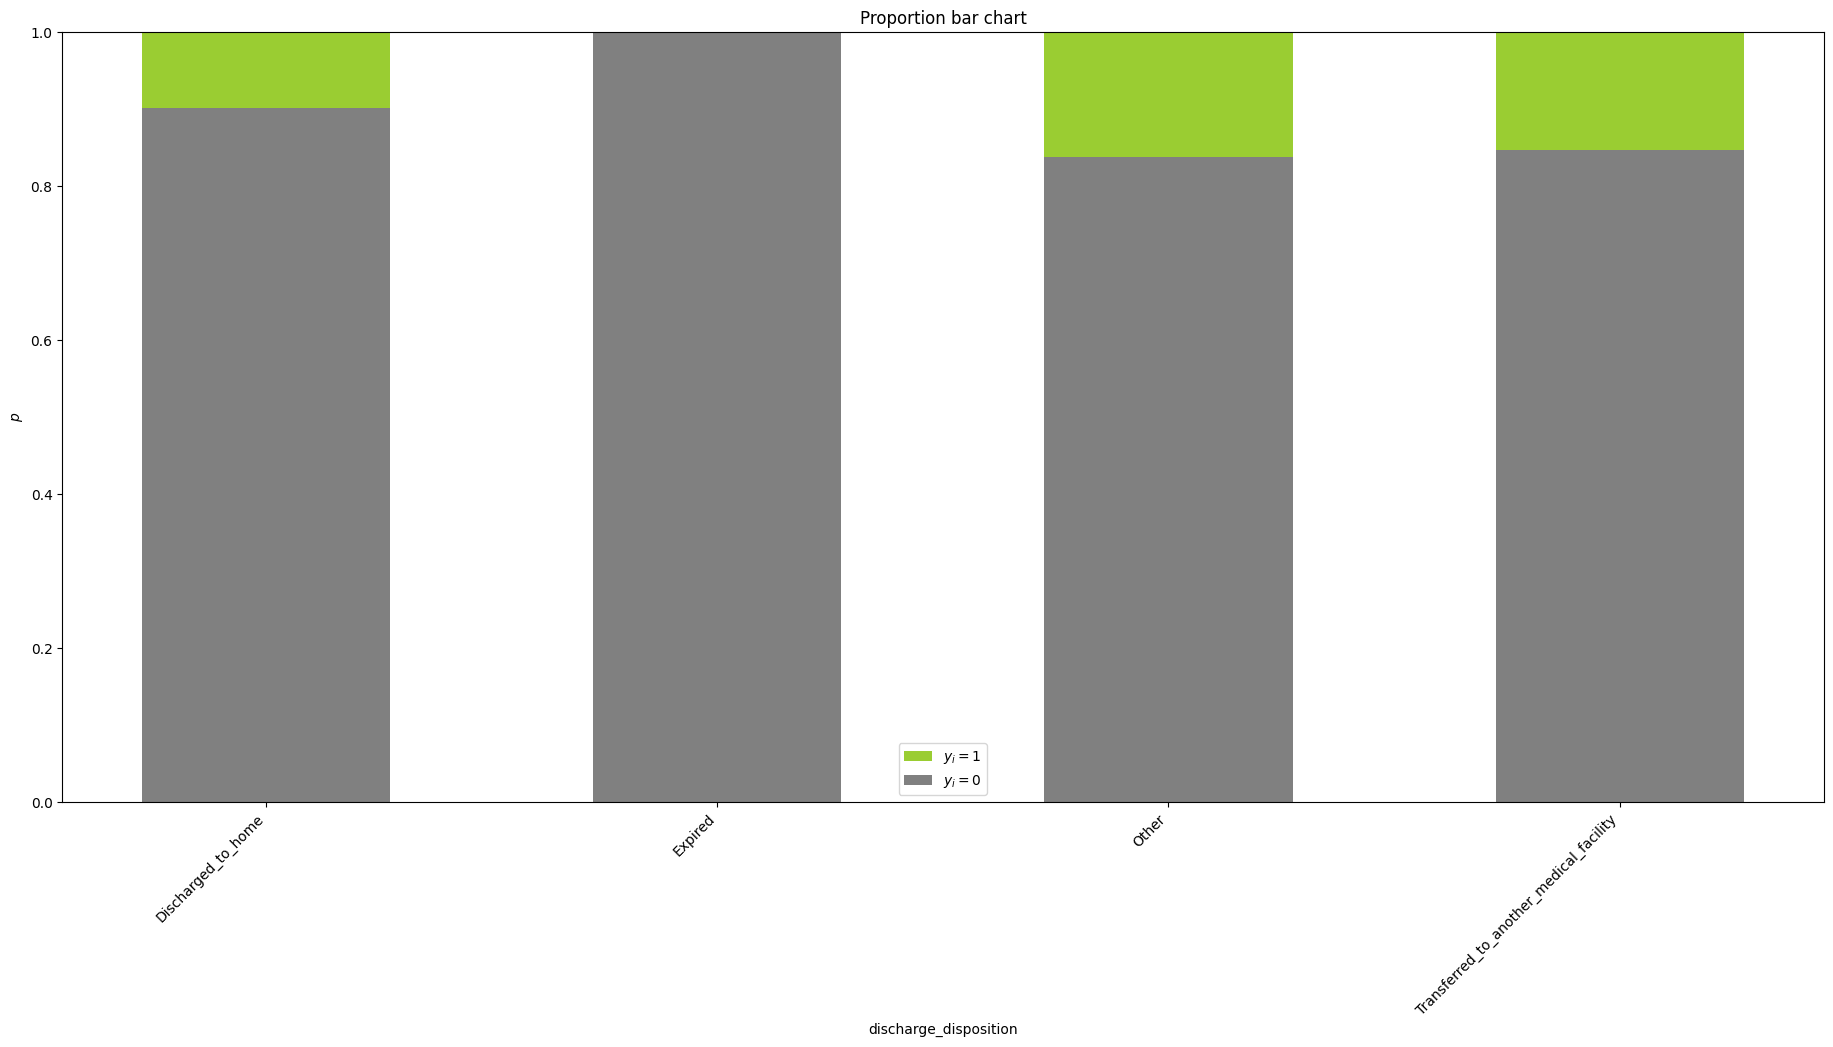

In [126]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [127]:
unknown = [' Not Mapped',' Not Available']
train['admission_source'] = train['admission_source'].replace(unknown, 'Unknown')
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.565992
 Physician Referral                                           0.290275
Unknown                                                       0.068968
Transfer from a hospital                                      0.031304
 Transfer from another health care facility                   0.021927
Clinic Referral                                               0.010935
 Transfer from a Skilled Nursing Facility (SNF)               0.008353
HMO Referral                                                  0.001811
 Court/Law Enforcement                                        0.000154
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000112
 Transfer from critial access hospital                        0.000098
 Transfer from Ambulatory Surgery Center                      0.000028
 Extramural Birth                                             0.000014
Normal Delivery                                             

In [128]:
unknown = [' Not Mapped',' Not Available']
test['admission_source'] = test['admission_source'].replace(unknown, 'Unknown')
test['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.562561
 Physician Referral                                           0.291091
Unknown                                                       0.070554
Transfer from a hospital                                      0.031346
 Transfer from another health care facility                   0.022994
Clinic Referral                                               0.010645
 Transfer from a Skilled Nursing Facility (SNF)               0.008516
HMO Referral                                                  0.001900
 Court/Law Enforcement                                        0.000164
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000131
Normal Delivery                                               0.000033
 Transfer from critial access hospital                        0.000033
 Extramural Birth                                             0.000033
Name: proportion, dtype: float64

In [129]:
train['admission_source'].unique()

array([' Emergency Room', 'Clinic Referral', 'Unknown',
       ' Transfer from another health care facility',
       ' Physician Referral', 'Transfer from a hospital', 'HMO Referral',
       ' Transfer from a Skilled Nursing Facility (SNF)',
       ' Court/Law Enforcement',
       ' Transfer from hospital inpt/same fac reslt in a sep claim',
       ' Transfer from critial access hospital', ' Extramural Birth',
       'Normal Delivery', ' Transfer from Ambulatory Surgery Center',
       ' Sick Baby'], dtype=object)

In [130]:
train['admission_source'] = train['admission_source'].str.strip().str.replace(' ', '_')

In [131]:
test['admission_source'] = test['admission_source'].str.strip().str.replace(' ', '_')

In [132]:
train['admission_source'].unique()

array(['Emergency_Room', 'Clinic_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility', 'Physician_Referral',
       'Transfer_from_a_hospital', 'HMO_Referral',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)',
       'Court/Law_Enforcement',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Transfer_from_critial_access_hospital', 'Extramural_Birth',
       'Normal_Delivery', 'Transfer_from_Ambulatory_Surgery_Center',
       'Sick_Baby'], dtype=object)

In [133]:
test['admission_source'].unique()

array(['Emergency_Room', 'Physician_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility',
       'Transfer_from_a_hospital',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)',
       'Clinic_Referral', 'Court/Law_Enforcement', 'HMO_Referral',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Normal_Delivery', 'Transfer_from_critial_access_hospital',
       'Extramural_Birth'], dtype=object)

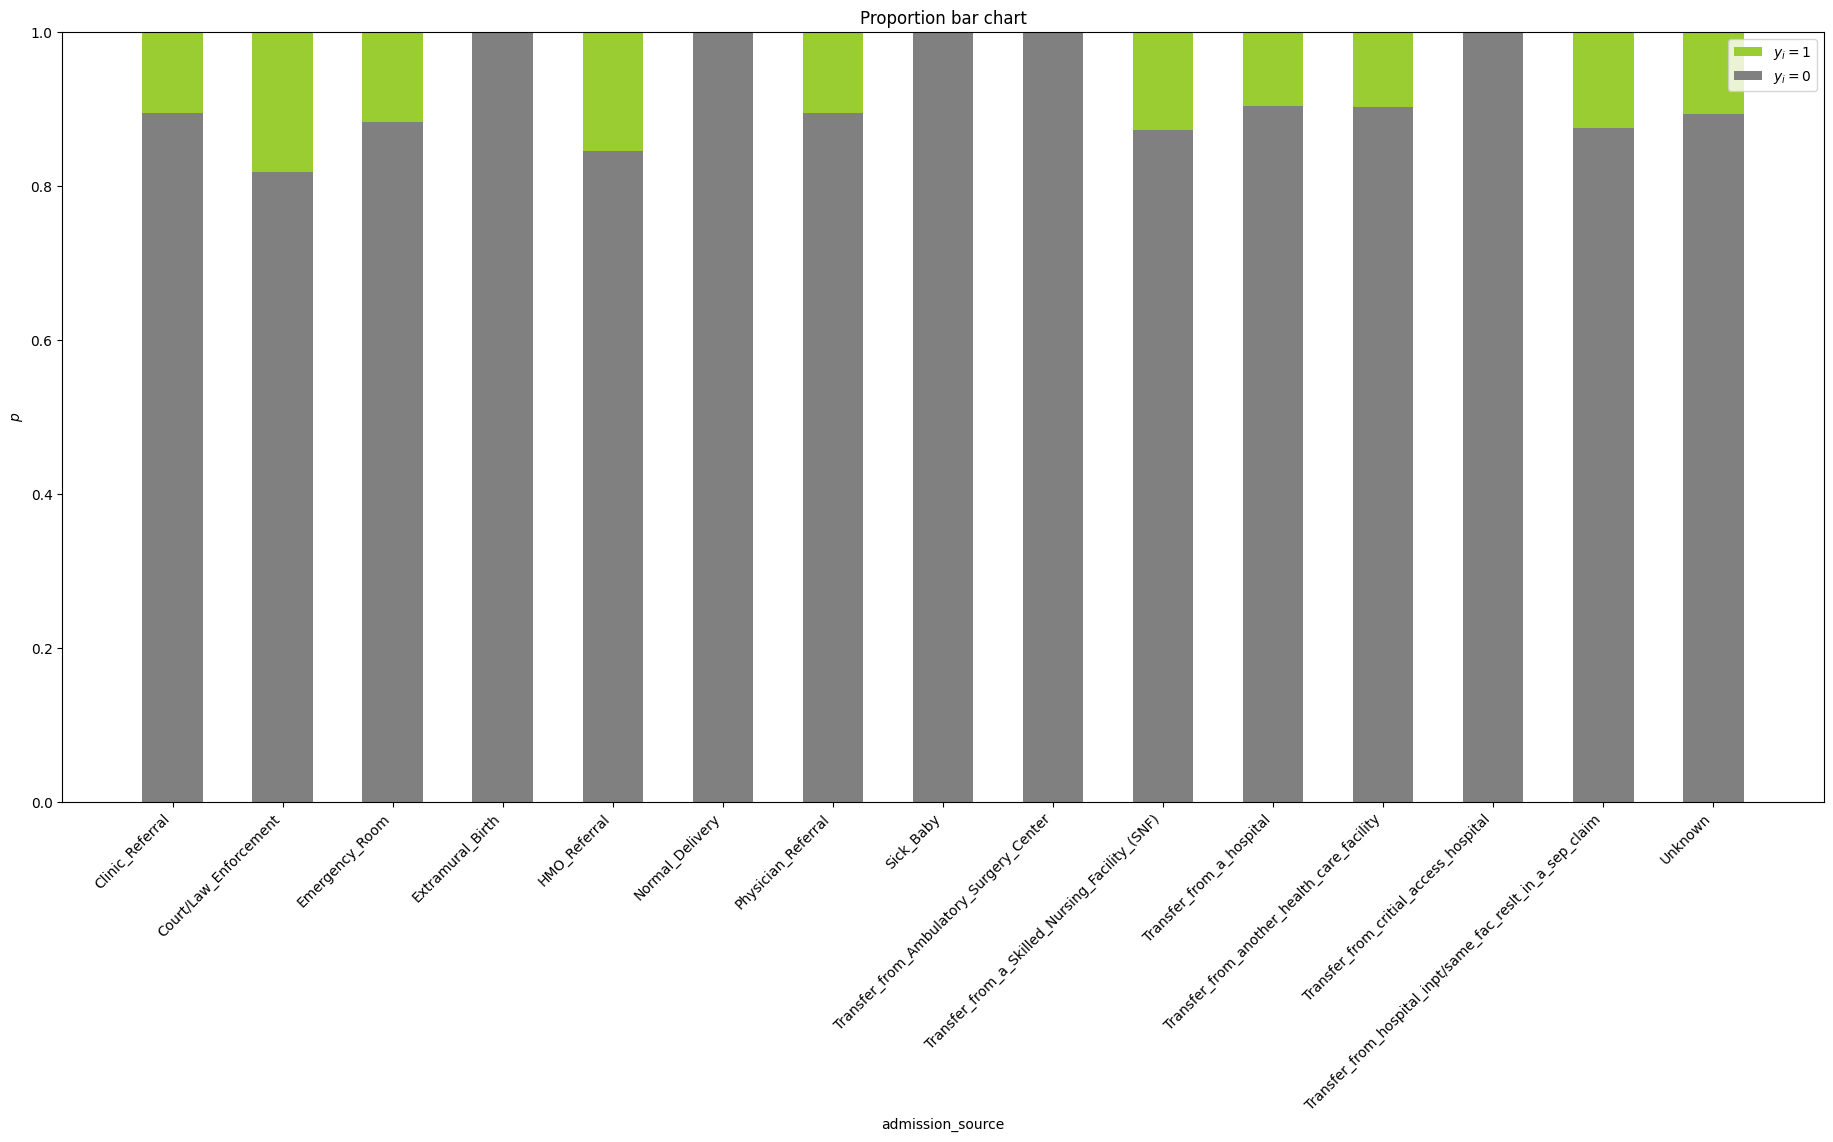

In [134]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [135]:
train['admission_source'] = train['admission_source'].replace('Physician_Referral', 'Referral')
train['admission_source'] = train['admission_source'].replace('Clinic_Referral', 'Referral')
train['admission_source'] = train['admission_source'].replace('HMO_Referral', 'Referral')

In [136]:
test['admission_source'] = test['admission_source'].replace('Physician_Referral', 'Referral')
test['admission_source'] = test['admission_source'].replace('Clinic_Referral', 'Referral')
test['admission_source'] = test['admission_source'].replace('HMO_Referral', 'Referral')

In [137]:
value_counts = train['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

train['admission_source'] = train['admission_source'].replace(replace_admission_source, 'Other_source')
# Unknown provavelmente é os casos onde nao vem de lado nenhum
train['admission_source'] = train['admission_source'].replace('Unknown', 'No_source')
train['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room    0.565992
Referral          0.303021
No_source         0.068968
Other_source      0.062019
Name: proportion, dtype: float64

In [138]:
value_counts = test['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

test['admission_source'] = test['admission_source'].replace(replace_admission_source, 'Other_source')
# 'Unknown' probably represents cases where there is no source
test['admission_source'] = test['admission_source'].replace('Unknown', 'No_source')
test['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room    0.562561
Referral          0.303636
No_source         0.070554
Other_source      0.063249
Name: proportion, dtype: float64

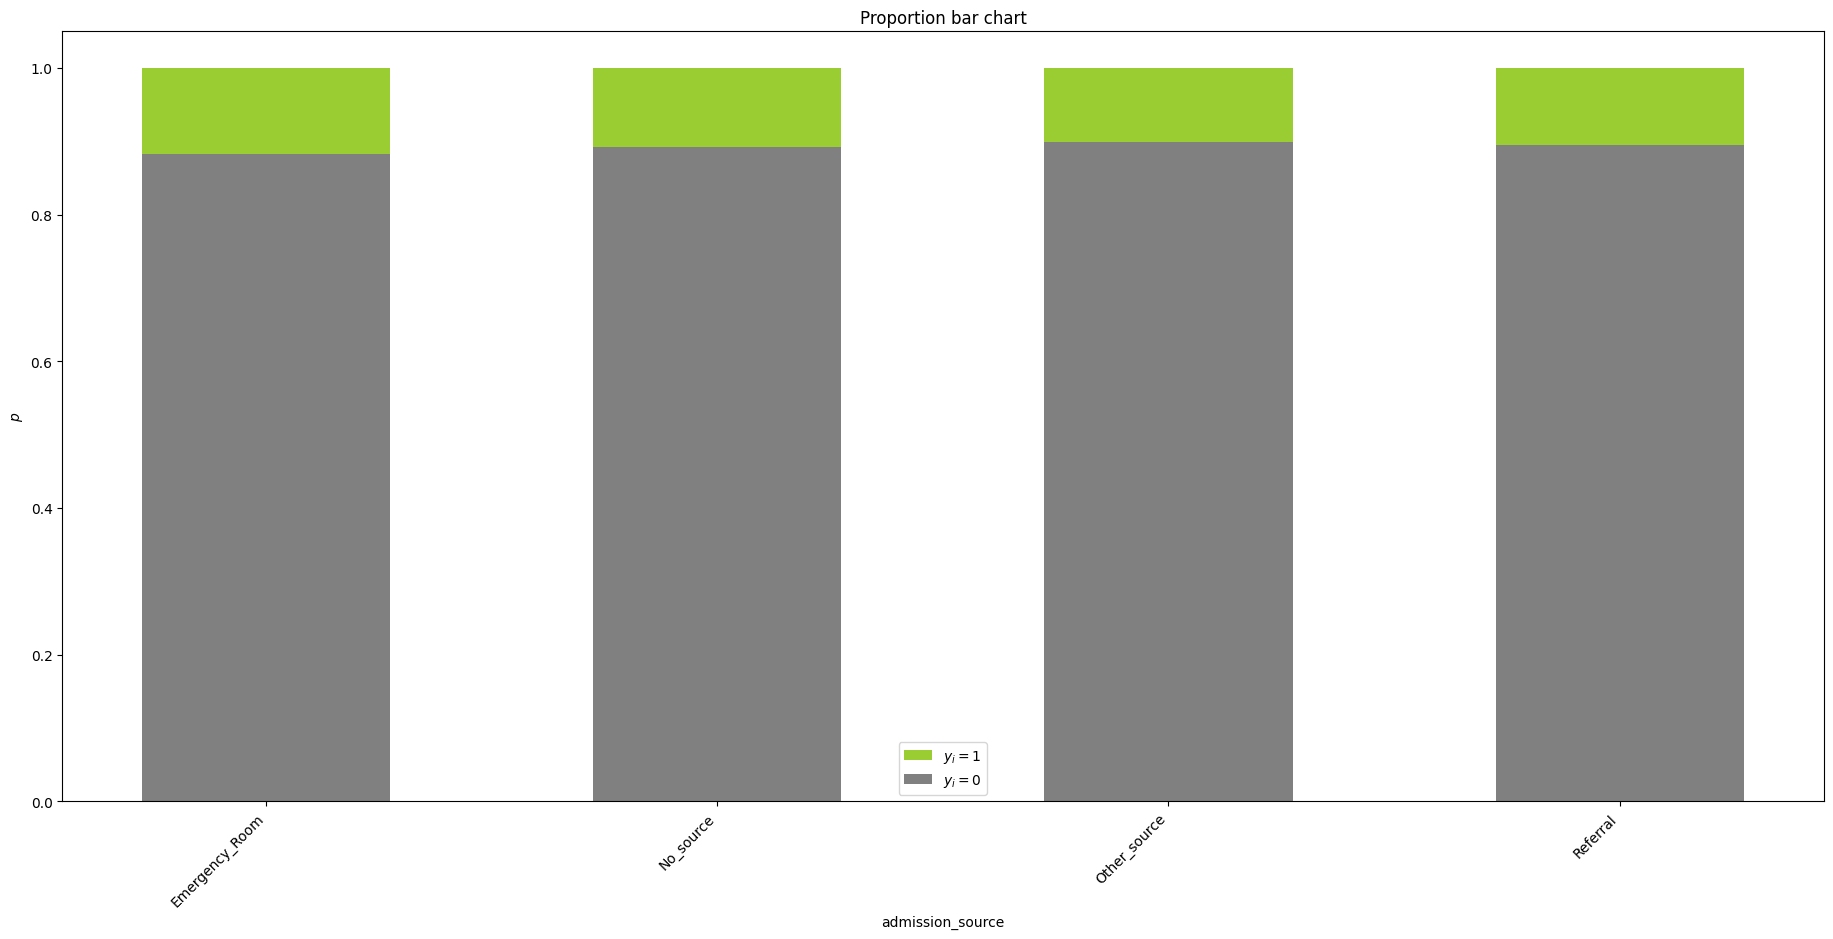

In [139]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [140]:
train[['admission_type', 'admission_source']]

,admission_type,admission_source
encounter_id,,
533253,Urgent/Emergency,Emergency_Room
426224,Urgent/Emergency,Referral
634063,Other_type,No_source
890610,Urgent/Emergency,Other_source
654194,Elective,Referral
...,...,...
660160,Elective,Referral
826429,Urgent/Emergency,Referral
332030,Other_type,No_source


In [141]:
def diagosis_types_division(x):
    try:
        x_float = float(x)
        x_int = int(x_float)
        if x_int <= 459 and x_int >= 390 or x_int == 785:
            return 'Circulatory'
        elif x_int <= 519 and x_int >= 460 or x_int == 786:
            return 'Respiratory'
        elif x_int <= 579 and x_int >= 520 or x_int == 787:
            return 'Digestive'
        elif x_float < 251 and x_float >= 250:
            return 'Diabetes'
        elif x_int <= 999 and x_int >= 800:
            return 'Injury'
        elif x_int <= 739 and x_int >= 710:
            return 'Musculoskeletal'
        elif x_int <= 629 and x_int >= 580 or x_int == 788:
            return 'Genitourinary'
        elif x_int <= 239 and x_int >= 140:
            return 'Neoplasms'
        # Codes for 'Other' categories
        elif (x_int <= 799 and x_int >= 790) or x_int in {780, 781, 784}:
            return 'Other'
        elif (x_int <= 249 and x_int >= 240) or (x_int <= 279 and x_int >= 251):
            return 'Other'
        elif x_int <= 709 and x_int >= 680:
            return 'Other'
        elif x_int <= 999 and x_int >= 290:
            return 'Other'
        # If the code doesn't match any category, return 'Other'
        else:
            return 'Other'
    except:
        return 'Other'
    
train['primary_diagnosis_types'] = train['primary_diagnosis'].apply(diagosis_types_division)
train['secondary_diagnosis_types'] = train['secondary_diagnosis'].apply(diagosis_types_division)
train['additional_diagnosis_types'] = train['additional_diagnosis'].apply(diagosis_types_division)

In [142]:
test['primary_diagnosis_types'] = test['primary_diagnosis'].apply(diagosis_types_division)
test['secondary_diagnosis_types'] = test['secondary_diagnosis'].apply(diagosis_types_division)
test['additional_diagnosis_types'] = test['additional_diagnosis'].apply(diagosis_types_division)

In [143]:
train = train.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1)

In [144]:
test = test.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1)

In [145]:
train['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Circulatory        0.298838
Other              0.178323
Respiratory        0.142302
Digestive          0.093590
Diabetes           0.085687
Injury             0.068519
Genitourinary      0.050382
Musculoskeletal    0.048332
Neoplasms          0.034028
Name: proportion, dtype: float64

In [146]:
test['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Circulatory        0.299672
Other              0.179823
Respiratory        0.140387
Digestive          0.091975
Diabetes           0.086898
Injury             0.068556
Genitourinary      0.050049
Musculoskeletal    0.049591
Neoplasms          0.033049
Name: proportion, dtype: float64

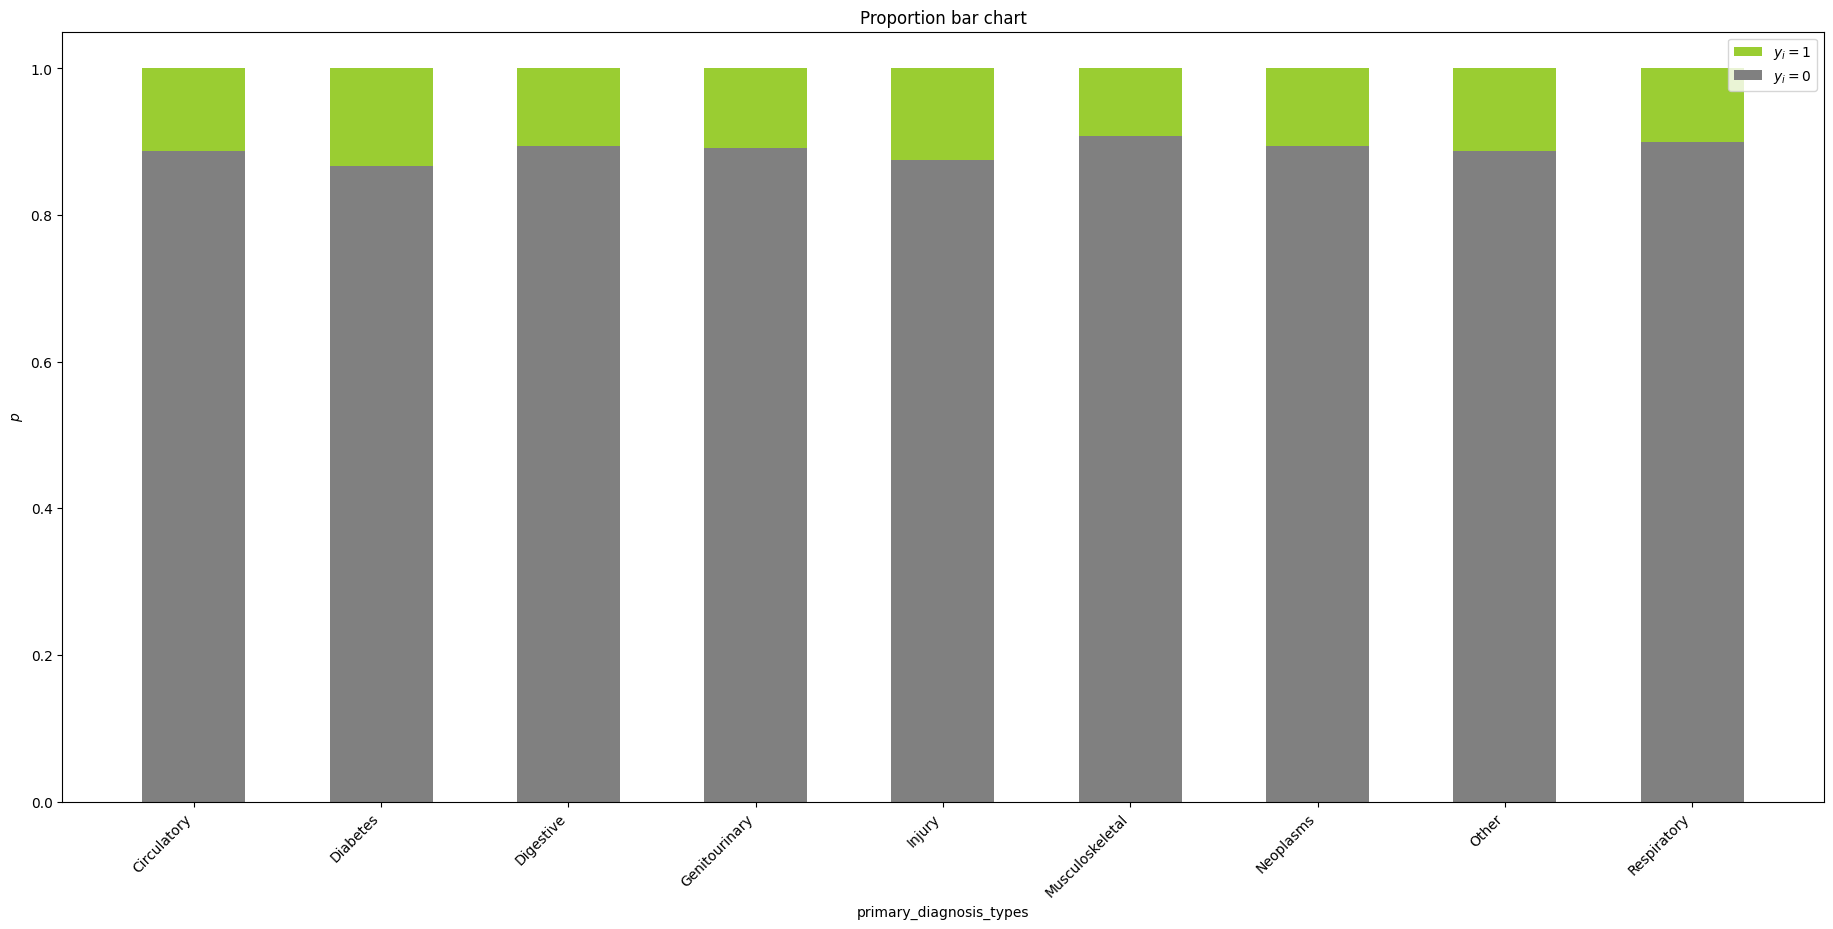

In [147]:
bar_charts_categorical(train, "primary_diagnosis_types", "readmitted_binary")

In [148]:
train['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Circulatory        0.313676
Other              0.264291
Diabetes           0.125470
Respiratory        0.107347
Genitourinary      0.082346
Digestive          0.040668
Neoplasms          0.024777
Injury             0.024187
Musculoskeletal    0.017238
Name: proportion, dtype: float64

In [149]:
test['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Circulatory        0.312349
Other              0.264789
Diabetes           0.126302
Respiratory        0.106387
Genitourinary      0.082214
Digestive          0.041697
Neoplasms          0.025614
Injury             0.023092
Musculoskeletal    0.017557
Name: proportion, dtype: float64

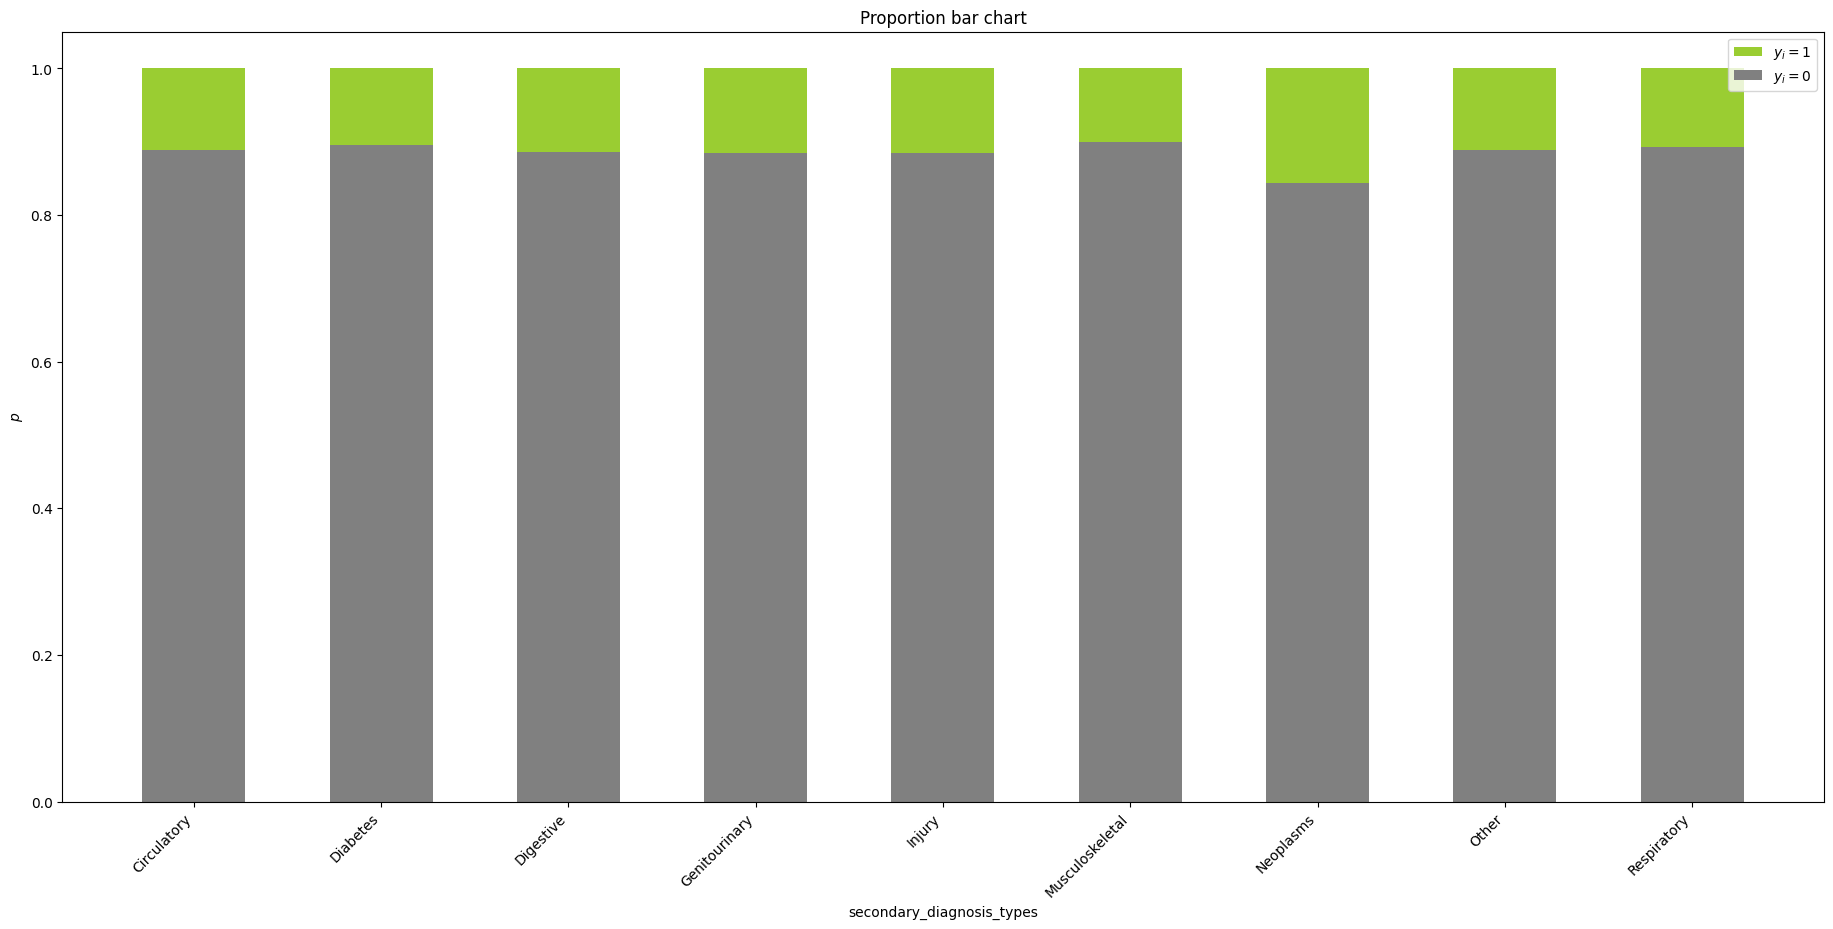

In [150]:
bar_charts_categorical(train, "secondary_diagnosis_types", "readmitted_binary")

In [151]:
train['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Other              0.301294
Circulatory        0.298080
Diabetes           0.167429
Respiratory        0.072014
Genitourinary      0.066104
Digestive          0.038829
Injury             0.019414
Musculoskeletal    0.018628
Neoplasms          0.018207
Name: proportion, dtype: float64

In [152]:
test['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Other              0.299869
Circulatory        0.297150
Diabetes           0.171307
Respiratory        0.072977
Genitourinary      0.064559
Digestive          0.038126
Musculoskeletal    0.019260
Injury             0.018441
Neoplasms          0.018310
Name: proportion, dtype: float64

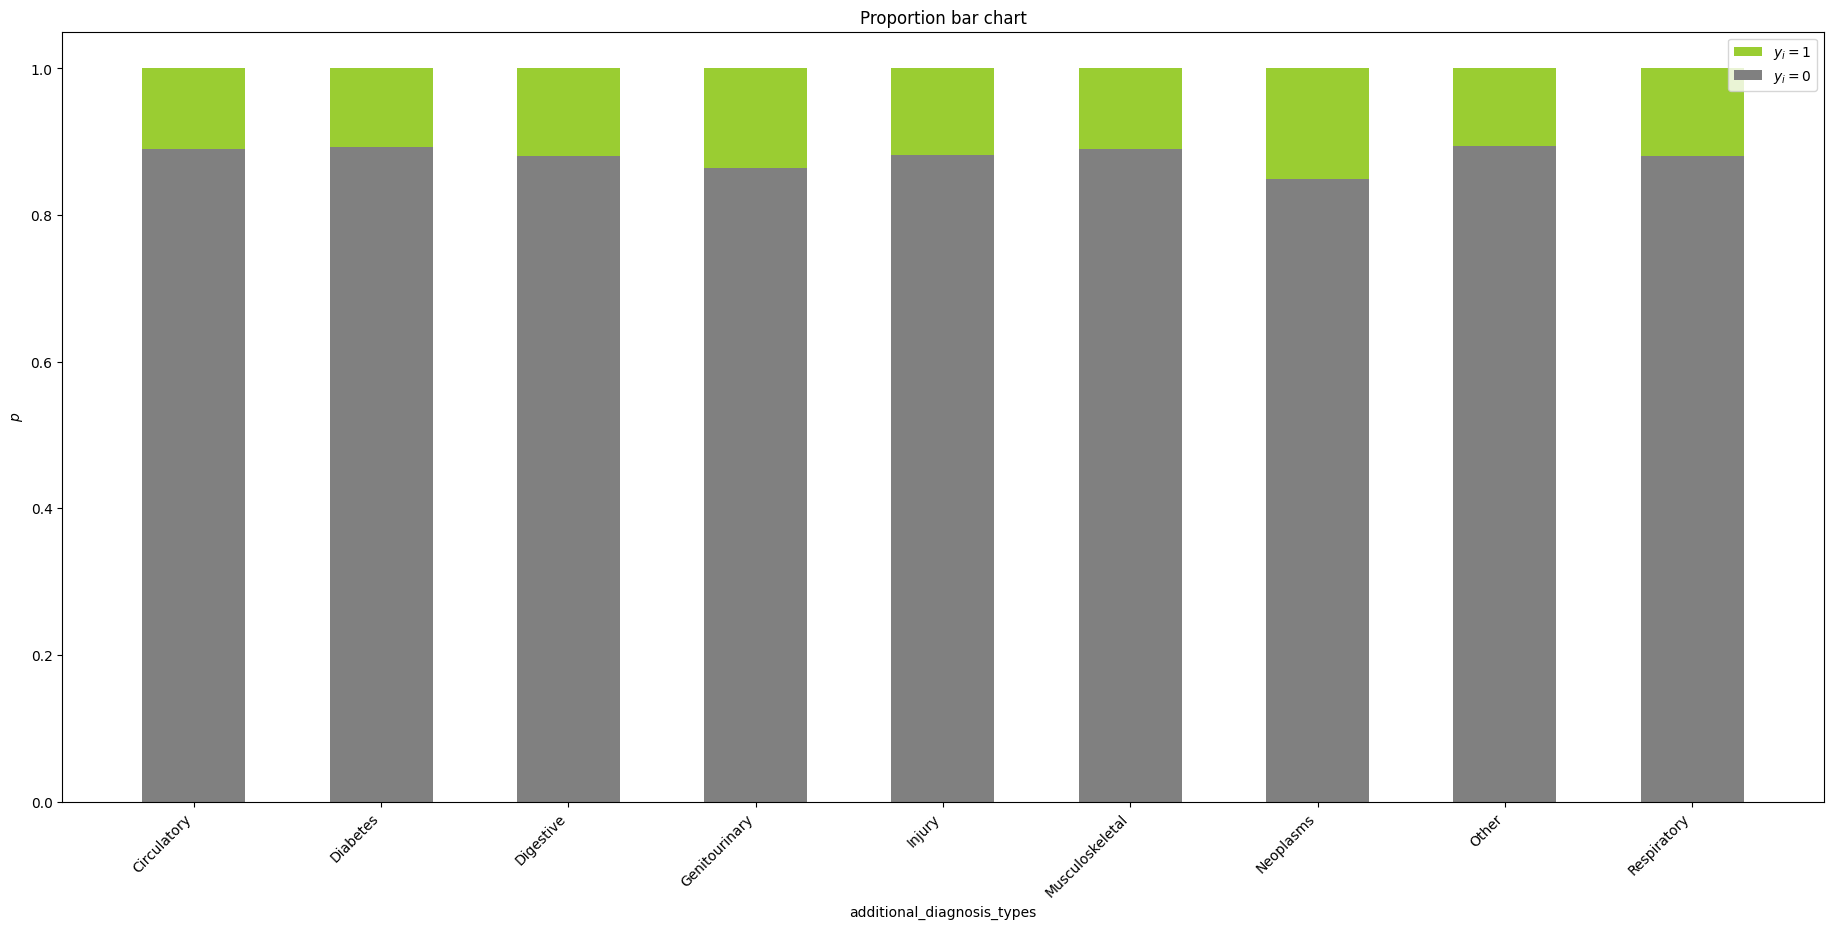

In [153]:
bar_charts_categorical(train, "additional_diagnosis_types", "readmitted_binary")

In [154]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.948228
Norm         0.025352
>200         0.014810
>300         0.011609
Name: proportion, dtype: float64

In [155]:
train['glucose_test_result'] = train['glucose_test_result'].replace('>200', 'High')
train['glucose_test_result'] = train['glucose_test_result'].replace('>300', 'High')

In [156]:
test['glucose_test_result'] = test['glucose_test_result'].replace('>200', 'High')
test['glucose_test_result'] = test['glucose_test_result'].replace('>300', 'High')

In [157]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.948228
High         0.026419
Norm         0.025352
Name: proportion, dtype: float64

In [158]:
test['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.945693
High         0.028398
Norm         0.025909
Name: proportion, dtype: float64

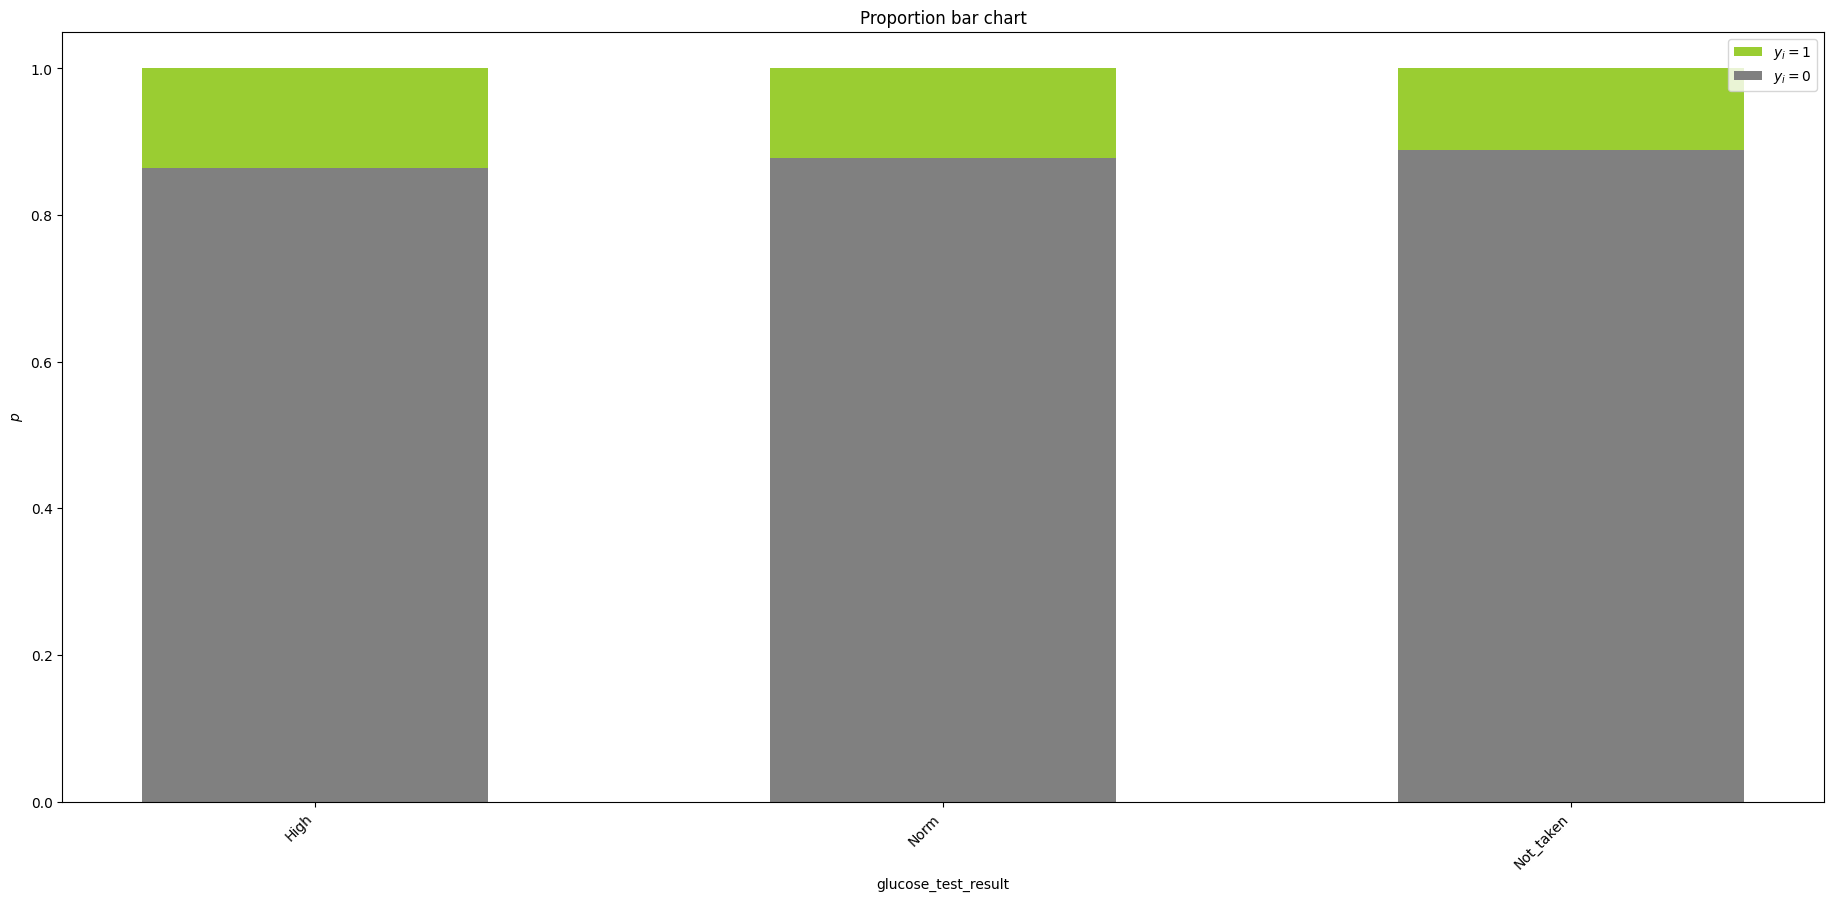

In [159]:
bar_charts_categorical(train, "glucose_test_result", "readmitted_binary")

In [160]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832725
>8           0.080086
Norm         0.049175
>7           0.038014
Name: proportion, dtype: float64

In [161]:
train['a1c_test_result'] = train['a1c_test_result'].replace('>7', 'High')
train['a1c_test_result'] = train['a1c_test_result'].replace('>8', 'High')

In [162]:
test['a1c_test_result'] = test['a1c_test_result'].replace('>7', 'High')
test['a1c_test_result'] = test['a1c_test_result'].replace('>8', 'High')

In [163]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832725
High         0.118100
Norm         0.049175
Name: proportion, dtype: float64

In [164]:
test['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832886
High         0.118408
Norm         0.048706
Name: proportion, dtype: float64

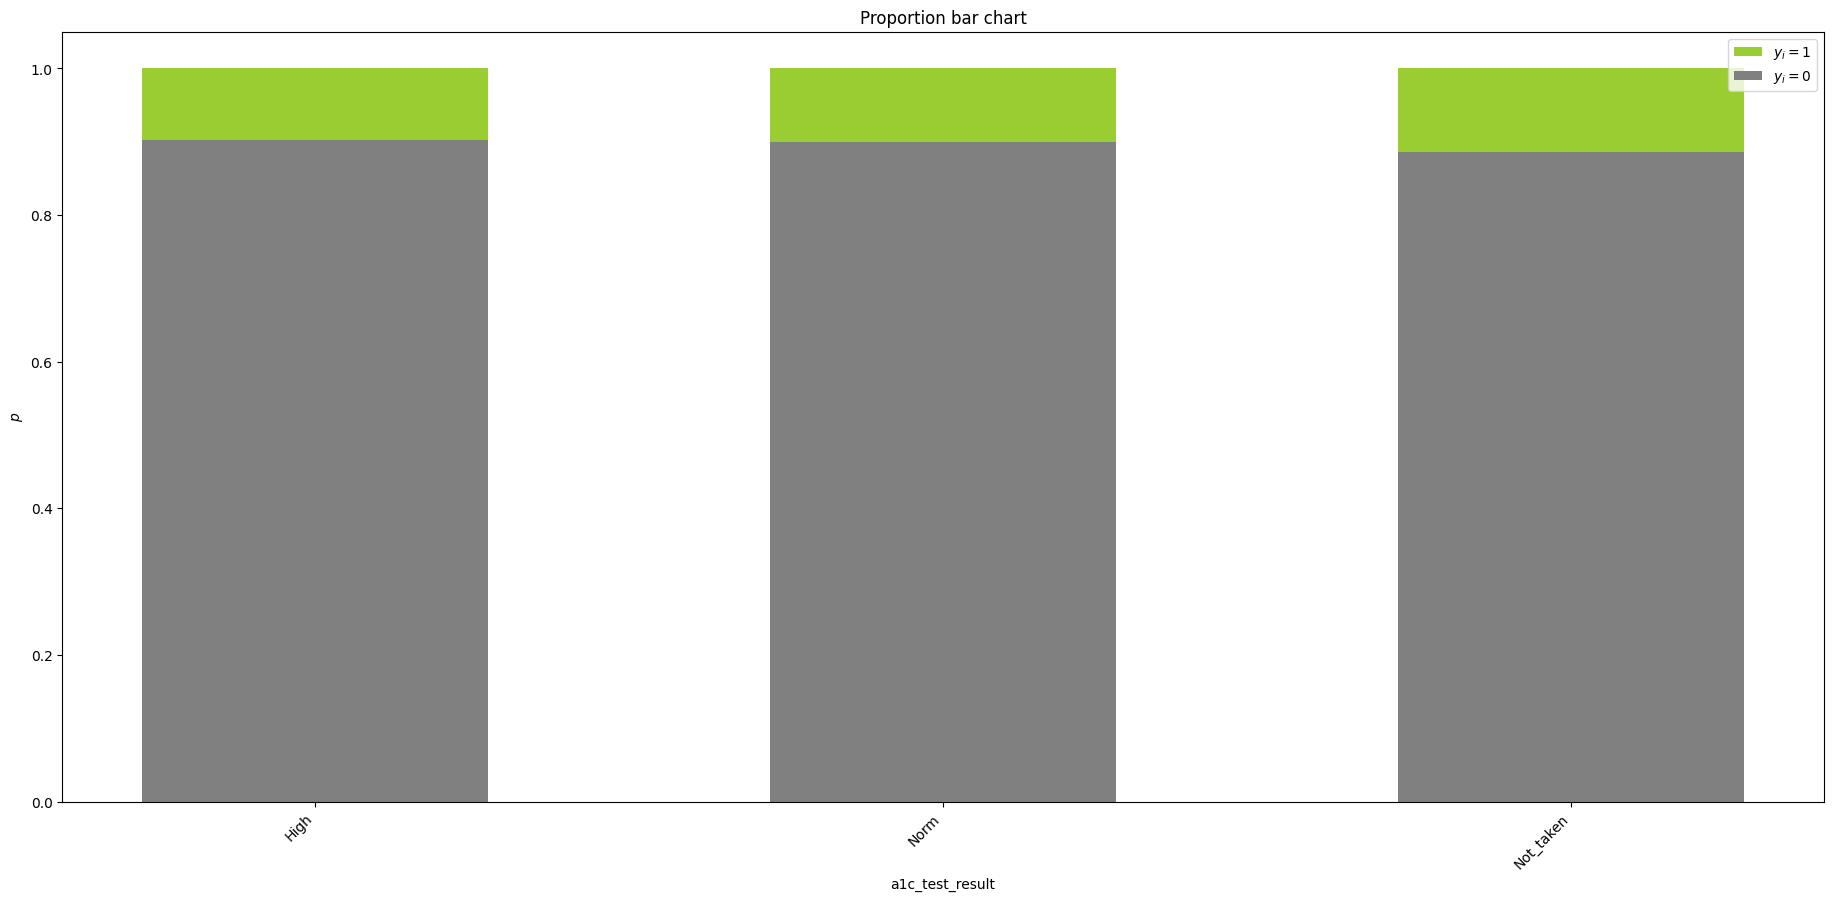

In [165]:
bar_charts_categorical(train, "a1c_test_result", "readmitted_binary")

In [166]:
train['Midpoint_Age'] = train['Midpoint_Age'].replace('Unknown', np.nan)

In [167]:
test['Midpoint_Age'] = test['Midpoint_Age'].replace('Unknown', np.nan)

In [168]:
train['Midpoint_Age'].isna().sum()

2217

In [169]:
test['Midpoint_Age'].isna().sum()

1194

In [170]:
def label_pulse(row):
    if row['Midpoint_Age']==5.0:
        if row['average_pulse_bpm'] >= 70 and row['average_pulse_bpm'] <= 130:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']<= 45.0 and row['Midpoint_Age'] >= 25.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 110:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']==55.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']>=65.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 95:
            return 1
        else:
            return 0
    else:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0

train['is_normal_pulse'] = train.apply(lambda row: label_pulse(row), axis=1)

In [171]:
test['is_normal_pulse'] = test.apply(lambda row: label_pulse(row), axis=1)

In [172]:
train['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.512283
1    0.487717
Name: proportion, dtype: float64

In [173]:
test['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.511595
1    0.488405
Name: proportion, dtype: float64

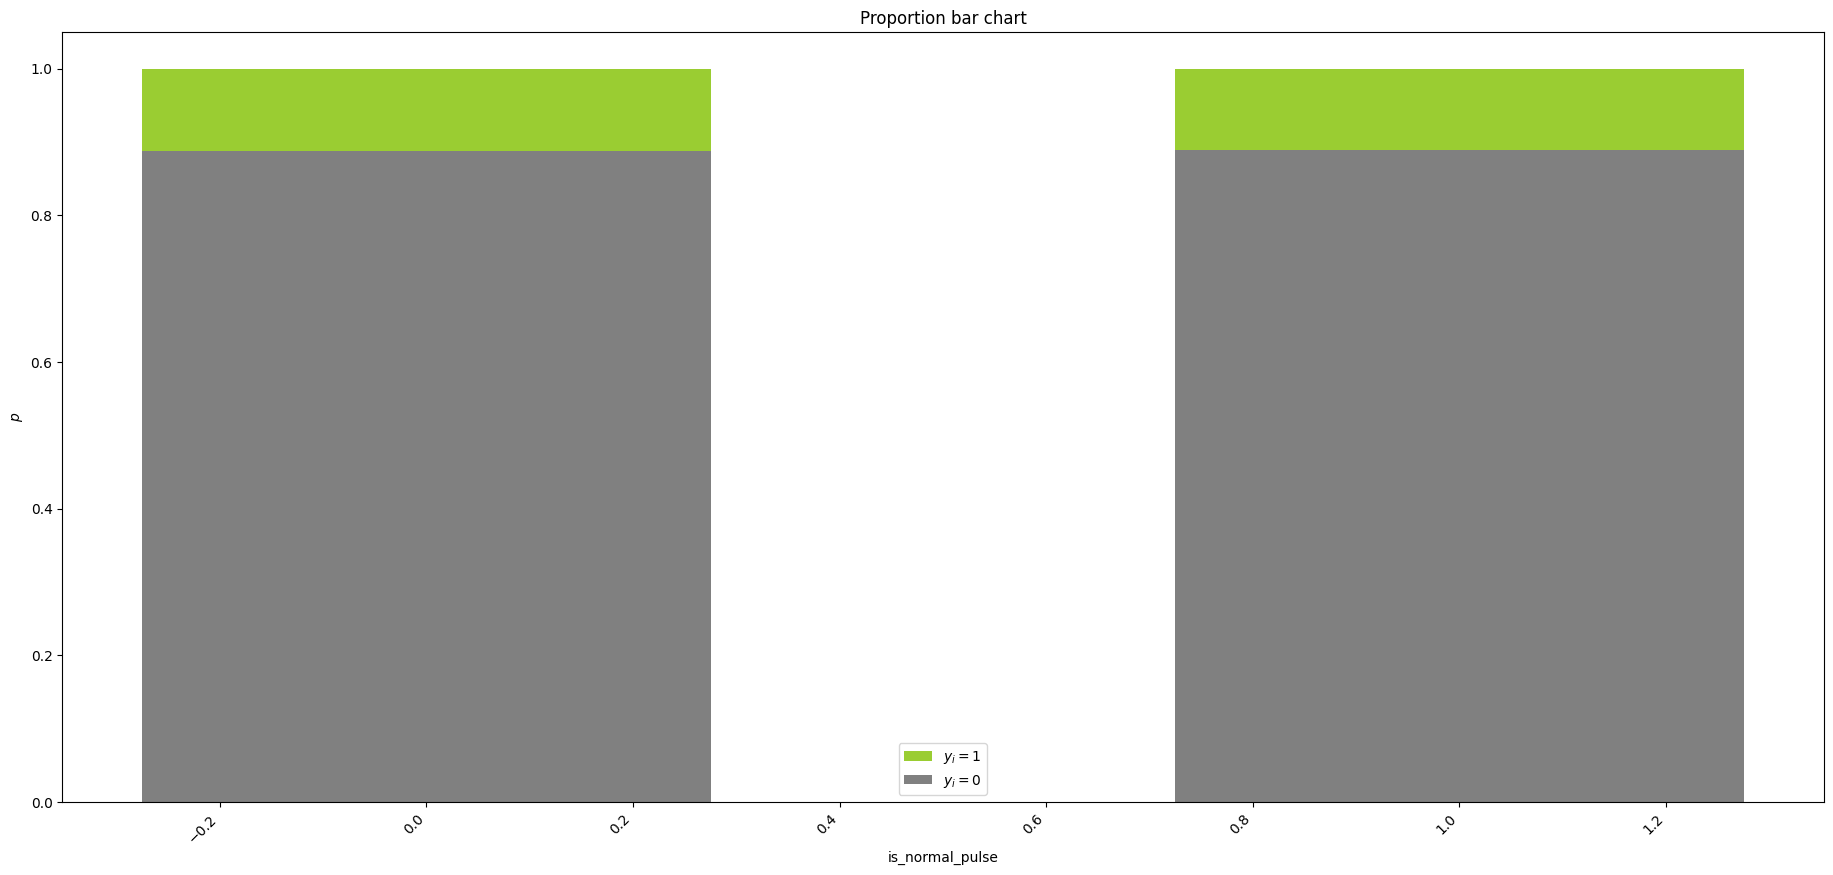

In [174]:
bar_charts_categorical(train, "is_normal_pulse", "readmitted_binary")

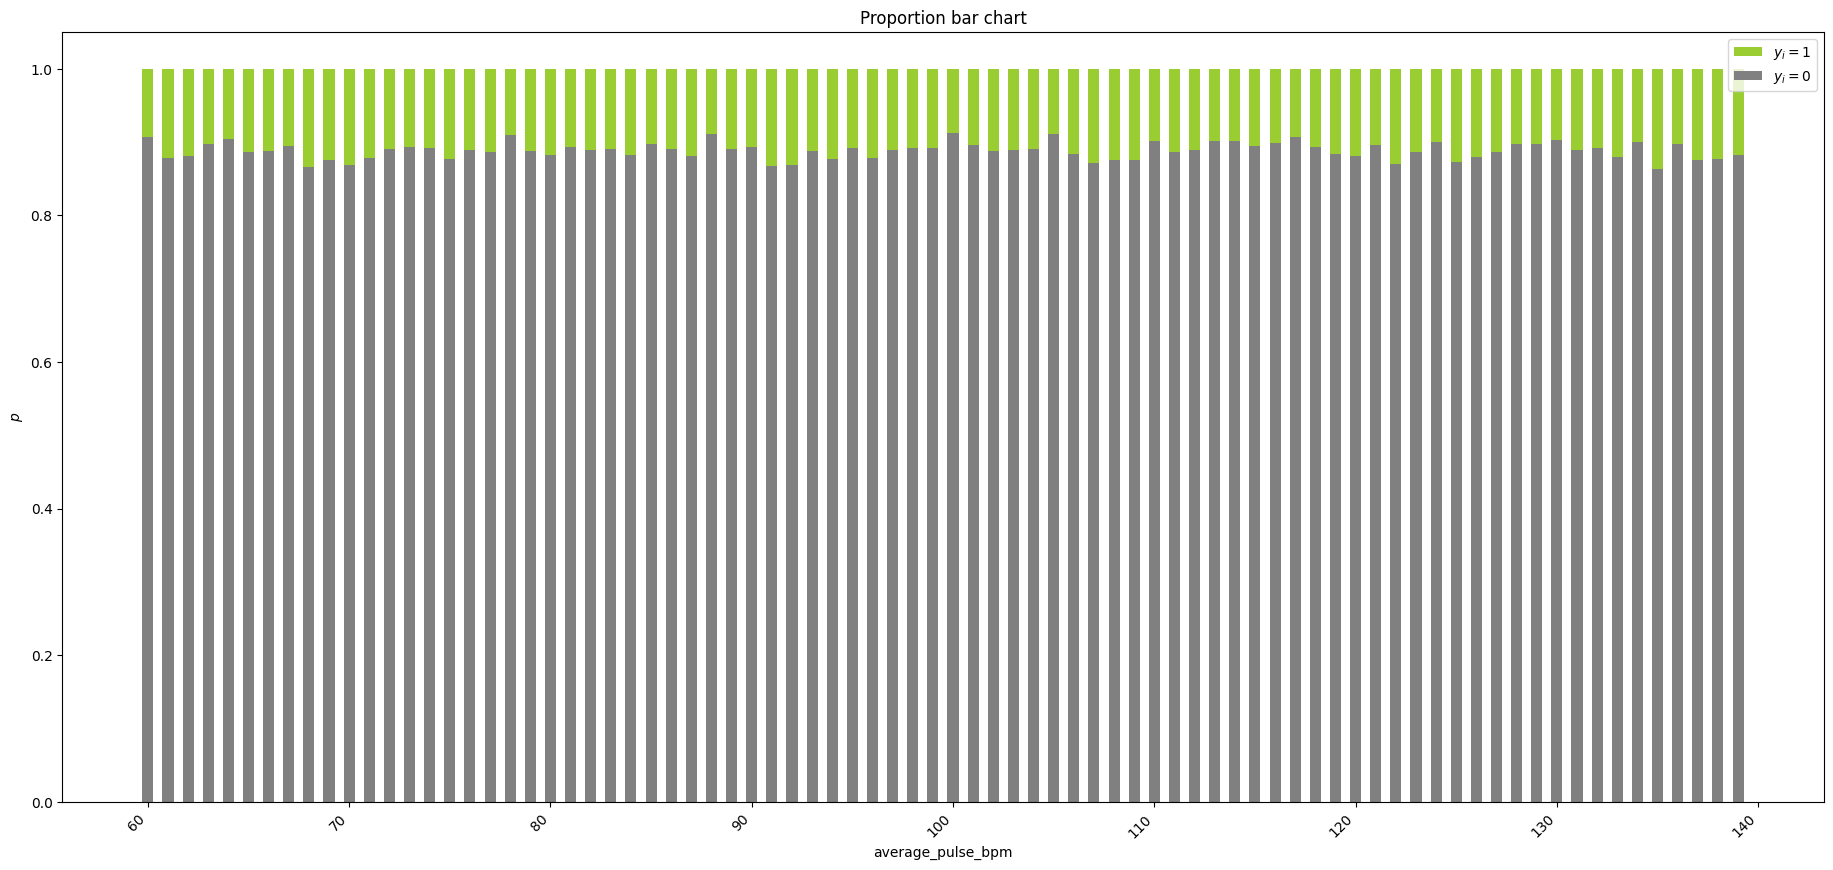

In [175]:
bar_charts_categorical(train, "average_pulse_bpm", "readmitted_binary")

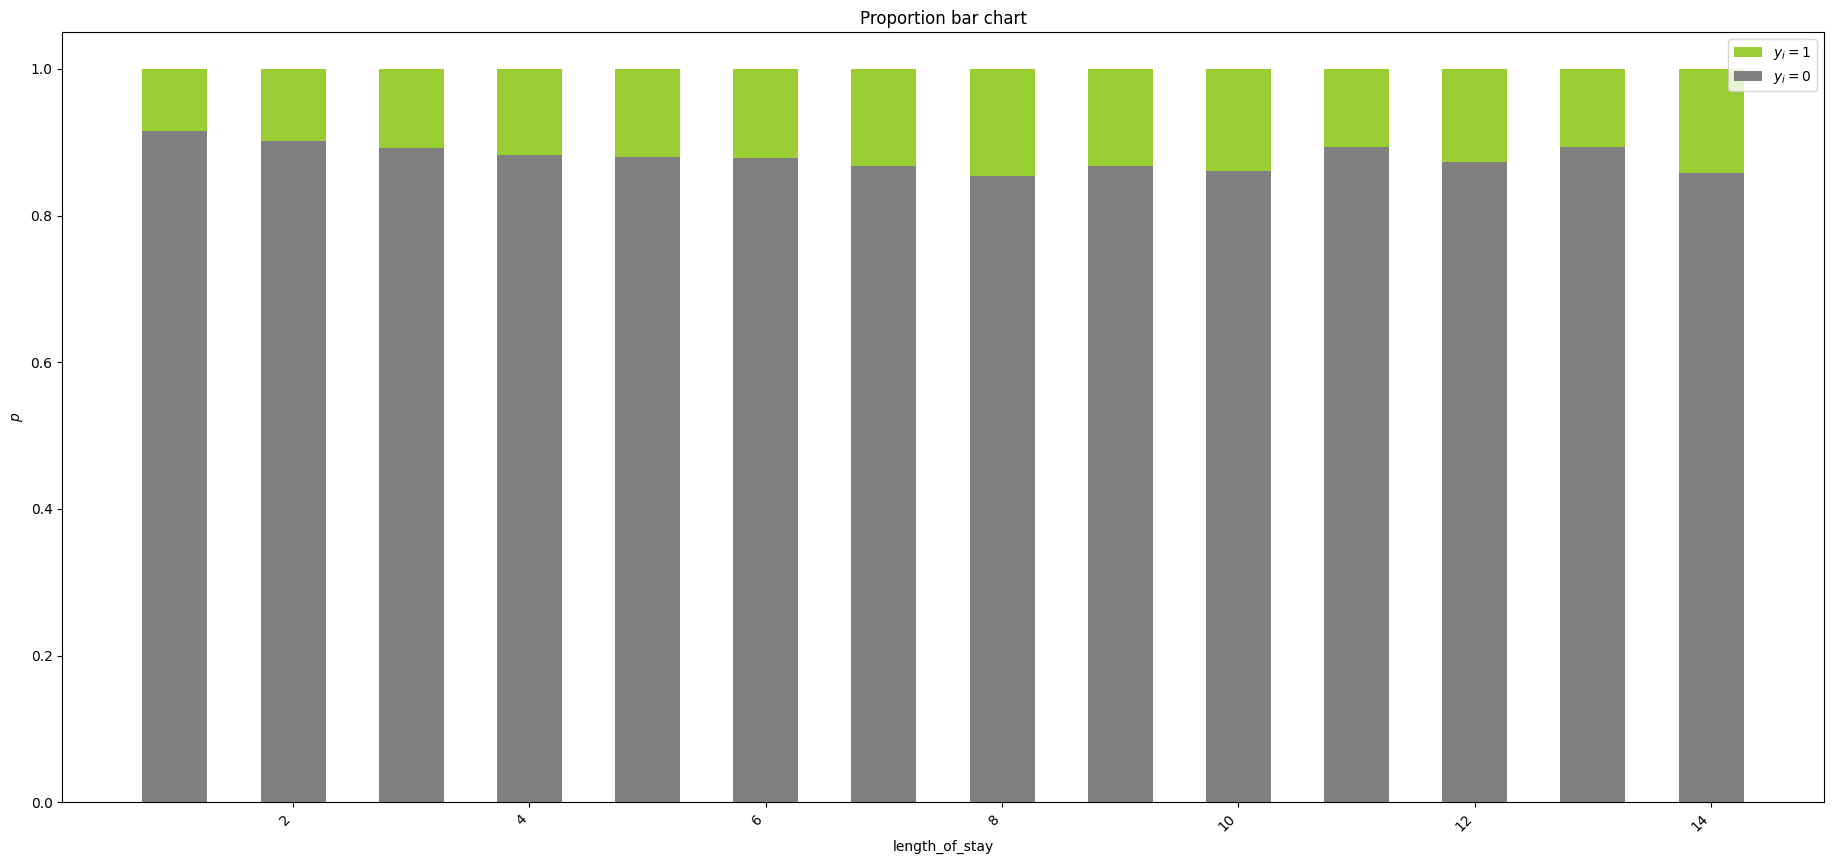

In [176]:
bar_charts_categorical(train, 'length_of_stay', "readmitted_binary")

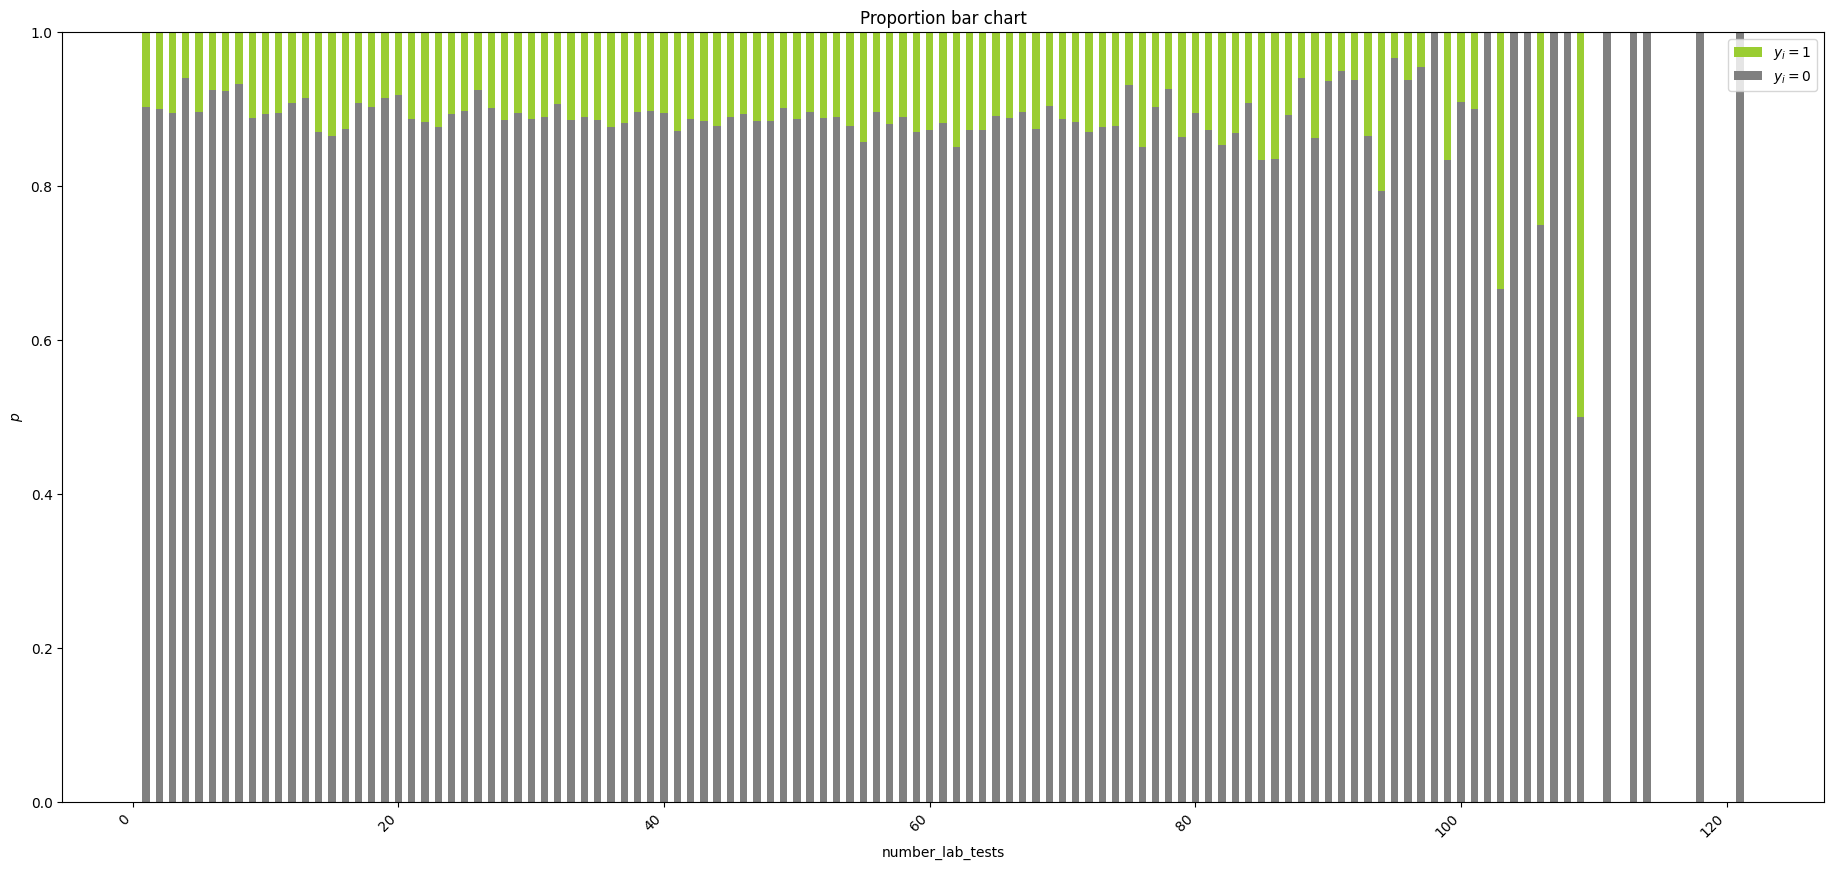

In [177]:
bar_charts_categorical(train, 'number_lab_tests', "readmitted_binary")

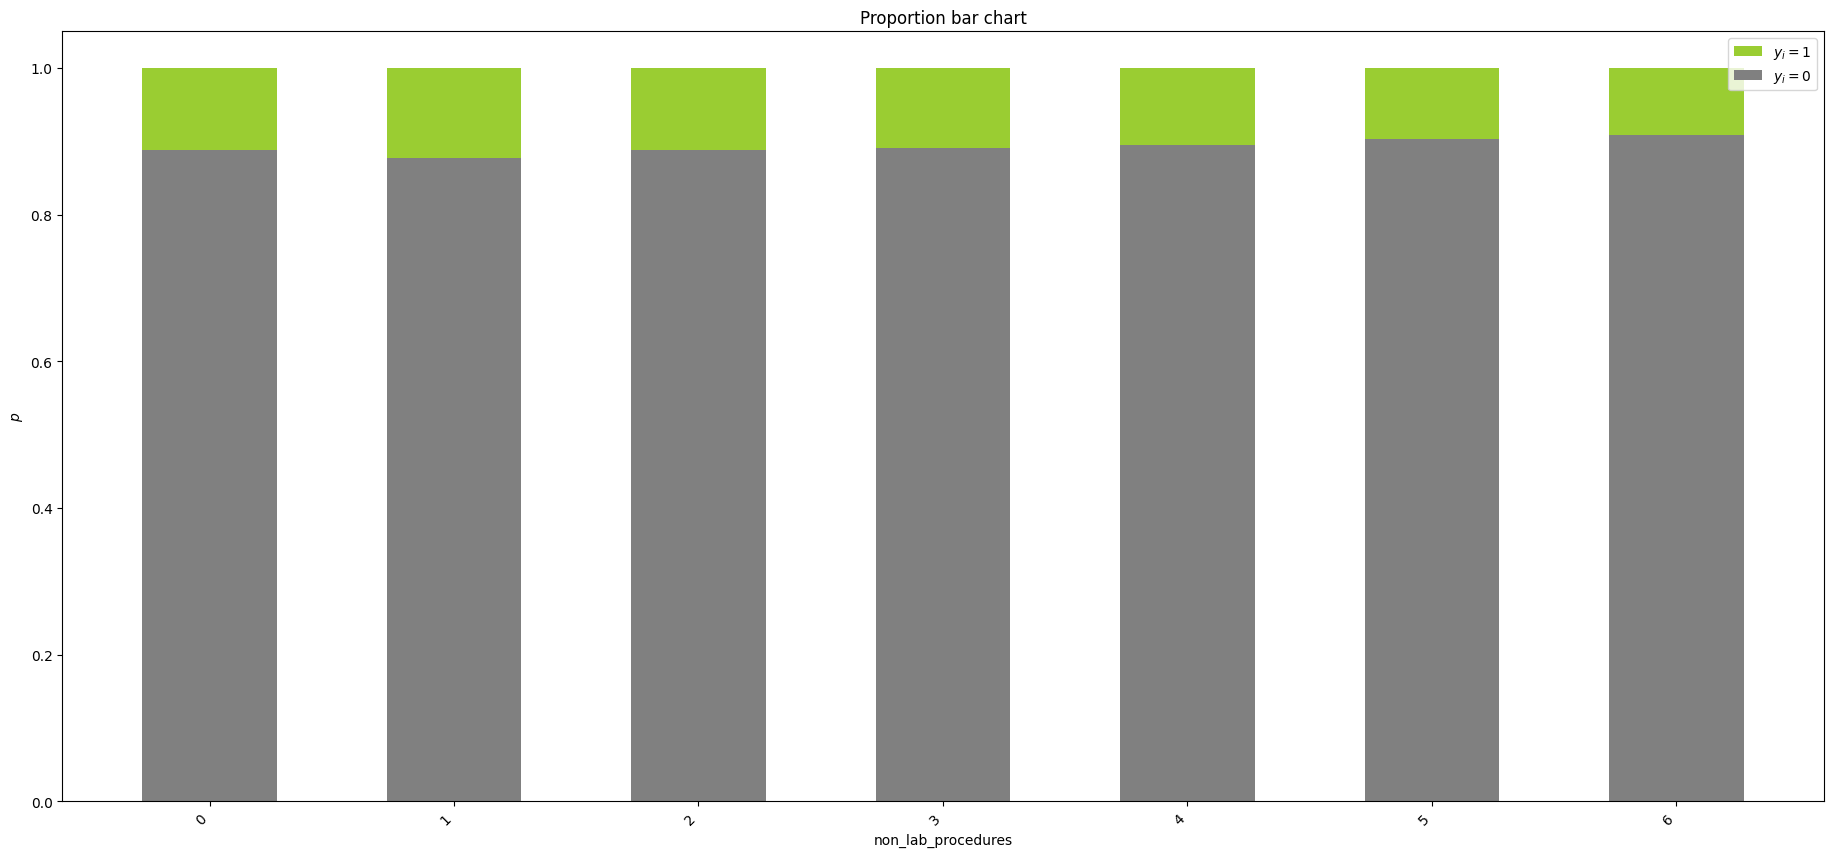

In [178]:
bar_charts_categorical(train, 'non_lab_procedures', "readmitted_binary")

In [179]:
train['non_lab_procedures'].value_counts(normalize=True)

non_lab_procedures
0    0.458083
1    0.204012
2    0.124881
3    0.092846
6    0.048824
4    0.041103
5    0.030252
Name: proportion, dtype: float64

In [180]:
test['non_lab_procedures'].value_counts(normalize=True)

non_lab_procedures
0    0.459220
1    0.203374
2    0.125156
3    0.092663
6    0.048346
4    0.041009
5    0.030233
Name: proportion, dtype: float64

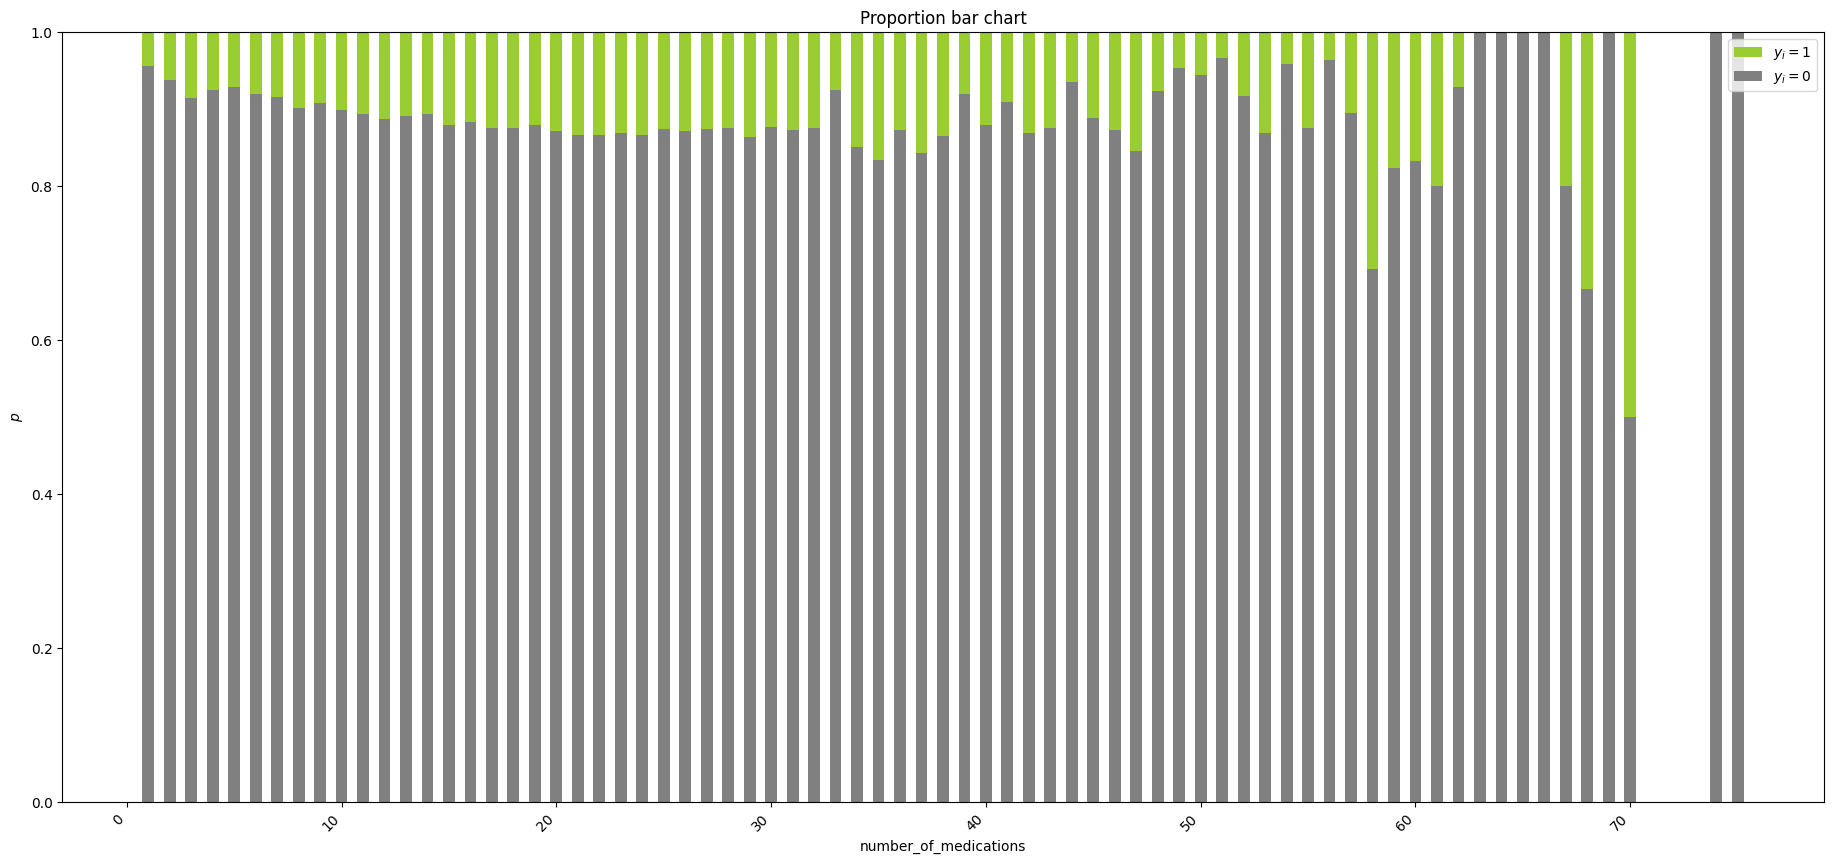

In [181]:
bar_charts_categorical(train, 'number_of_medications', "readmitted_binary")

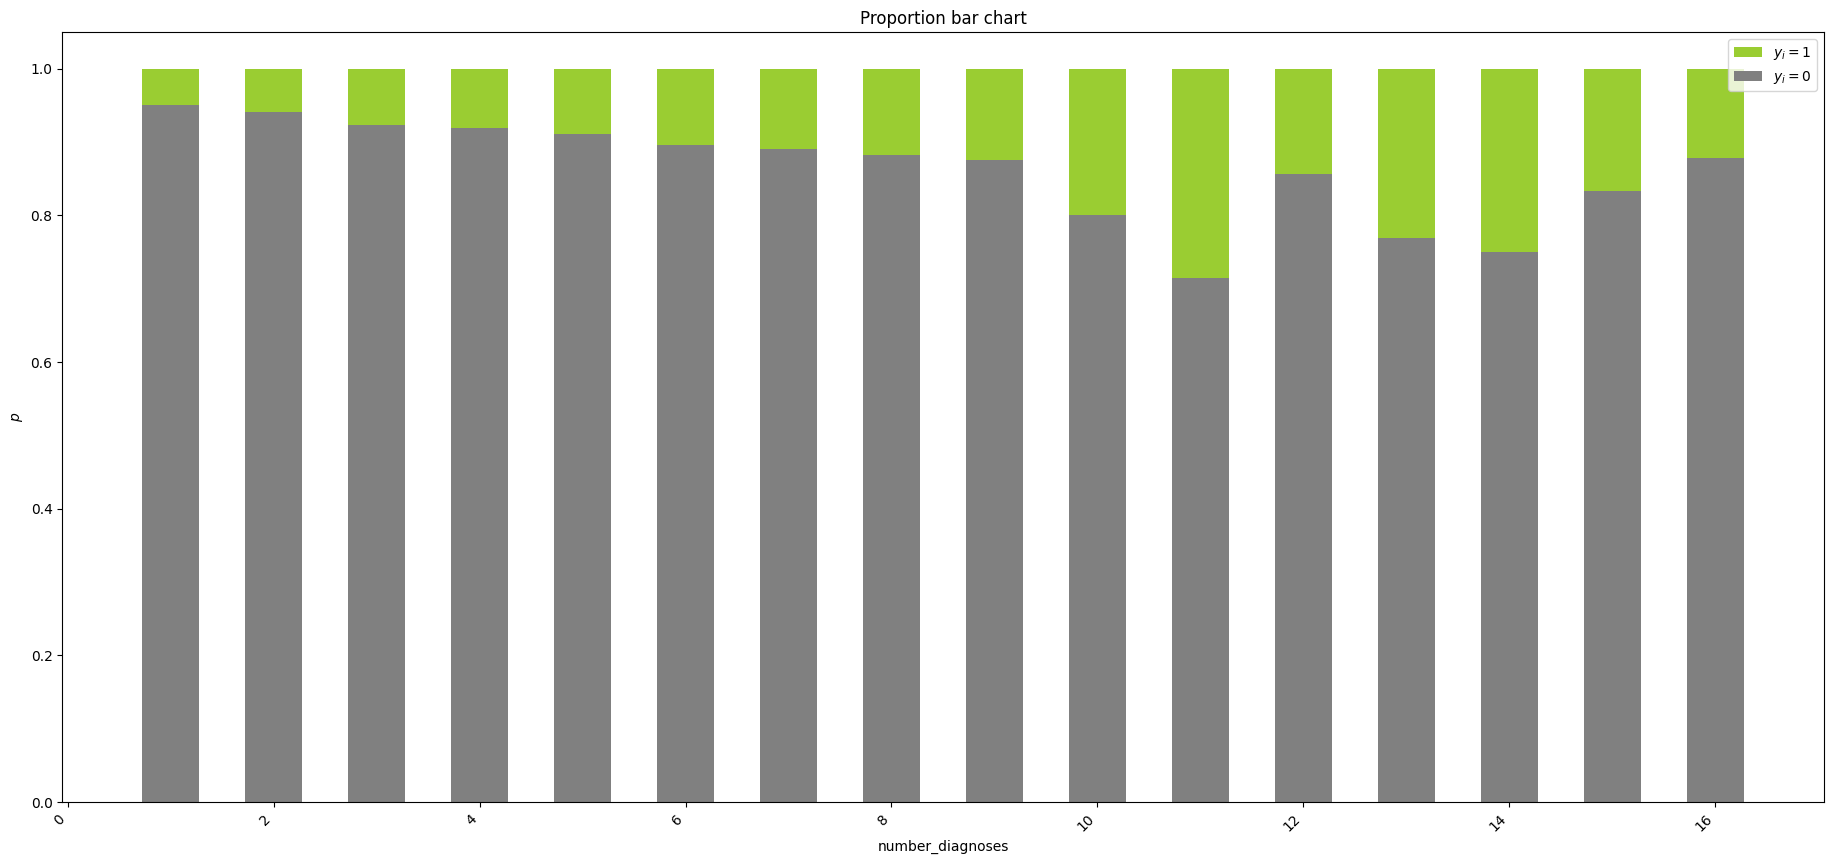

In [182]:
bar_charts_categorical(train, 'number_diagnoses', "readmitted_binary")

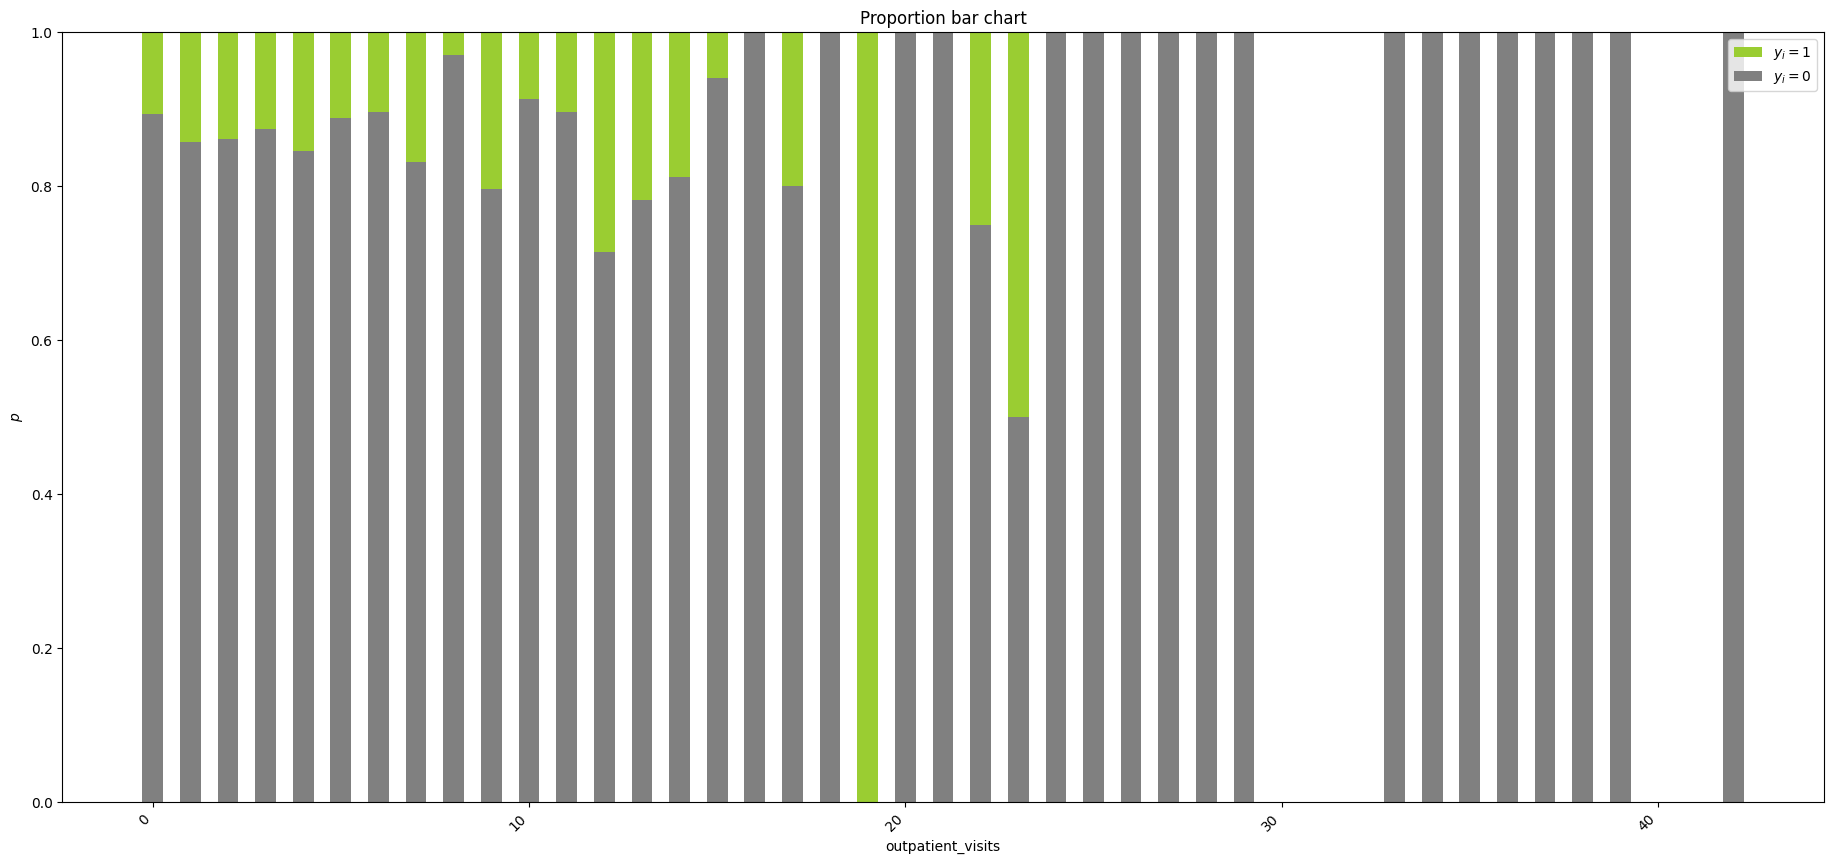

In [183]:
bar_charts_categorical(train, 'outpatient_visits', "readmitted_binary")

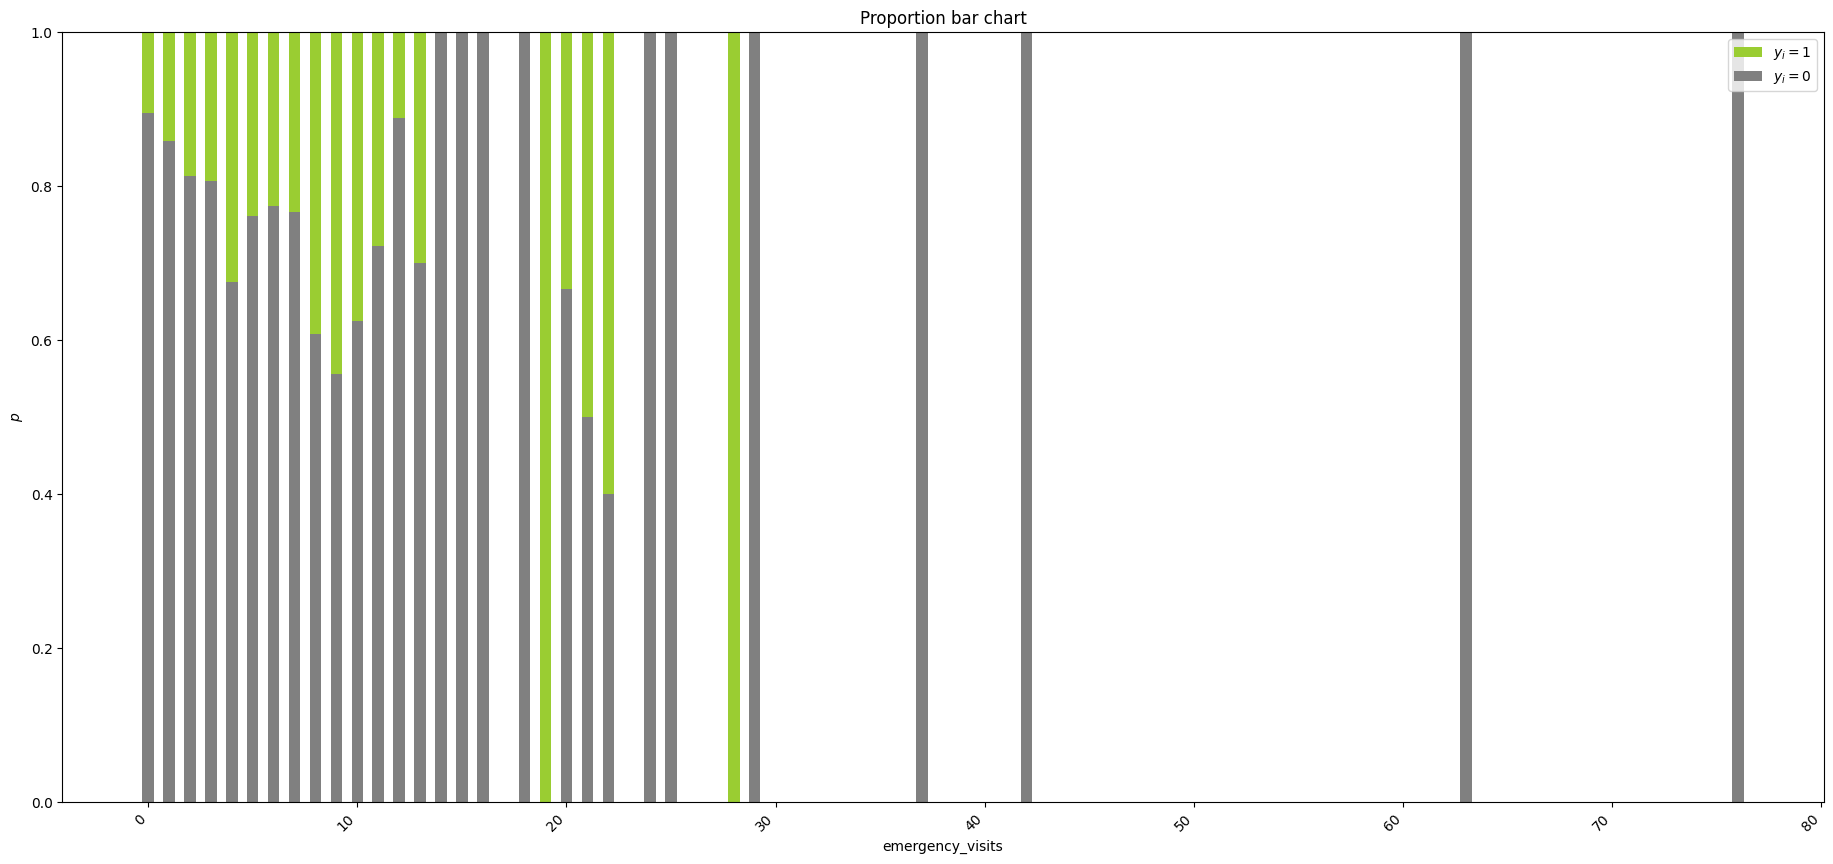

In [184]:
bar_charts_categorical(train, 'emergency_visits', "readmitted_binary")

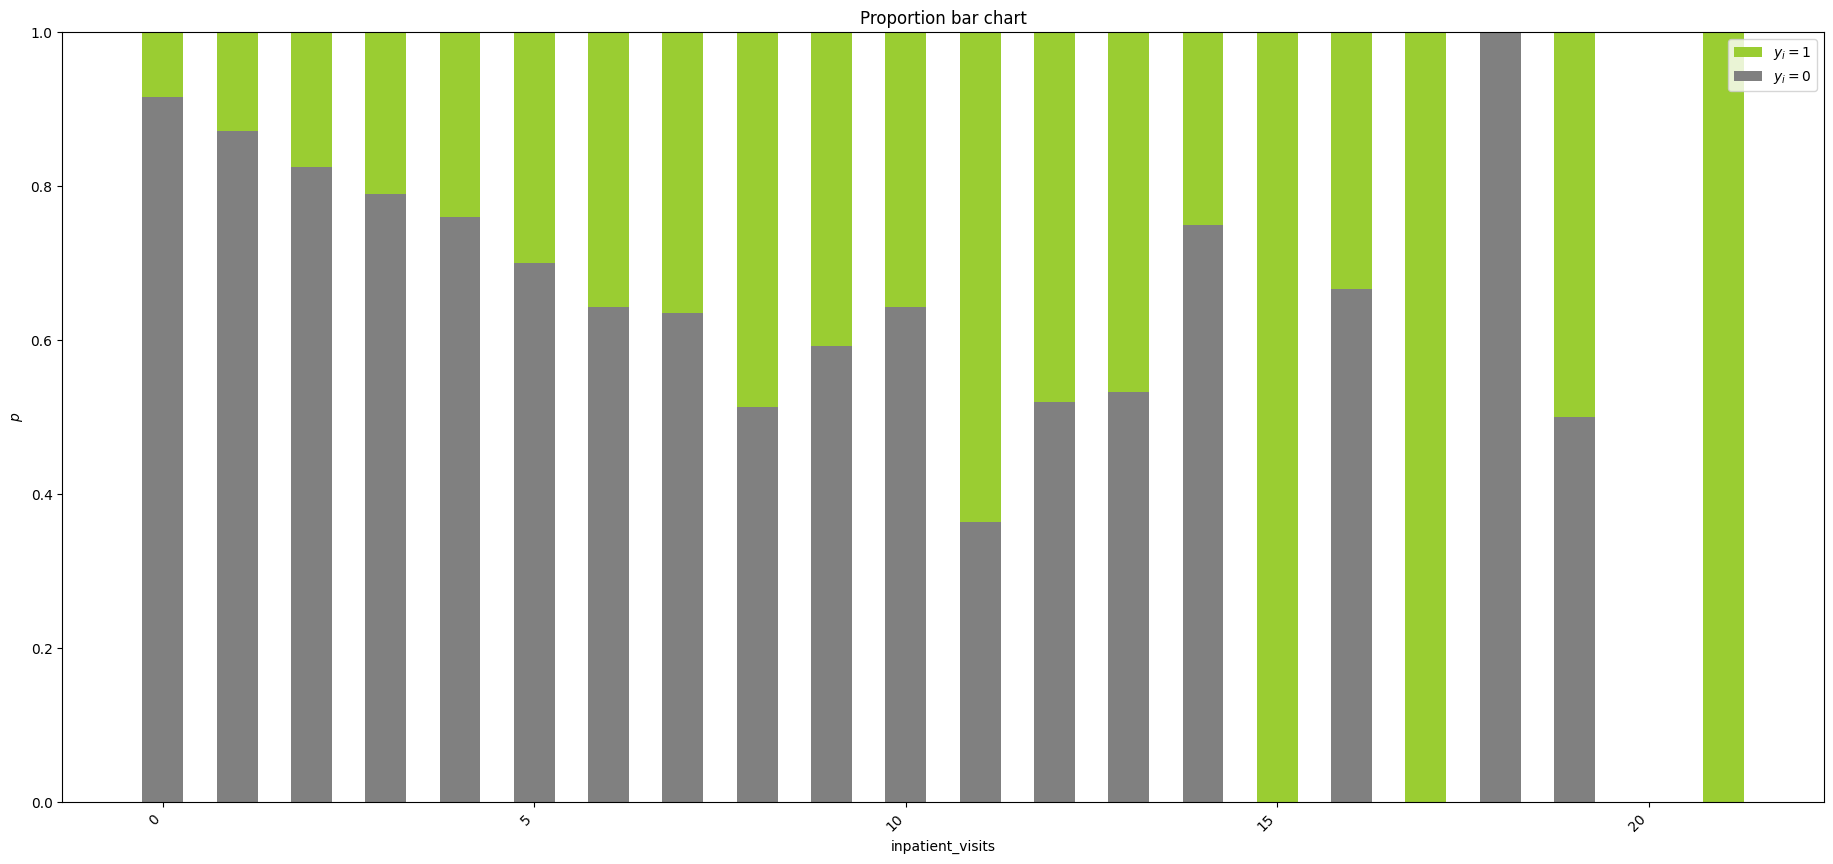

In [185]:
bar_charts_categorical(train, 'inpatient_visits', "readmitted_binary")

In [186]:
train.drop(['patient_id'], axis = 1, inplace = True) 

In [187]:
test.drop(['patient_id'], axis = 1, inplace = True) 

In [188]:
train.drop(['medication'], axis = 1, inplace = True) 

In [189]:
test.drop(['medication'], axis = 1, inplace = True) 

In [190]:
train['Total_visits'] = train['inpatient_visits'] + train['outpatient_visits'] + train['emergency_visits']

In [191]:
test['Total_visits'] = test['inpatient_visits'] + test['outpatient_visits'] + test['emergency_visits']

In [192]:
train['Serious_condition_visits'] = train['inpatient_visits'] + train['emergency_visits']

In [193]:
test['Serious_condition_visits'] = test['inpatient_visits'] + test['emergency_visits']

In [194]:
# Drop because its exactly the same as presc_diabetes_meds_binary
train.drop(['no_medication'], axis=1, inplace=True)

In [195]:
# Drop because its exactly the same as presc_diabetes_meds_binary
test.drop(['no_medication'], axis=1, inplace=True)

# Train Test Split

In [196]:
X = train.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y_binary = train['readmitted_binary']

In [197]:
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_binary,
                                                  test_size = 0.25, 
                                                  random_state = 0, 
                                                  stratify = y_binary, 
                                                  shuffle = True)

# Outliers

In [198]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'outpatient_visits',
            'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

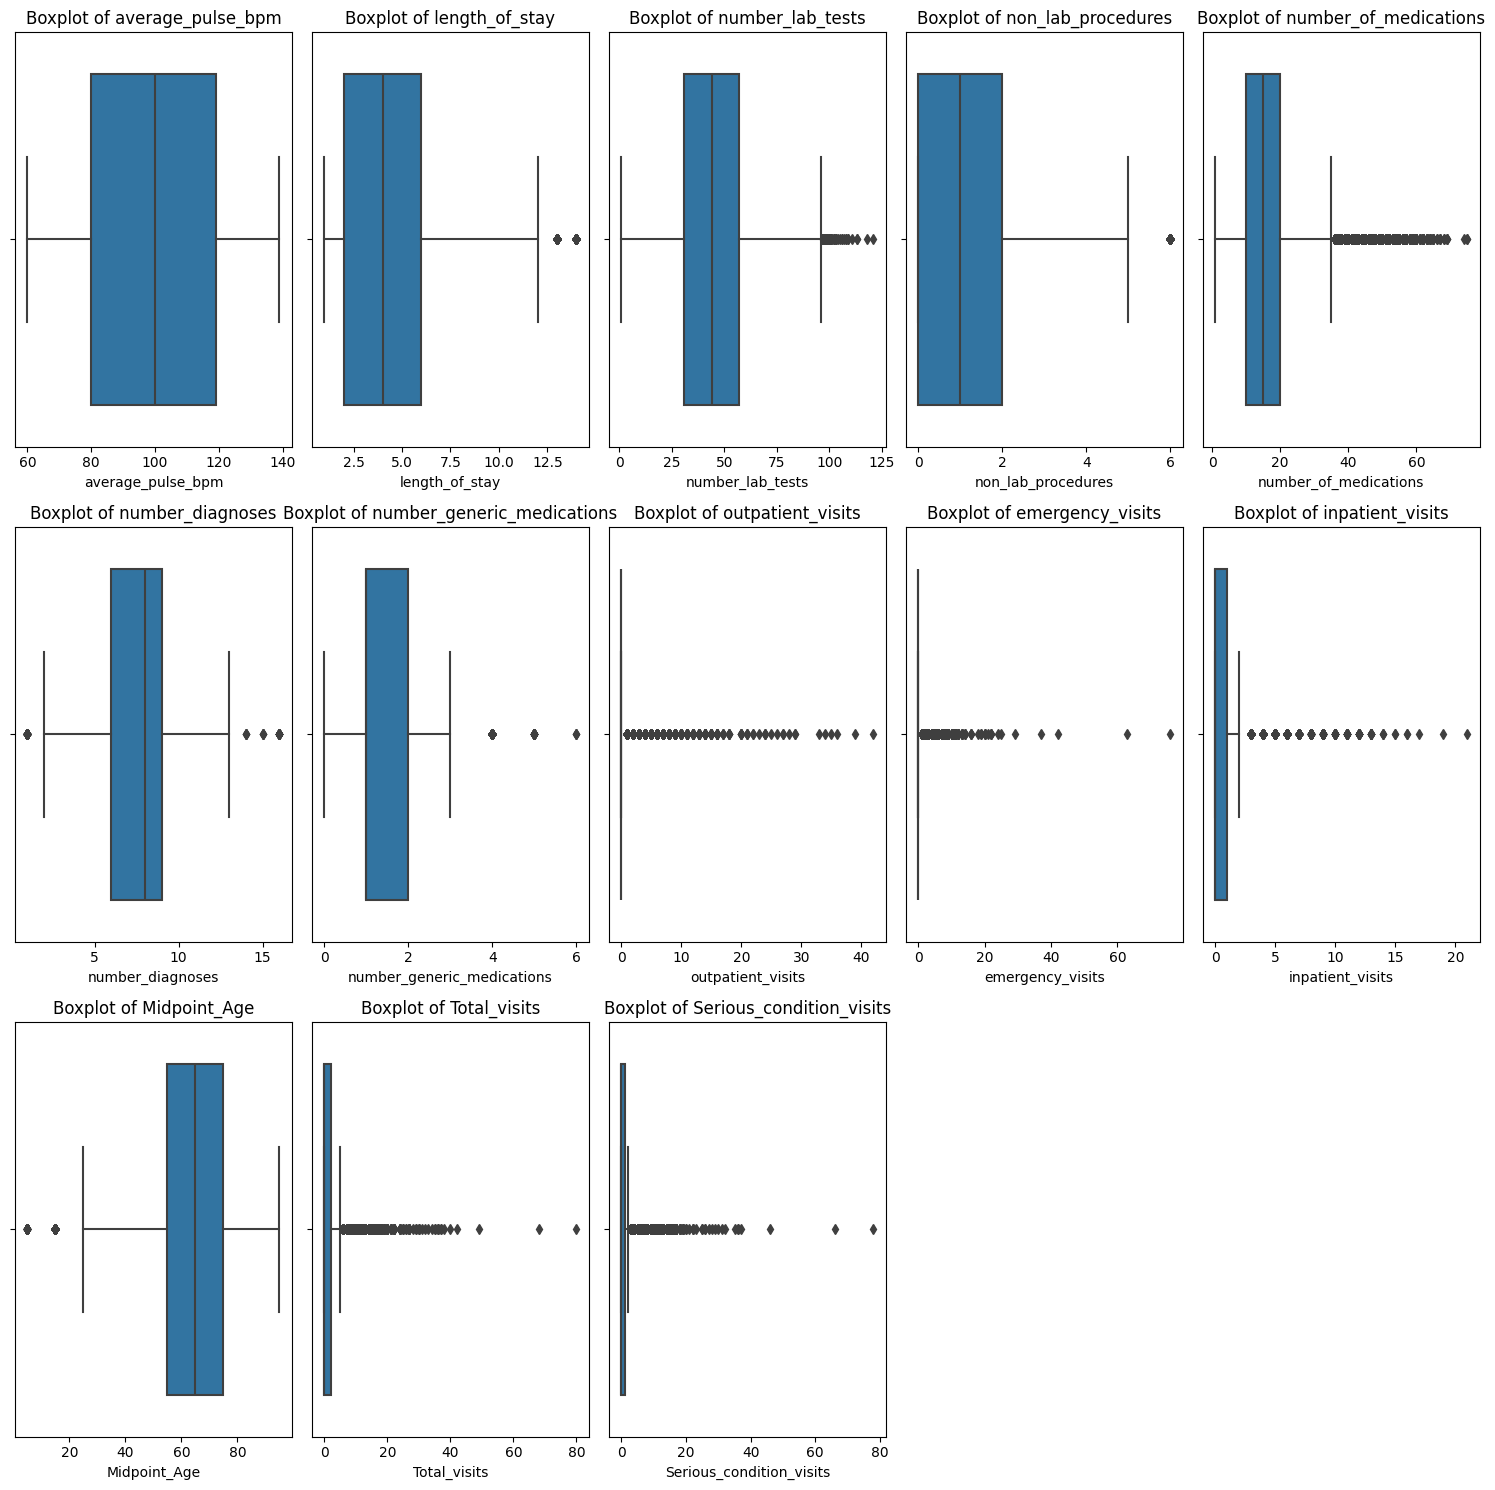

In [199]:
# Determine the number of rows needed for the plot
n_rows = int(np.ceil(len(metric_features) / 5))

# Create a figure and axes objects
fig, axs = plt.subplots(n_rows, 5, figsize=(15, n_rows * 5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

# Create a boxplot for each column
for i, feature in enumerate(metric_features):
    sns.boxplot(x=X_train_bin[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')

# Display the plot
plt.tight_layout()
plt.show()

In [200]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        
    print(result)

In [201]:
for categorical_columns in X_train_bin:
    TestIndependence(X_train_bin[categorical_columns],y_train_bin, categorical_columns)

payer_code is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
race_caucasian is IMPORTANT for Prediction
number_generic_medications is IMPORTANT for Prediction
metformin is IMPORTANT for Prediction
insulin is IMPORTANT for Prediction
Sulfonylureas is NOT an important predictor. (Discard Sulfo

In [202]:
X_train_bin.shape

(53427, 36)

In [203]:
X_train_bin.drop(['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
'Combination_Medications','is_normal_pulse'], axis = 1, inplace = True) 
X_val_bin.drop(['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
'Combination_Medications','is_normal_pulse'], axis = 1, inplace = True)

In [204]:
X_train_bin.shape

(53427, 30)

In [208]:
X_val_bin.shape

(17809, 30)

In [205]:
test.shape

(30530, 36)

In [206]:
test.drop(['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
'Combination_Medications','is_normal_pulse'], axis = 1, inplace = True) 

In [207]:
test.shape

(30530, 30)

## Encoding categorical variables

In [209]:
X_train_bin.columns

Index(['payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'metformin', 'insulin', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [210]:
test.columns

Index(['payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'metformin', 'insulin', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [211]:
columns_to_encode = ['payer_code', 'admission_type', 'medical_specialty','discharge_disposition', 'admission_source',
                     'primary_diagnosis_types', 'secondary_diagnosis_types', 'additional_diagnosis_types', 'glucose_test_result', 
                     'a1c_test_result']

other_columns_train = pd.DataFrame(X_train_bin.drop(columns_to_encode, axis=1))
other_columns_val = pd.DataFrame(X_val_bin.drop(columns_to_encode, axis=1))
other_columns_test = pd.DataFrame(test.drop(columns_to_encode, axis=1))

In [212]:
# Perform one-hot encoding on the specified columns
train_encoded_1 = pd.get_dummies(X_train_bin[columns_to_encode])
train_encoded_1 = train_encoded_1.astype(int)

X_train_bin_encoded = pd.concat([train_encoded_1, other_columns_train], axis=1)
X_train_bin_encoded

,payer_code_BC,payer_code_CM,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_None,payer_code_OG,payer_code_Other_code,payer_code_SP,...,number_generic_medications,metformin,insulin,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
119133,0,0,0,0,0,0,0,0,0,1,...,1,0,1,55.0,1,1,0,1,1,1
532575,0,0,0,0,0,0,1,0,0,0,...,1,0,1,15.0,0,1,0,0,0,0
909215,0,0,0,0,0,0,1,0,0,0,...,2,0,1,55.0,1,1,1,0,0,0
662753,0,1,0,0,0,0,0,0,0,0,...,0,0,0,65.0,0,0,0,1,1,1
694319,1,0,0,0,0,0,0,0,0,0,...,3,0,1,45.0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327556,0,0,0,0,0,0,1,0,0,0,...,0,0,0,75.0,0,0,0,0,1,1
998331,0,0,0,0,0,0,0,0,1,0,...,3,1,0,55.0,1,1,1,1,4,4
210258,0,0,0,0,1,0,0,0,0,0,...,0,0,0,35.0,1,0,0,1,3,2


In [213]:
# Perform one-hot encoding on the specified columns
val_encoded_1 = pd.get_dummies(X_val_bin[columns_to_encode])
val_encoded_1 = val_encoded_1.astype(int)

X_val_bin_encoded = pd.concat([val_encoded_1, other_columns_val], axis=1)
X_val_bin_encoded

,payer_code_BC,payer_code_CM,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_None,payer_code_OG,payer_code_Other_code,payer_code_SP,...,number_generic_medications,metformin,insulin,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
274568,0,0,0,0,0,0,1,0,0,0,...,0,0,0,55.0,0,0,0,0,0,0
768397,0,0,0,1,0,0,0,0,0,0,...,1,1,0,55.0,1,1,0,1,0,0
897606,0,0,0,0,0,0,1,0,0,0,...,1,0,1,45.0,1,1,0,0,0,0
827973,0,0,0,0,0,0,1,0,0,0,...,1,0,0,75.0,0,1,0,0,0,0
806134,0,0,0,0,0,0,1,0,0,0,...,1,0,1,55.0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158462,0,0,0,0,0,0,1,0,0,0,...,1,0,1,65.0,0,1,1,0,4,1
599332,0,0,0,0,1,0,0,0,0,0,...,1,0,1,85.0,0,1,0,1,0,0
432909,0,0,0,0,1,0,0,0,0,0,...,1,0,1,85.0,0,1,1,1,4,4


In [214]:
# Perform one-hot encoding on the specified columns
test_encoded_1 = pd.get_dummies(test[columns_to_encode])
test_encoded_1 = test_encoded_1.astype(int)

test_encoded = pd.concat([test_encoded_1, other_columns_test], axis=1)
test_encoded

,payer_code_BC,payer_code_CM,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_None,payer_code_Other_code,payer_code_SP,payer_code_UN,...,number_generic_medications,metformin,insulin,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,0,0,0,1,0,0,0,0,0,0,...,1,1,0,85.0,1,1,0,1,0,0
447319,0,0,0,1,0,0,0,0,0,0,...,0,0,0,25.0,1,0,0,1,1,1
309126,0,0,0,0,0,0,1,0,0,0,...,1,0,1,35.0,1,1,0,0,0,0
181183,1,0,0,0,0,0,0,0,0,0,...,3,1,1,55.0,1,1,1,1,0,0
359339,0,0,0,0,0,0,1,0,0,0,...,1,1,0,65.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,0,0,0,1,0,0,0,0,0,0,...,0,0,0,75.0,1,0,0,1,0,0
549298,0,0,0,0,0,0,1,0,0,0,...,1,0,1,65.0,1,1,0,0,4,4
327586,0,0,0,0,0,0,1,0,0,0,...,1,0,1,85.0,0,1,0,0,0,0


In [220]:
# Dropping payer_code_OG on train and val because it does not exist on test (got dropped when doing the >1% categories)

In [216]:
X_train_bin_encoded.drop(['payer_code_OG'], axis=1, inplace=True)
X_val_bin_encoded.drop(['payer_code_OG'], axis=1, inplace=True)

In [217]:
X_train_bin_encoded.shape

(53427, 80)

In [218]:
X_val_bin_encoded.shape

(17809, 80)

In [219]:
test_encoded.shape

(30530, 80)

In [221]:
for categorical_columns2 in X_train_bin_encoded:
    TestIndependence(X_train_bin_encoded[categorical_columns2],y_train_bin, categorical_columns2, 0.05)

payer_code_BC is IMPORTANT for Prediction
payer_code_CM is NOT an important predictor. (Discard payer_code_CM from model)
payer_code_CP is IMPORTANT for Prediction
payer_code_HM is IMPORTANT for Prediction
payer_code_MC is IMPORTANT for Prediction
payer_code_MD is NOT an important predictor. (Discard payer_code_MD from model)
payer_code_None is NOT an important predictor. (Discard payer_code_None from model)
payer_code_Other_code is IMPORTANT for Prediction
payer_code_SP is NOT an important predictor. (Discard payer_code_SP from model)
payer_code_UN is IMPORTANT for Prediction
admission_type_Elective is IMPORTANT for Prediction
admission_type_Other_type is NOT an important predictor. (Discard admission_type_Other_type from model)
admission_type_Urgent/Emergency is IMPORTANT for Prediction
medical_specialty_Cardiology is IMPORTANT for Prediction
medical_specialty_Emergency_Trauma is NOT an important predictor. (Discard medical_specialty_Emergency_Trauma from model)
medical_specialty_Fam

In [223]:
X_train_bin_encoded.drop(['payer_code_CM','payer_code_MD','payer_code_Other_code',
'payer_code_SP','admission_type_Other_type','medical_specialty_Emergency_Trauma',
'medical_specialty_Family_GeneralPractice','medical_specialty_InternalMedicine','medical_specialty_Surgery',
'admission_source_No_source','primary_diagnosis_types_Circulatory','primary_diagnosis_types_Digestive',
'primary_diagnosis_types_Genitourinary','primary_diagnosis_types_Neoplasms','primary_diagnosis_types_Other',
'secondary_diagnosis_types_Circulatory','secondary_diagnosis_types_Digestive','secondary_diagnosis_types_Genitourinary',
'secondary_diagnosis_types_Injury','secondary_diagnosis_types_Musculoskeletal','secondary_diagnosis_types_Other',
'secondary_diagnosis_types_Respiratory','additional_diagnosis_types_Circulatory','additional_diagnosis_types_Digestive',
'additional_diagnosis_types_Injury','additional_diagnosis_types_Musculoskeletal','additional_diagnosis_types_Respiratory'],
                         axis = 1, inplace = True) 
X_val_bin_encoded.drop(['payer_code_CM','payer_code_MD','payer_code_Other_code',
'payer_code_SP','admission_type_Other_type','medical_specialty_Emergency_Trauma',
'medical_specialty_Family_GeneralPractice','medical_specialty_InternalMedicine','medical_specialty_Surgery',
'admission_source_No_source','primary_diagnosis_types_Circulatory','primary_diagnosis_types_Digestive',
'primary_diagnosis_types_Genitourinary','primary_diagnosis_types_Neoplasms','primary_diagnosis_types_Other',
'secondary_diagnosis_types_Circulatory','secondary_diagnosis_types_Digestive','secondary_diagnosis_types_Genitourinary',
'secondary_diagnosis_types_Injury','secondary_diagnosis_types_Musculoskeletal','secondary_diagnosis_types_Other',
'secondary_diagnosis_types_Respiratory','additional_diagnosis_types_Circulatory','additional_diagnosis_types_Digestive',
'additional_diagnosis_types_Injury','additional_diagnosis_types_Musculoskeletal','additional_diagnosis_types_Respiratory'],
                         axis = 1, inplace = True)
test_encoded.drop(['payer_code_CM','payer_code_MD','payer_code_Other_code',
'payer_code_SP','admission_type_Other_type','medical_specialty_Emergency_Trauma',
'medical_specialty_Family_GeneralPractice','medical_specialty_InternalMedicine','medical_specialty_Surgery',
'admission_source_No_source','primary_diagnosis_types_Circulatory','primary_diagnosis_types_Digestive',
'primary_diagnosis_types_Genitourinary','primary_diagnosis_types_Neoplasms','primary_diagnosis_types_Other',
'secondary_diagnosis_types_Circulatory','secondary_diagnosis_types_Digestive','secondary_diagnosis_types_Genitourinary',
'secondary_diagnosis_types_Injury','secondary_diagnosis_types_Musculoskeletal','secondary_diagnosis_types_Other',
'secondary_diagnosis_types_Respiratory','additional_diagnosis_types_Circulatory','additional_diagnosis_types_Digestive',
'additional_diagnosis_types_Injury','additional_diagnosis_types_Musculoskeletal','additional_diagnosis_types_Respiratory'],
                         axis = 1, inplace = True)

In [224]:
X_train_bin_encoded.shape

(53427, 53)

In [225]:
X_val_bin_encoded.shape

(17809, 53)

In [226]:
test_encoded.shape

(30530, 53)

## Imputing age

In [227]:
train['Midpoint_Age'].isna().sum()

2217

In [146]:
X_train_bin_encoded['Midpoint_Age'].value_counts()

Midpoint_Age
75.0    13302
65.0    11321
85.0     8779
55.0     8748
45.0     4902
35.0     1932
95.0     1459
25.0      838
15.0      372
5.0        75
Name: count, dtype: int64

In [147]:
X_train_bin_encoded['Midpoint_Age'].isna().sum()

1696

In [228]:
X_val_bin_encoded['Midpoint_Age'].isna().sum()

564

In [229]:
test_encoded['Midpoint_Age'].isna().sum()

1194

In [230]:
known_age = X_train_bin_encoded[X_train_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_train_bin_encoded[X_train_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_train_bin_encoded.loc[X_train_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [231]:
known_age = X_val_bin_encoded[X_val_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_val_bin_encoded[X_val_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_val_bin_encoded.loc[X_val_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [232]:
known_age = test_encoded[test_encoded['Midpoint_Age'].notnull()]
unknown_age = test_encoded[test_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
test_encoded.loc[test_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [233]:
X_train_bin_encoded['Midpoint_Age'].isna().sum()

0

In [234]:
X_val_bin_encoded['Midpoint_Age'].isna().sum()

0

In [235]:
test_encoded['Midpoint_Age'].isna().sum()

0

In [236]:
for i in metric_features:
    correlation, p_value = pointbiserialr(X_train_bin_encoded[i], y_train_bin.map({'Yes': True, 'No': False}))
    print(i)
    print(f'Correlation: {correlation}')
    print(f'P-Value: {p_value}')
    print('')

average_pulse_bpm
Correlation: 0.0016004919690654474
P-Value: 0.7114318183383384

length_of_stay
Correlation: 0.04097232481915072
P-Value: 2.6877406271510695e-21

number_lab_tests
Correlation: 0.017661850661575135
P-Value: 4.452836204940555e-05

non_lab_procedures
Correlation: -0.016799164322646727
P-Value: 0.00010309526752261554

number_of_medications
Correlation: 0.037009222480364215
P-Value: 1.1569500642965509e-17

number_diagnoses
Correlation: 0.051933384839510106
P-Value: 3.0786675635012822e-33

number_generic_medications
Correlation: -0.00035956683580707266
P-Value: 0.9337645928961151

outpatient_visits
Correlation: 0.015530016927496037
P-Value: 0.0003309517355039584

emergency_visits
Correlation: 0.05778265124435546
P-Value: 9.439299370158712e-41

inpatient_visits
Correlation: 0.1640003114453629
P-Value: 1.0614e-318

Midpoint_Age
Correlation: 0.016800403809557
P-Value: 0.00010297378749942128

Total_visits
Correlation: 0.12271419990141201
P-Value: 2.640531615700838e-178

Serious_

In [237]:
X_train_bin_encoded.head()

,payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_None,payer_code_UN,admission_type_Elective,admission_type_Urgent/Emergency,medical_specialty_Cardiology,medical_specialty_Other_specialty,...,number_generic_medications,metformin,insulin,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
119133,0,0,0,0,0,0,0,1,0,0,...,1,0,1,55.0,1,1,0,1,1,1
532575,0,0,0,0,1,0,0,1,0,1,...,1,0,1,15.0,0,1,0,0,0,0
909215,0,0,0,0,1,0,0,0,0,0,...,2,0,1,55.0,1,1,1,0,0,0
662753,0,0,0,0,0,0,0,1,0,1,...,0,0,0,65.0,0,0,0,1,1,1
694319,1,0,0,0,0,0,1,0,0,0,...,3,0,1,45.0,0,1,1,1,1,1


In [238]:
X_val_bin_encoded.head()

,payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_None,payer_code_UN,admission_type_Elective,admission_type_Urgent/Emergency,medical_specialty_Cardiology,medical_specialty_Other_specialty,...,number_generic_medications,metformin,insulin,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
274568,0,0,0,0,1,0,1,0,0,1,...,0,0,0,55.0,0,0,0,0,0,0
768397,0,0,1,0,0,0,0,1,0,1,...,1,1,0,55.0,1,1,0,1,0,0
897606,0,0,0,0,1,0,0,1,0,0,...,1,0,1,45.0,1,1,0,0,0,0
827973,0,0,0,0,1,0,0,1,0,0,...,1,0,0,75.0,0,1,0,0,0,0
806134,0,0,0,0,1,0,0,1,0,1,...,1,0,1,55.0,1,1,0,0,1,1


In [239]:
test_encoded.head()

,payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_None,payer_code_UN,admission_type_Elective,admission_type_Urgent/Emergency,medical_specialty_Cardiology,medical_specialty_Other_specialty,...,number_generic_medications,metformin,insulin,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,0,0,1,0,0,0,0,1,0,1,...,1,1,0,85.0,1,1,0,1,0,0
447319,0,0,1,0,0,0,0,1,0,1,...,0,0,0,25.0,1,0,0,1,1,1
309126,0,0,0,0,1,0,0,1,0,1,...,1,0,1,35.0,1,1,0,0,0,0
181183,1,0,0,0,0,0,0,0,0,1,...,3,1,1,55.0,1,1,1,1,0,0
359339,0,0,0,0,1,0,0,1,0,0,...,1,1,0,65.0,1,1,0,0,0,0


In [240]:
y_train_bin

encounter_id
119133     No
532575     No
909215     No
662753     No
694319     No
         ... 
327556    Yes
998331     No
210258    Yes
875904    Yes
828160     No
Name: readmitted_binary, Length: 53427, dtype: object

In [241]:
y_val_bin

encounter_id
274568     No
768397     No
897606     No
827973     No
806134     No
         ... 
158462     No
599332     No
432909    Yes
289564     No
703184     No
Name: readmitted_binary, Length: 17809, dtype: object

In [242]:
X_train_bin_encoded.columns

Index(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
       'payer_code_None', 'payer_code_UN', 'admission_type_Elective',
       'admission_type_Urgent/Emergency', 'medical_specialty_Cardiology',
       'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'admission_source_Emergency_Room', 'admission_source_Other_source',
       'admission_source_Referral', 'primary_diagnosis_types_Diabetes',
       'primary_diagnosis_types_Injury',
       'primary_diagnosis_types_Musculoskeletal',
       'primary_diagnosis_types_Respiratory',
       'secondary_diagnosis_types_Diabetes',
       'secondary_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Diabetes',
       'additional_diagnosis_types_Genitourinary',
       'additional_diagnosis_types_Neoplasms',
       'additional_diagn

In [243]:
X_train_bin_encoded.columns

Index(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
       'payer_code_None', 'payer_code_UN', 'admission_type_Elective',
       'admission_type_Urgent/Emergency', 'medical_specialty_Cardiology',
       'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'admission_source_Emergency_Room', 'admission_source_Other_source',
       'admission_source_Referral', 'primary_diagnosis_types_Diabetes',
       'primary_diagnosis_types_Injury',
       'primary_diagnosis_types_Musculoskeletal',
       'primary_diagnosis_types_Respiratory',
       'secondary_diagnosis_types_Diabetes',
       'secondary_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Diabetes',
       'additional_diagnosis_types_Genitourinary',
       'additional_diagnosis_types_Neoplasms',
       'additional_diagn

In [244]:
test_encoded.columns

Index(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
       'payer_code_None', 'payer_code_UN', 'admission_type_Elective',
       'admission_type_Urgent/Emergency', 'medical_specialty_Cardiology',
       'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'discharge_disposition_Other',
       'discharge_disposition_Transferred_to_another_medical_facility',
       'admission_source_Emergency_Room', 'admission_source_Other_source',
       'admission_source_Referral', 'primary_diagnosis_types_Diabetes',
       'primary_diagnosis_types_Injury',
       'primary_diagnosis_types_Musculoskeletal',
       'primary_diagnosis_types_Respiratory',
       'secondary_diagnosis_types_Diabetes',
       'secondary_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Diabetes',
       'additional_diagnosis_types_Genitourinary',
       'additional_diagnosis_types_Neoplasms',
       'additional_diagn

In [245]:
X_train_bin_encoded.to_csv('X_train_binary_2.csv', index=True)
X_val_bin_encoded.to_csv('X_val_binary_2.csv', index=True)
y_train_bin.to_csv('y_train_binary_2.csv', index=True)
y_val_bin.to_csv('y_val_binary_2.csv', index=True)
test_encoded.to_csv('test_2.csv', index=True)